In [438]:
library( tidyverse )
library( highcharter )
library( knitr )
library( pander )
library( tidyverse )
library( ggplot2 )
library( doBy )
library( xtable )
library( ggthemes )
library( kableExtra )
library( viridis )
library( DiagrammeR )
library( magrittr )
library( RColorBrewer )
library(webshot)
library(hash)
library( miceadds )
library(zoo)
library(dplyr)
library(caret)
library(chron)
library(moments)

In [653]:
load(file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df_modello.Rdata")
df <- DatiUsati1
rm(DatiUsati1)

In [654]:
df <- df[c("patientKey","icuAdmDate__icuAdmDate","icuAdmDate__icuAdmTime","centreCode","genderClear","age","degenzaPreTra","admWard_RIC_PED",
           "typeStatus_RIC","pulmonarHypertension","epatopulmonarSyndrome",
           "BleedingEsophagGastric","prevLiverTransplant","presentRefractAscites","tipps","leastOneEpathenal",
           "leastOneSpontaneousBacterial","thrombosisDegreeWithNone","portosystEncephalPresent","nutritStatus",
           "surgeonSurgery","mechanicVentilation","clifSofaForCardio","albumInfusOver7Days",
           "bilirubinaTotale","INR","serumCreatinine","Sodiemia","ratioPaO2FiO2","platCountTranspl","albumina",
           "surgeryDuration","IntraoperativTransfected","plasmaFresco","plasmaPools","doseFibrinogen","CRIOprecipitated",
           "useEmorecuper","CristalloidiComp","ColloidiComp","Albumina50Comp",
           "noradrenalineEndSurger","intermedLactates","coldIschemia","syndromeReperfus",
           "shuntPortedTemp", "anastomTechnic","venousBypass","bileAnastomosis","abdomOpenEndSurg",
           "scoreCHILD","organDonorSex","organDonorType","organDonorSampleTechnic","organDonorECMO",
           "regionalPerfusion","organDonorBiopsy","organDonorRecondOrgan",
           "organDonorProvenance","organDonorCauseOfDeath","organDonorAge", "organDonorHeight",
           "organDonorDrawalSodiemia","organDonorGammaGT","realMELD","realMELDNa","DRI","EDRI", "degenzaPostTraOSP",
           "hospOutcome_RIC","icuMortality",
           "liverDisords_buddChiariSyndrome","liverDisords_cirrhosisAlcoholic","liverDisords_cirrhosisAutoimmune","liverDisords_cirrhosisBiliaryPrimitiv",
              "liverDisords_cirrhosisBiliarySecond","liverDisords_cirrhosisCryptogenetic","liverDisords_cirrhosisDrugs","liverDisords_cirrhosisOtherRaison",
              "liverDisords_cirrhosisVirusB","liverDisords_cirrhosisVirusC","liverDisords_cirrhosisVirusD","liverDisords_cirrhosisVirusOther","liverDisords_extraEpathiBileDucts",
              "liverDisords_HCCstageI","liverDisords_HCCstageII","liverDisords_Hemochromatosis","liverDisords_hepatFulm","liverDisords_NASHpathology",
              "liverDisords_otherCholestaticDisease","liverDisords_otherCongenitBilia","liverDisords_otherIndication","liverDisords_polycysticDisease",
              "liverDisords_primitScleroColangitis","liverDisords_subAcute","liverDisords_wilsonDisease",
          "tip_ritr","oxygenTherapy","frequency","degree","organDonorMaastricht",
           "organDonorSteadyMacroscopic","organDonorRecondHypoNormoter",
          "comorbidities_none_RIC","comorbidities_asthma_RIC","comorbidities_modCOPD_RIC","comorbidities_sevCOPD_RIC",
        "comorbidities_restLunDis_RIC","comorbidities_hypertension_RIC","comorbidities_myocard_RIC","comorbidities_heartFail2_RIC",
        "comorbidities_heartFail4_RIC","comorbidities_arrhythmia_RIC","comorbidities_perVascDis_RIC","comorbidities_dementia_RIC",
        "comorbidities_cerDis_RIC","comorbidities_hemiParaQuadr_RIC","comorbidities_neuro_RIC","comorbidities_modRenal_RIC",
        "comorbidities_diab1_RIC","comorbidities_diab2NoIns_RIC","comorbidities_diab2Ins_RIC","comorbidities_drugIndCoag_RIC",
        "comorbidities_antiaggrTherapy_RIC","comorbidities_severePsychosis_RIC")]

In [655]:
listsub <- c("tip_ritr","oxygenTherapy","frequency","degree","organDonorMaastricht", "organDonorSteadyMacroscopic","organDonorRecondHypoNormoter")

In [656]:

listLivDis<-c("liverDisords_buddChiariSyndrome","liverDisords_cirrhosisAlcoholic","liverDisords_cirrhosisAutoimmune","liverDisords_cirrhosisBiliaryPrimitiv",
              "liverDisords_cirrhosisBiliarySecond","liverDisords_cirrhosisCryptogenetic","liverDisords_cirrhosisDrugs","liverDisords_cirrhosisOtherRaison",
              "liverDisords_cirrhosisVirusB","liverDisords_cirrhosisVirusC","liverDisords_cirrhosisVirusD","liverDisords_cirrhosisVirusOther","liverDisords_extraEpathiBileDucts",
              "liverDisords_HCCstageI","liverDisords_HCCstageII","liverDisords_Hemochromatosis","liverDisords_hepatFulm","liverDisords_NASHpathology",
              "liverDisords_otherCholestaticDisease","liverDisords_otherCongenitBilia","liverDisords_otherIndication","liverDisords_polycysticDisease",
              "liverDisords_primitScleroColangitis","liverDisords_subAcute","liverDisords_wilsonDisease")




In [657]:
fix_multi <- function(dati,lista){

   for (i in lista){
      levels(dati[[i]]) <- c(levels(dati[[i]]),0)
      dati[[i]][is.na(dati[[i]])] <- 0
   }

   return(dati)
}


In [658]:
#fill NA with 0 for pop up variables and multi choice vriables
df <- fix_multi(df, listLivDis)

In [659]:
df <- fix_multi(df,listsub)

# Data exploration

In [660]:
rownames(df) <- NULL
head(df)

patientKey,icuAdmDate__icuAdmDate,icuAdmDate__icuAdmTime,centreCode,genderClear,age,degenzaPreTra,admWard_RIC_PED,typeStatus_RIC,pulmonarHypertension,...,comorbidities_cerDis_RIC,comorbidities_hemiParaQuadr_RIC,comorbidities_neuro_RIC,comorbidities_modRenal_RIC,comorbidities_diab1_RIC,comorbidities_diab2NoIns_RIC,comorbidities_diab2Ins_RIC,comorbidities_drugIndCoag_RIC,comorbidities_antiaggrTherapy_RIC,comorbidities_severePsychosis_RIC
P-IT126-4695,2018-10-09,12:57,IT126,Female,65,1,medicalWard,emergSurgical,responsNo,...,1,0,0,0,0,0,1,0,0,0
P-IT126-4708,2018-10-12,18:27,IT126,Female,28,1,medicalWard,emergSurgical,responsNo,...,0,0,0,0,0,0,0,0,0,0
P-IT126-4709,2018-10-13,18:08,IT126,Male,69,1,otherIcu,emergSurgical,responsNo,...,0,0,0,0,0,1,0,0,0,0
P-IT126-4715,2018-10-16,14:20,IT126,Male,50,1,medicalWard,emergSurgical,responsNo,...,0,0,0,0,0,0,1,0,0,0
P-IT126-4729,2018-10-23,15:20,IT126,Male,48,1,medicalWard,emergSurgical,responsNo,...,0,0,0,0,0,0,0,0,0,0
P-IT126-4090,2018-10-29,15:22,IT126,Male,19,42,medicalWard,emergSurgical,responsNo,...,0,0,0,0,0,0,0,0,0,0


In [661]:
str(df)

'data.frame':	1188 obs. of  125 variables:
 $ patientKey                           : chr  "P-IT126-4695" "P-IT126-4708" "P-IT126-4709" "P-IT126-4715" ...
 $ icuAdmDate__icuAdmDate               : Date, format: "2018-10-09" "2018-10-12" ...
 $ icuAdmDate__icuAdmTime               : chr  "12:57" "18:27" "18:08" "14:20" ...
 $ centreCode                           : chr  "IT126" "IT126" "IT126" "IT126" ...
 $ genderClear                          : Factor w/ 2 levels "Male","Female": 2 2 1 1 1 1 1 1 2 2 ...
 $ age                                  : num  65 28 69 50 48 19 47 58 61 58 ...
 $ degenzaPreTra                        : num  1 1 1 1 1 42 0 1 1 1 ...
 $ admWard_RIC_PED                      : Factor w/ 6 levels "medicalWard",..: 1 1 4 1 1 1 1 1 1 1 ...
 $ typeStatus_RIC                       : Factor w/ 3 levels "nonSurgical",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ pulmonarHypertension                 : Factor w/ 2 levels "responsNo","responsYes": 1 1 1 1 1 1 1 1 1 1 ...
 $ epatopulmonarSyndro

In [662]:
summary(df)

  patientKey        icuAdmDate__icuAdmDate icuAdmDate__icuAdmTime
 Length:1188        Min.   :2018-09-26     Length:1188           
 Class :character   1st Qu.:2019-11-07     Class :character      
 Mode  :character   Median :2020-08-25     Mode  :character      
                    Mean   :2020-08-01                           
                    3rd Qu.:2021-05-02                           
                    Max.   :2021-12-31                           
                                                                 
  centreCode        genderClear       age        degenzaPreTra    
 Length:1188        Male  :839   Min.   :14.00   Min.   :  0.000  
 Class :character   Female:349   1st Qu.:52.00   1st Qu.:  0.000  
 Mode  :character                Median :58.00   Median :  1.000  
                                 Mean   :56.26   Mean   :  6.203  
                                 3rd Qu.:63.00   3rd Qu.:  2.000  
                                 Max.   :75.00   Max.   :304.000  
   

In [663]:
library(DataExplorer)
introduce(data = df)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,complete_rows,total_observations,memory_usage
1188,125,94,31,0,1463,747,148500,940120


In [664]:
aggregate(sapply(df,class), by=list(sapply(df,class)), FUN=length)

Group.1,x
character,3
Date,1
factor,90
numeric,31


In [665]:
options(repr.plot.width = 20, repr.plot.height =10, repr.plot.res = 100)

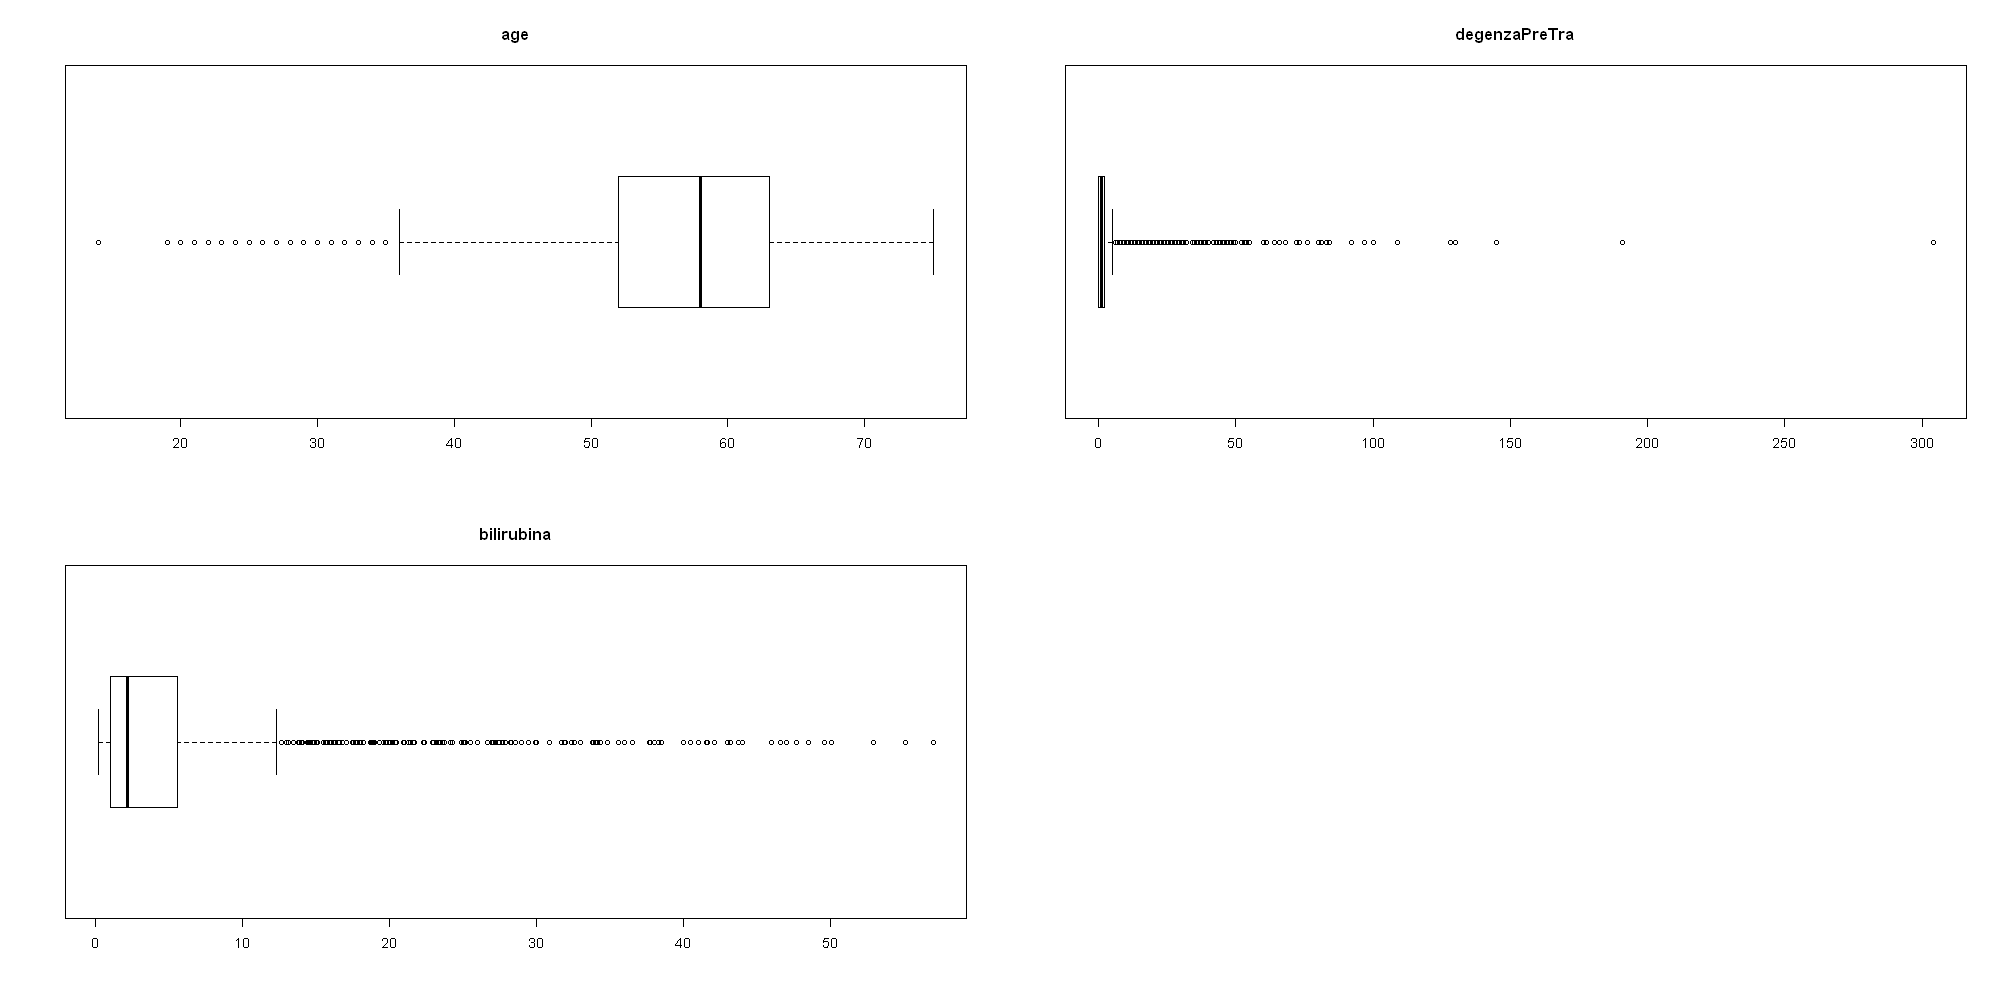

In [666]:
par(mfrow=c(2,2))

boxplot(df$age, horizontal = T, main="age")

boxplot(df$degenzaPreTra,horizontal = T,main="degenzaPreTra")


boxplot(df$bilirubinaTotale,horizontal = T, main="bilirubina")

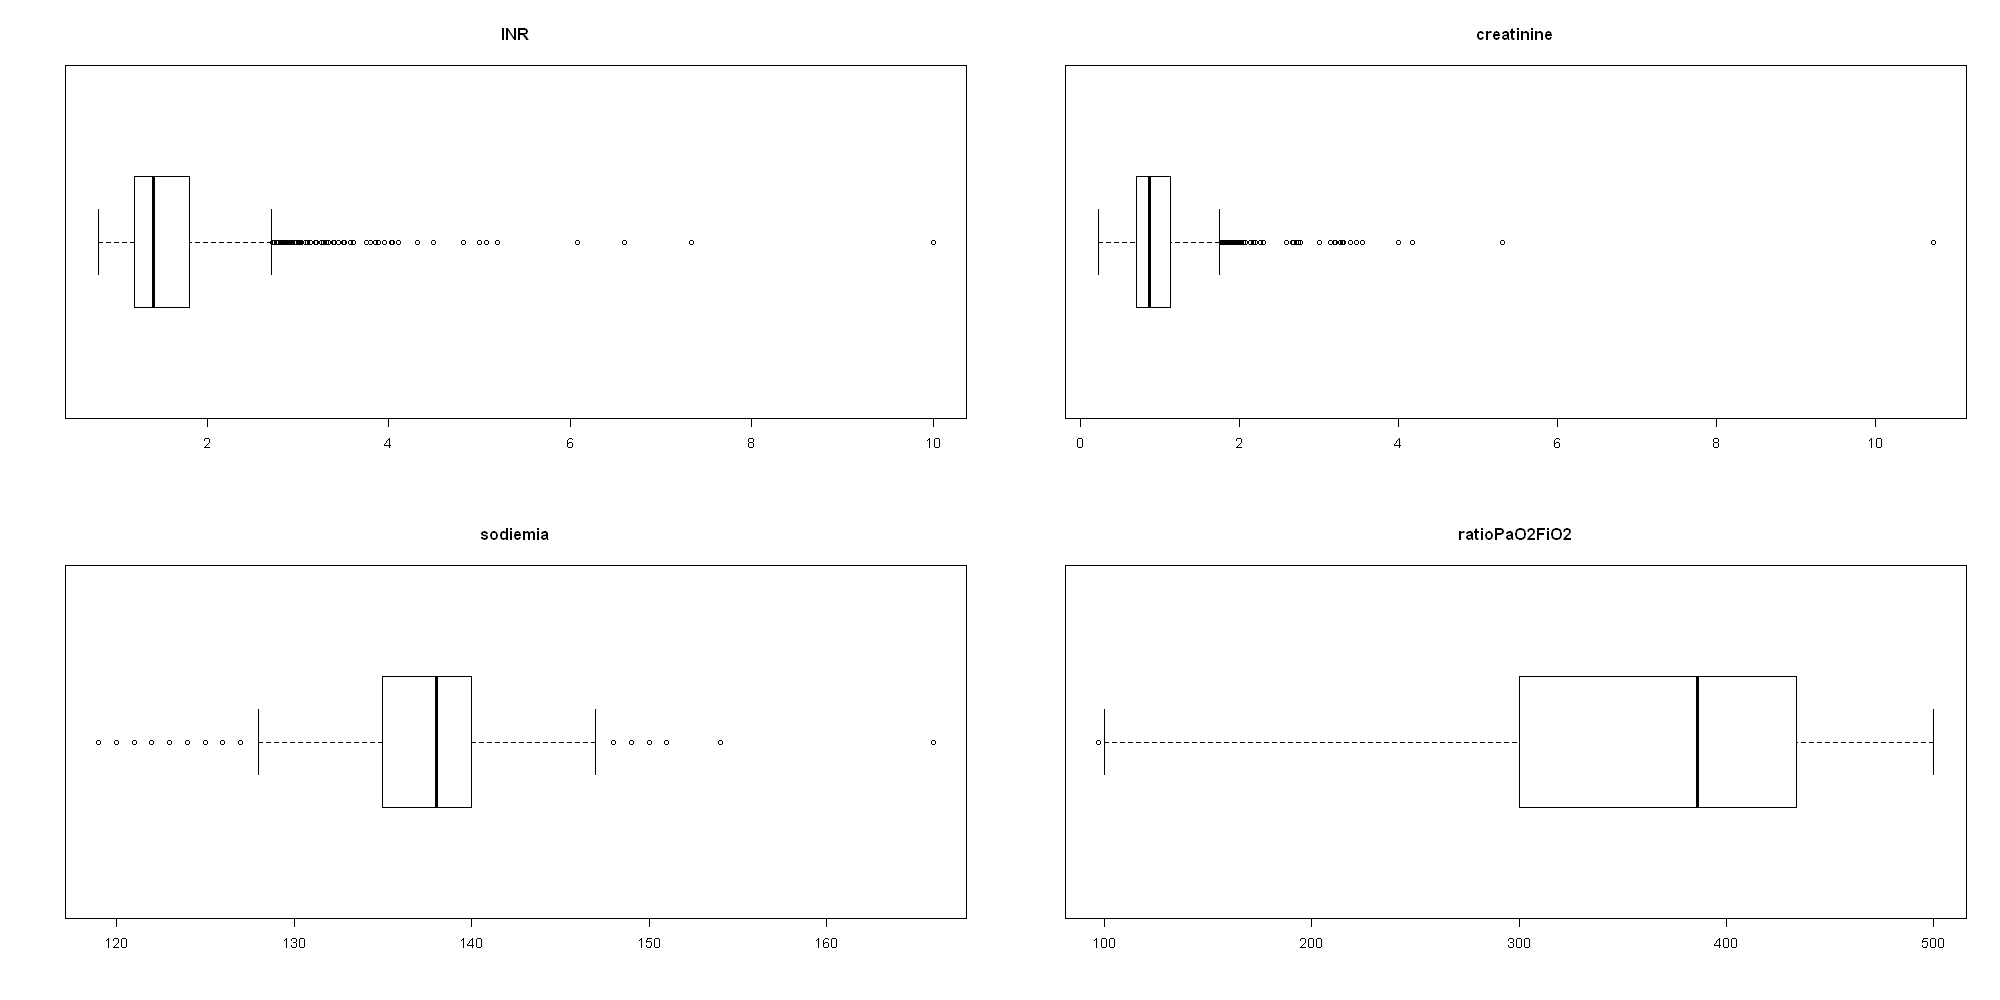

In [667]:
par(mfrow=c(2,2))

boxplot(df$INR,horizontal = T,main="INR")

boxplot(df$serumCreatinine,horizontal = T,main="creatinine")

boxplot(df$Sodiemia,horizontal = T,main="sodiemia")

boxplot(df$ratioPaO2FiO2,horizontal = T, main="ratioPaO2FiO2")

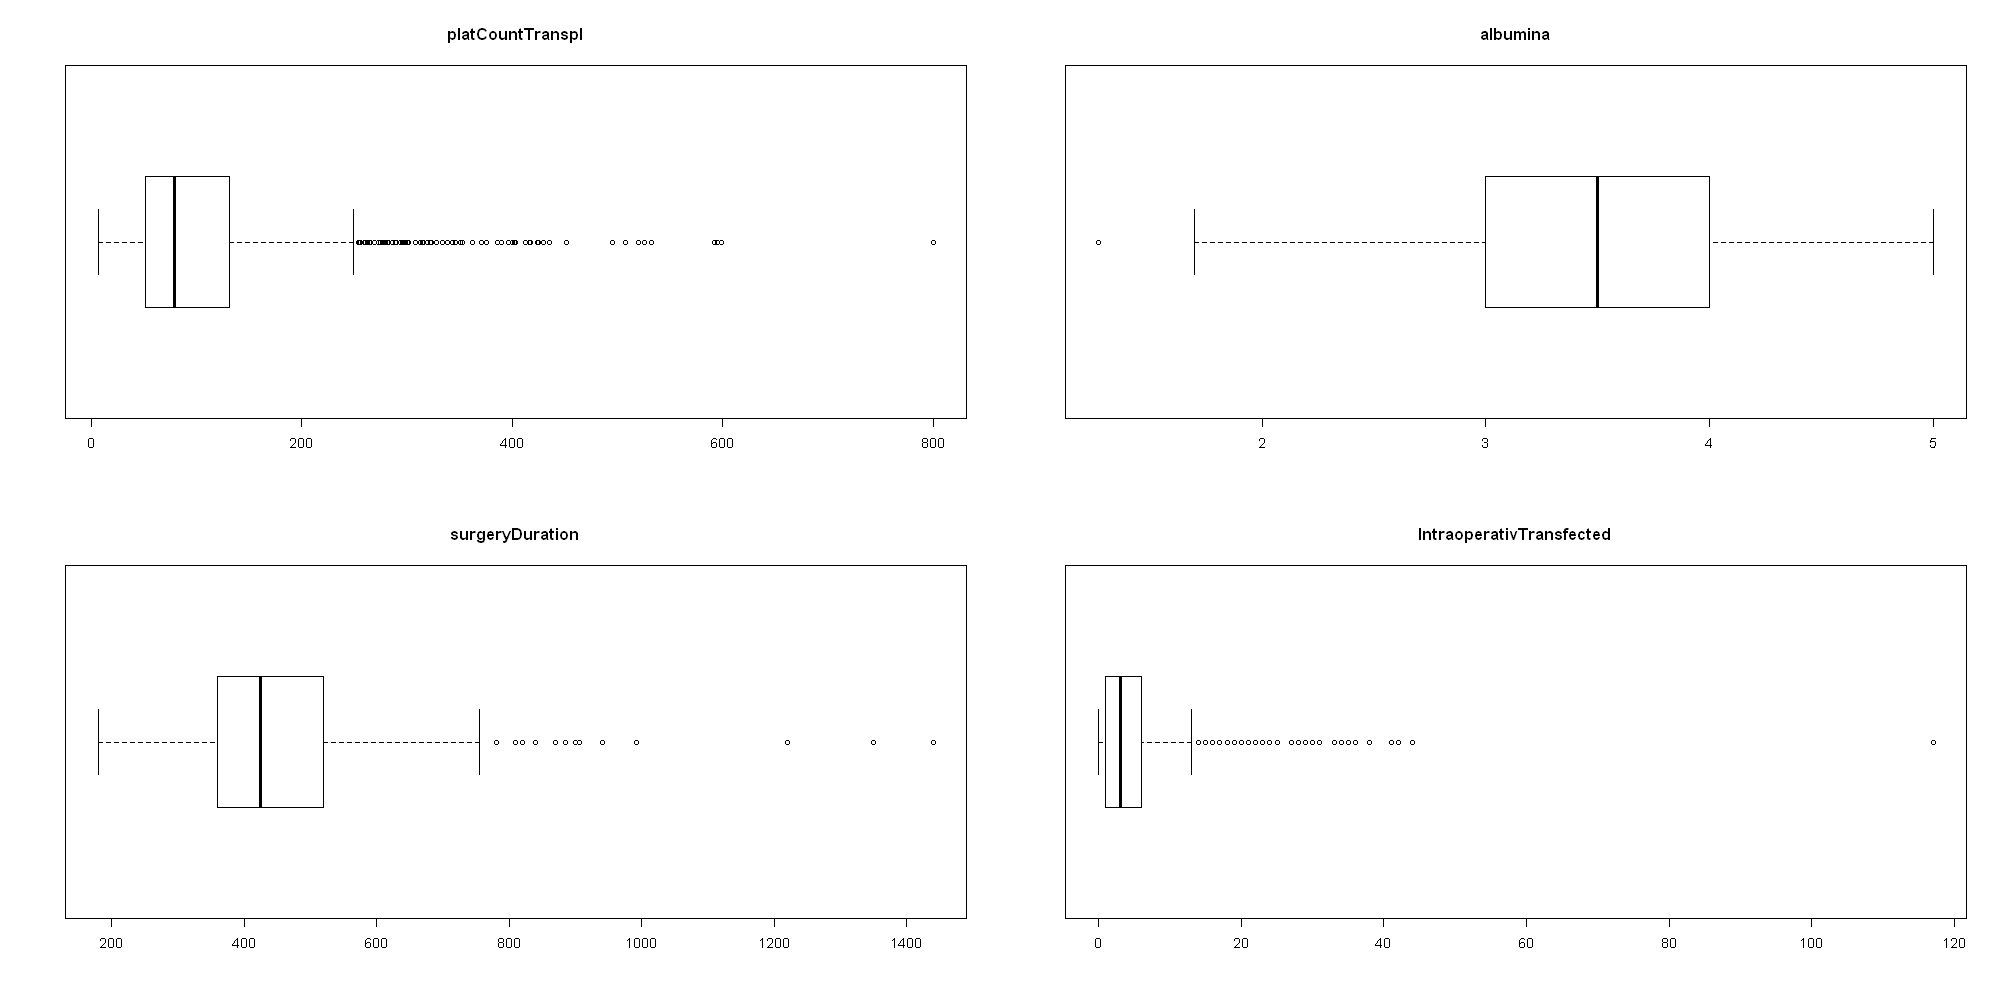

In [668]:
par(mfrow=c(2,2))

boxplot(df$platCountTranspl,horizontal = T,main="platCountTranspl")

boxplot(df$albumina,horizontal = T,main="albumina")

boxplot(df$surgeryDuration,horizontal = T,main="surgeryDuration")

boxplot(df$IntraoperativTransfected,horizontal = T, main="IntraoperativTransfected")

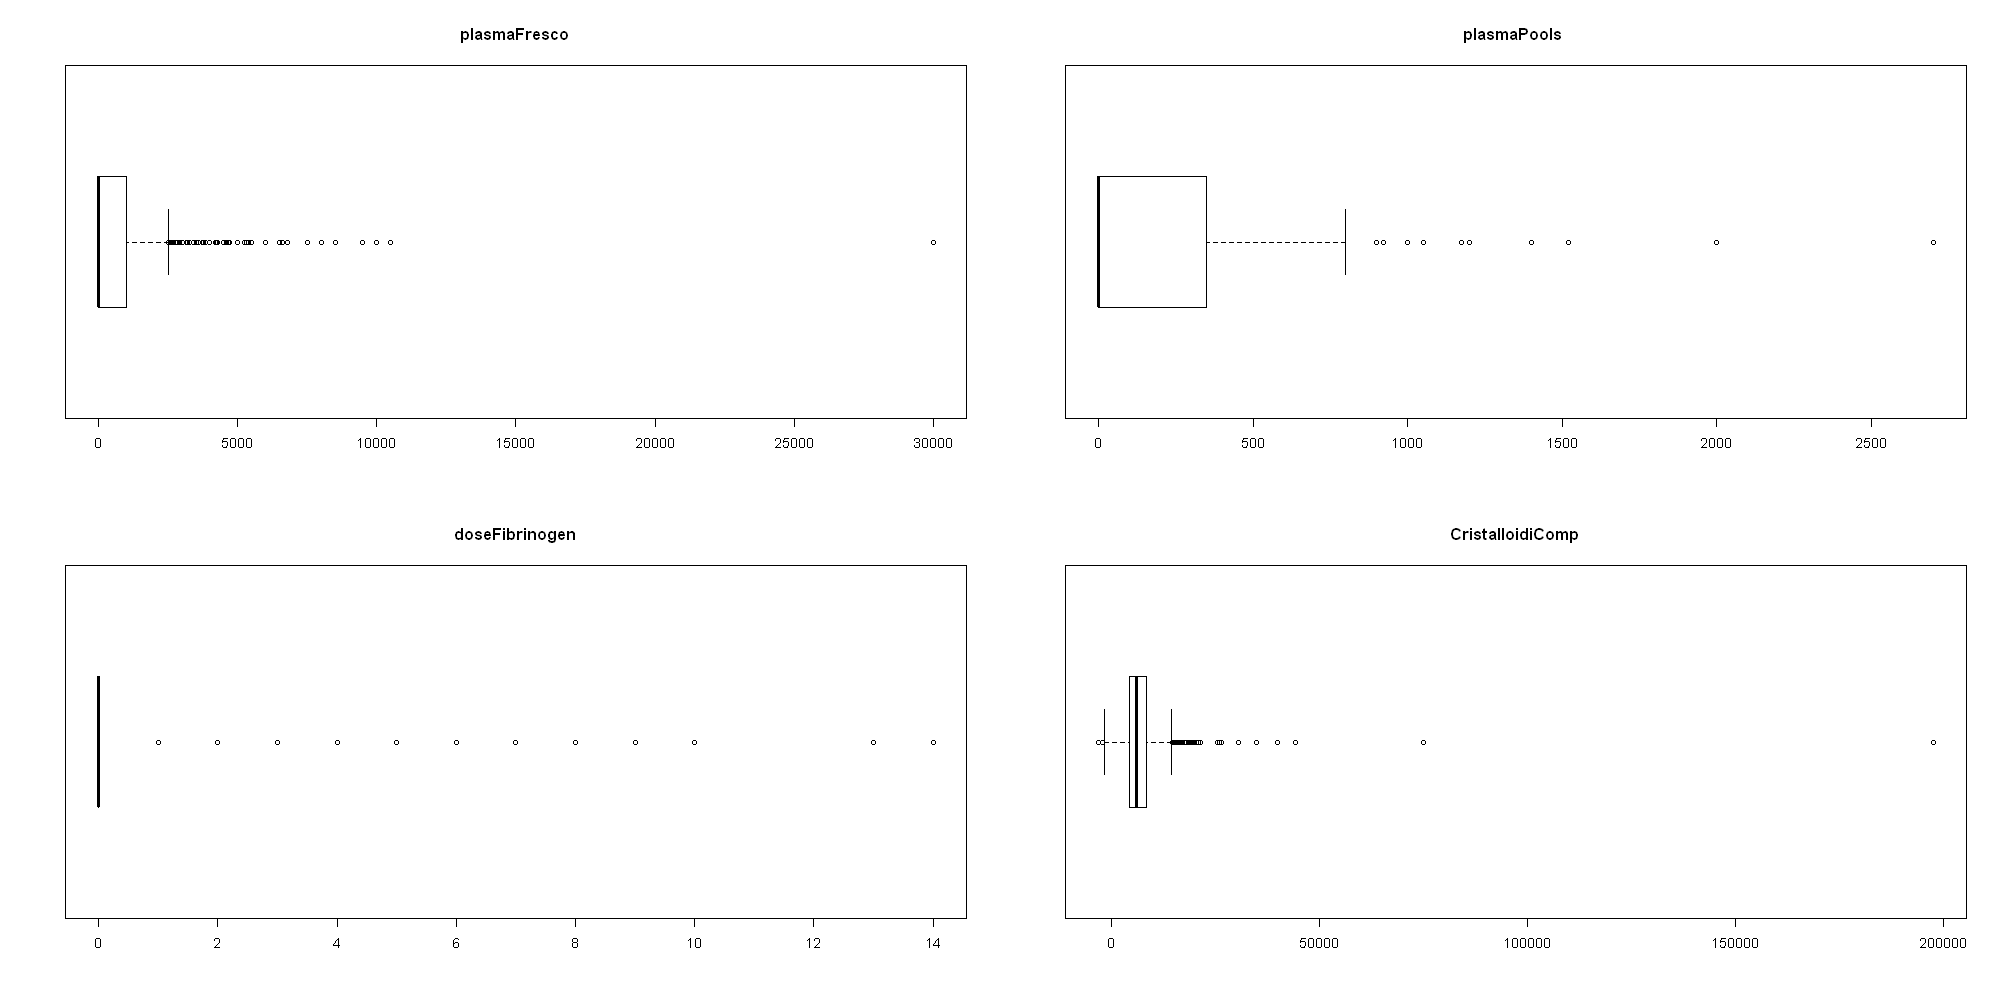

In [669]:
par(mfrow=c(2,2))

boxplot(df$plasmaFresco,horizontal = T,main="plasmaFresco")

boxplot(df$plasmaPools,horizontal = T,main="plasmaPools ")

boxplot(df$doseFibrinogen,horizontal = T,main="doseFibrinogen")

boxplot(df$CristalloidiComp,horizontal = T, main="CristalloidiComp")

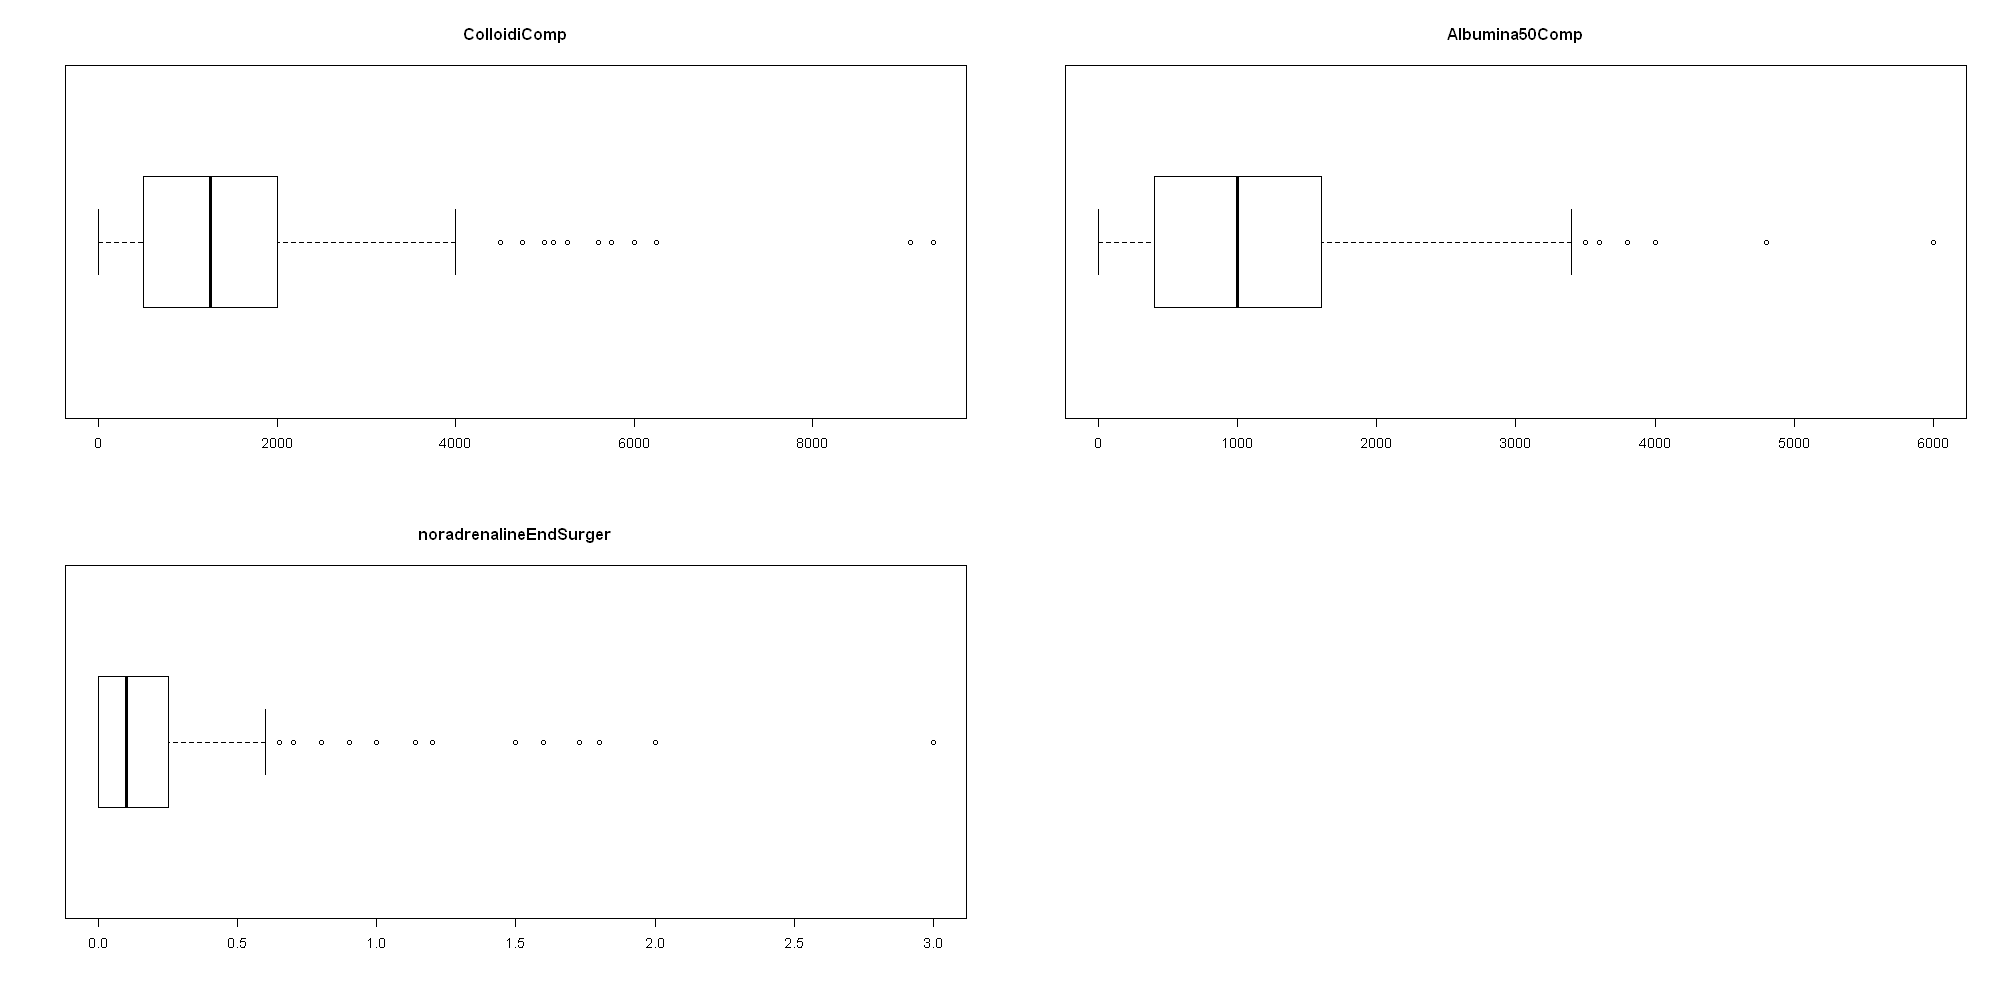

In [670]:
par(mfrow=c(2,2))

boxplot(df$ColloidiComp,horizontal = T,main="ColloidiComp")

boxplot(df$Albumina50Comp,horizontal = T,main="Albumina50Comp")


boxplot(df$noradrenalineEndSurger,horizontal = T, main="noradrenalineEndSurger")

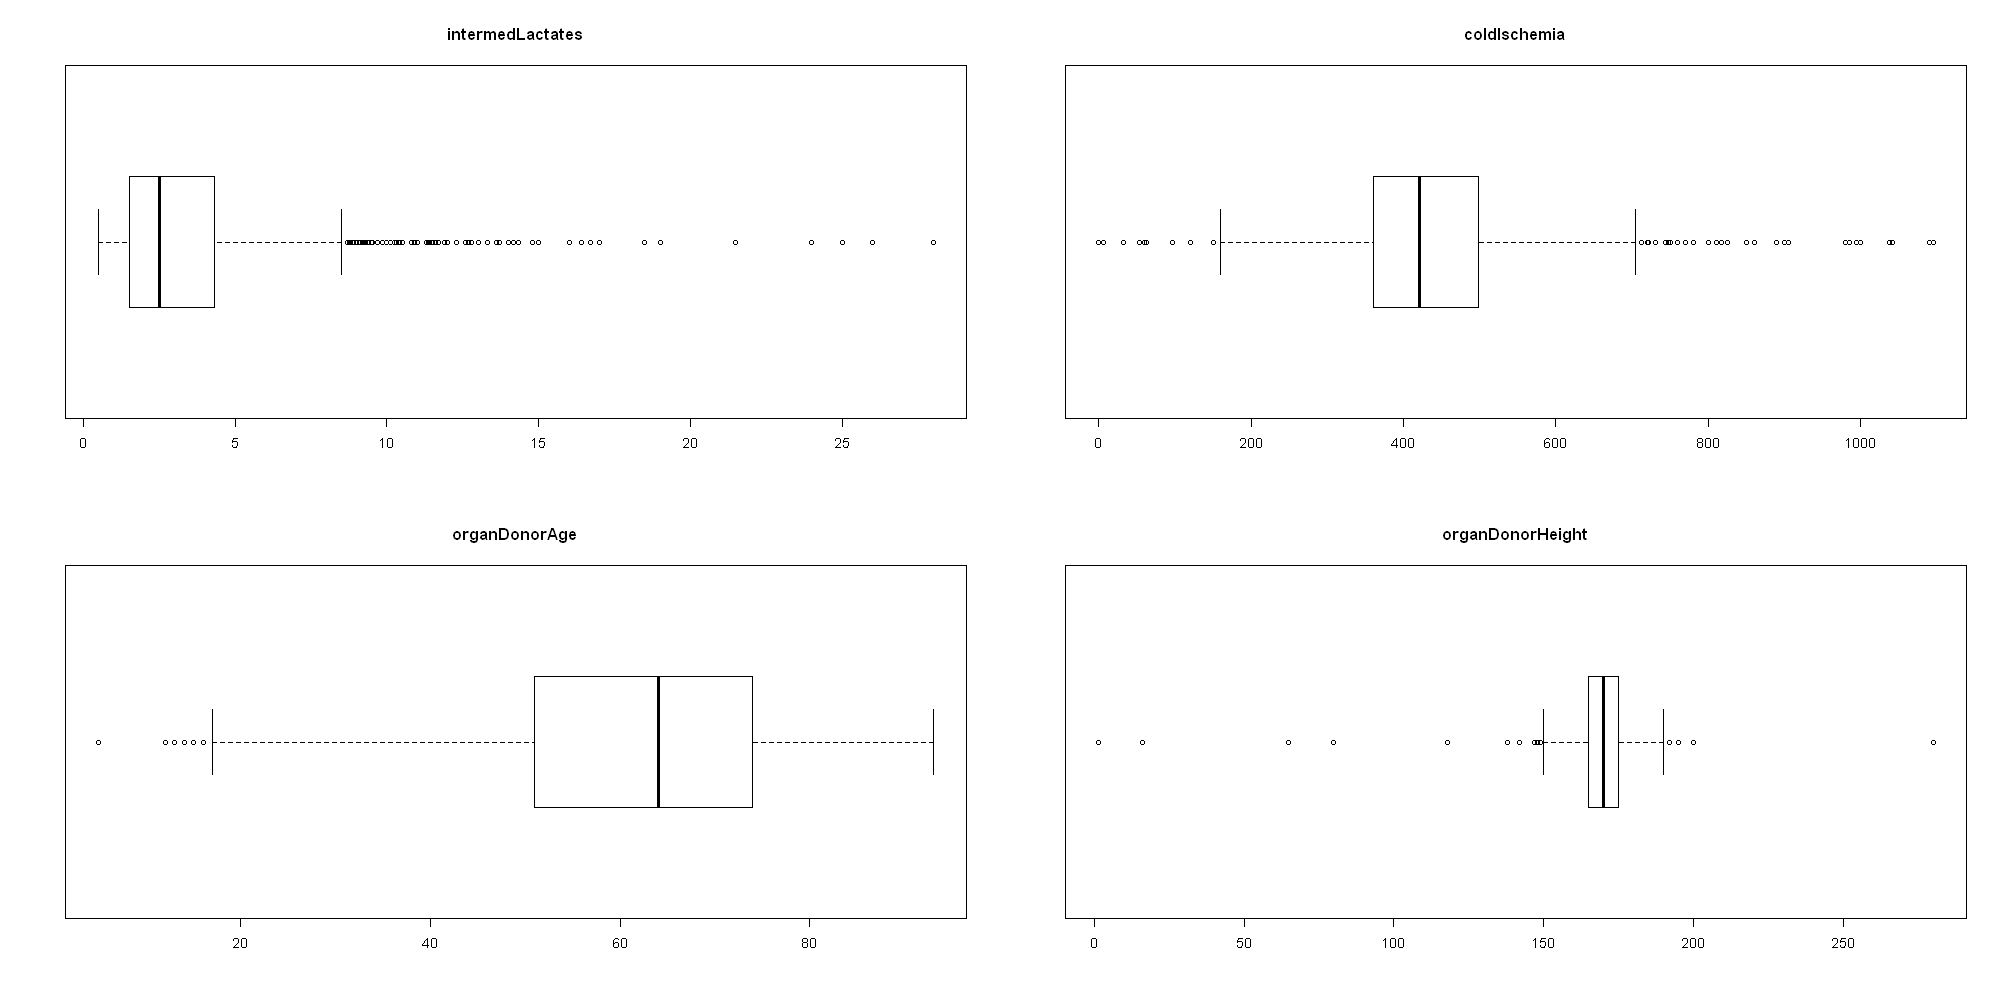

In [671]:
par(mfrow=c(2,2))

boxplot(df$intermedLactates,horizontal = T,main="intermedLactates")

boxplot(df$coldIschemia,horizontal = T,main="coldIschemia")

boxplot(df$organDonorAge,horizontal = T,main="organDonorAge")

boxplot(df$organDonorHeight,horizontal = T, main="organDonorHeight")

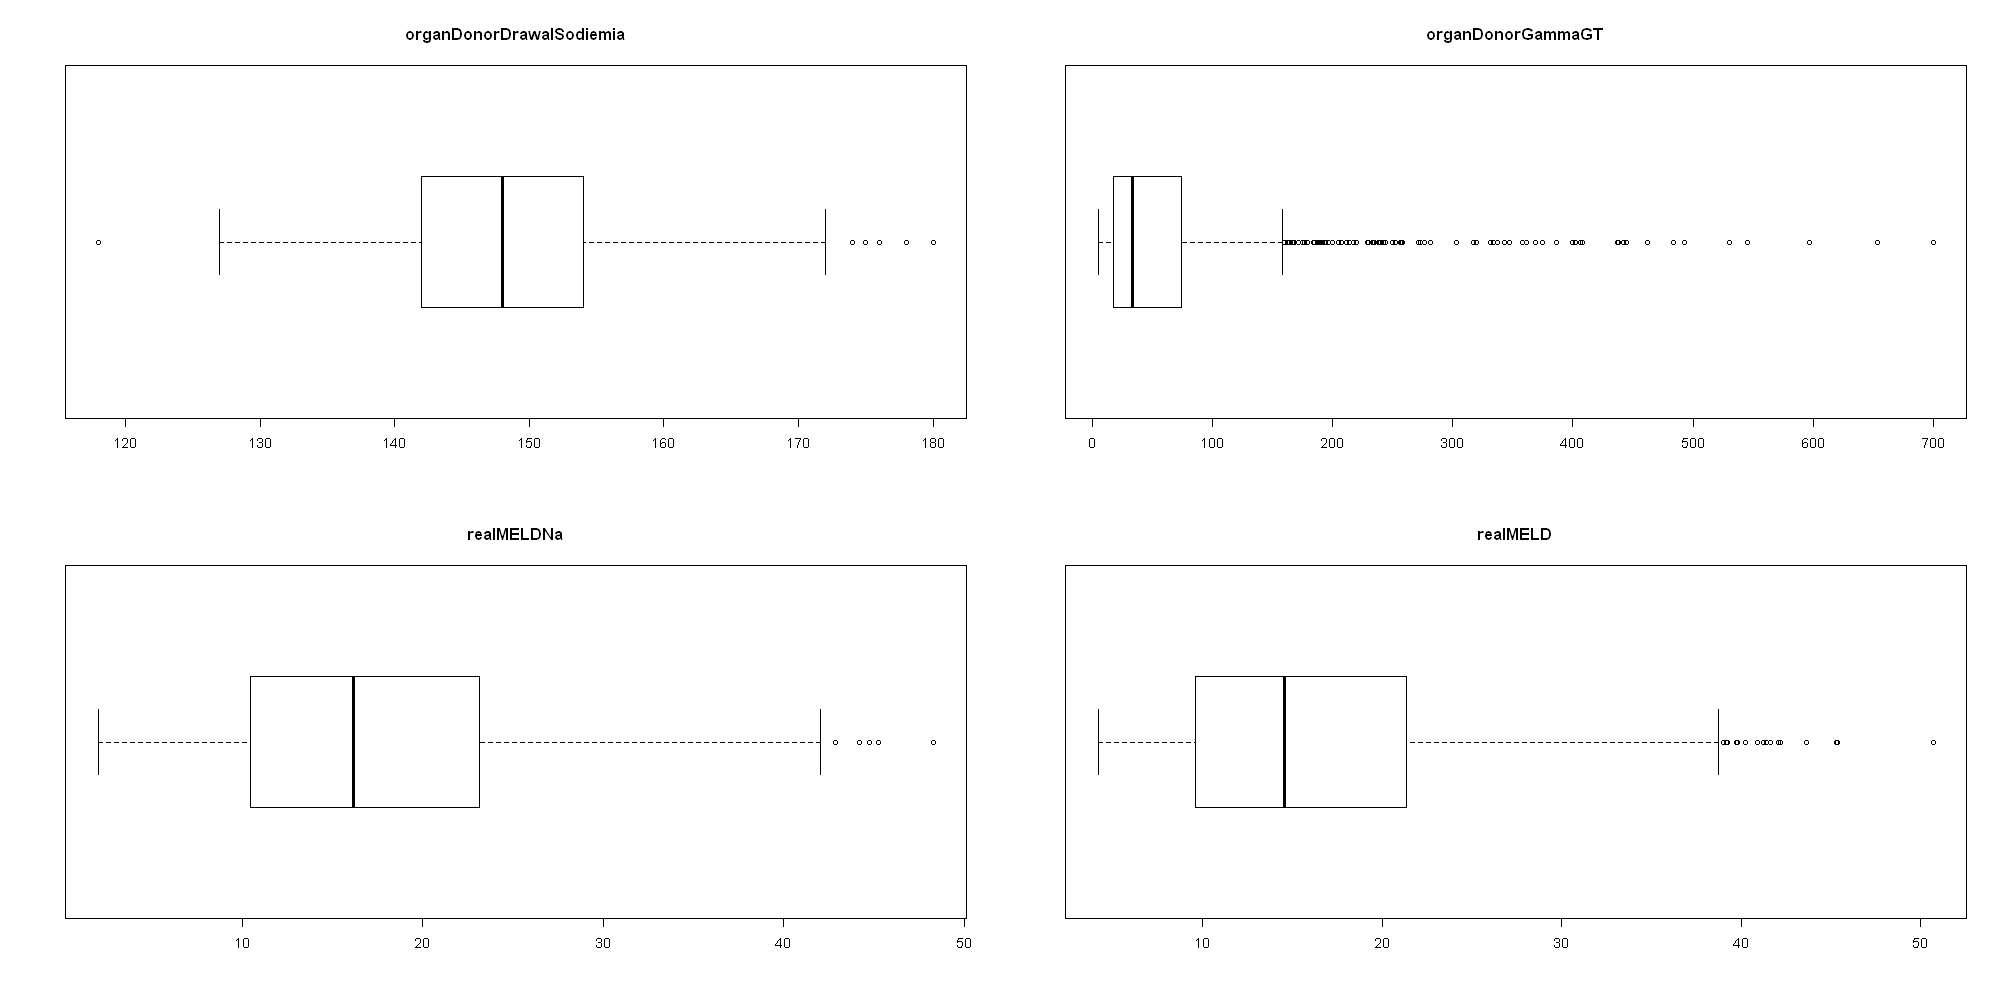

In [672]:
par(mfrow=c(2,2))

boxplot(df$organDonorDrawalSodiemia,horizontal = T,main="organDonorDrawalSodiemia")

boxplot(df$organDonorGammaGT,horizontal = T,main="organDonorGammaGT")

boxplot(df$realMELDNa,horizontal = T,main="realMELDNa")

boxplot(df$realMELD, horizontal = T,main="realMELD")

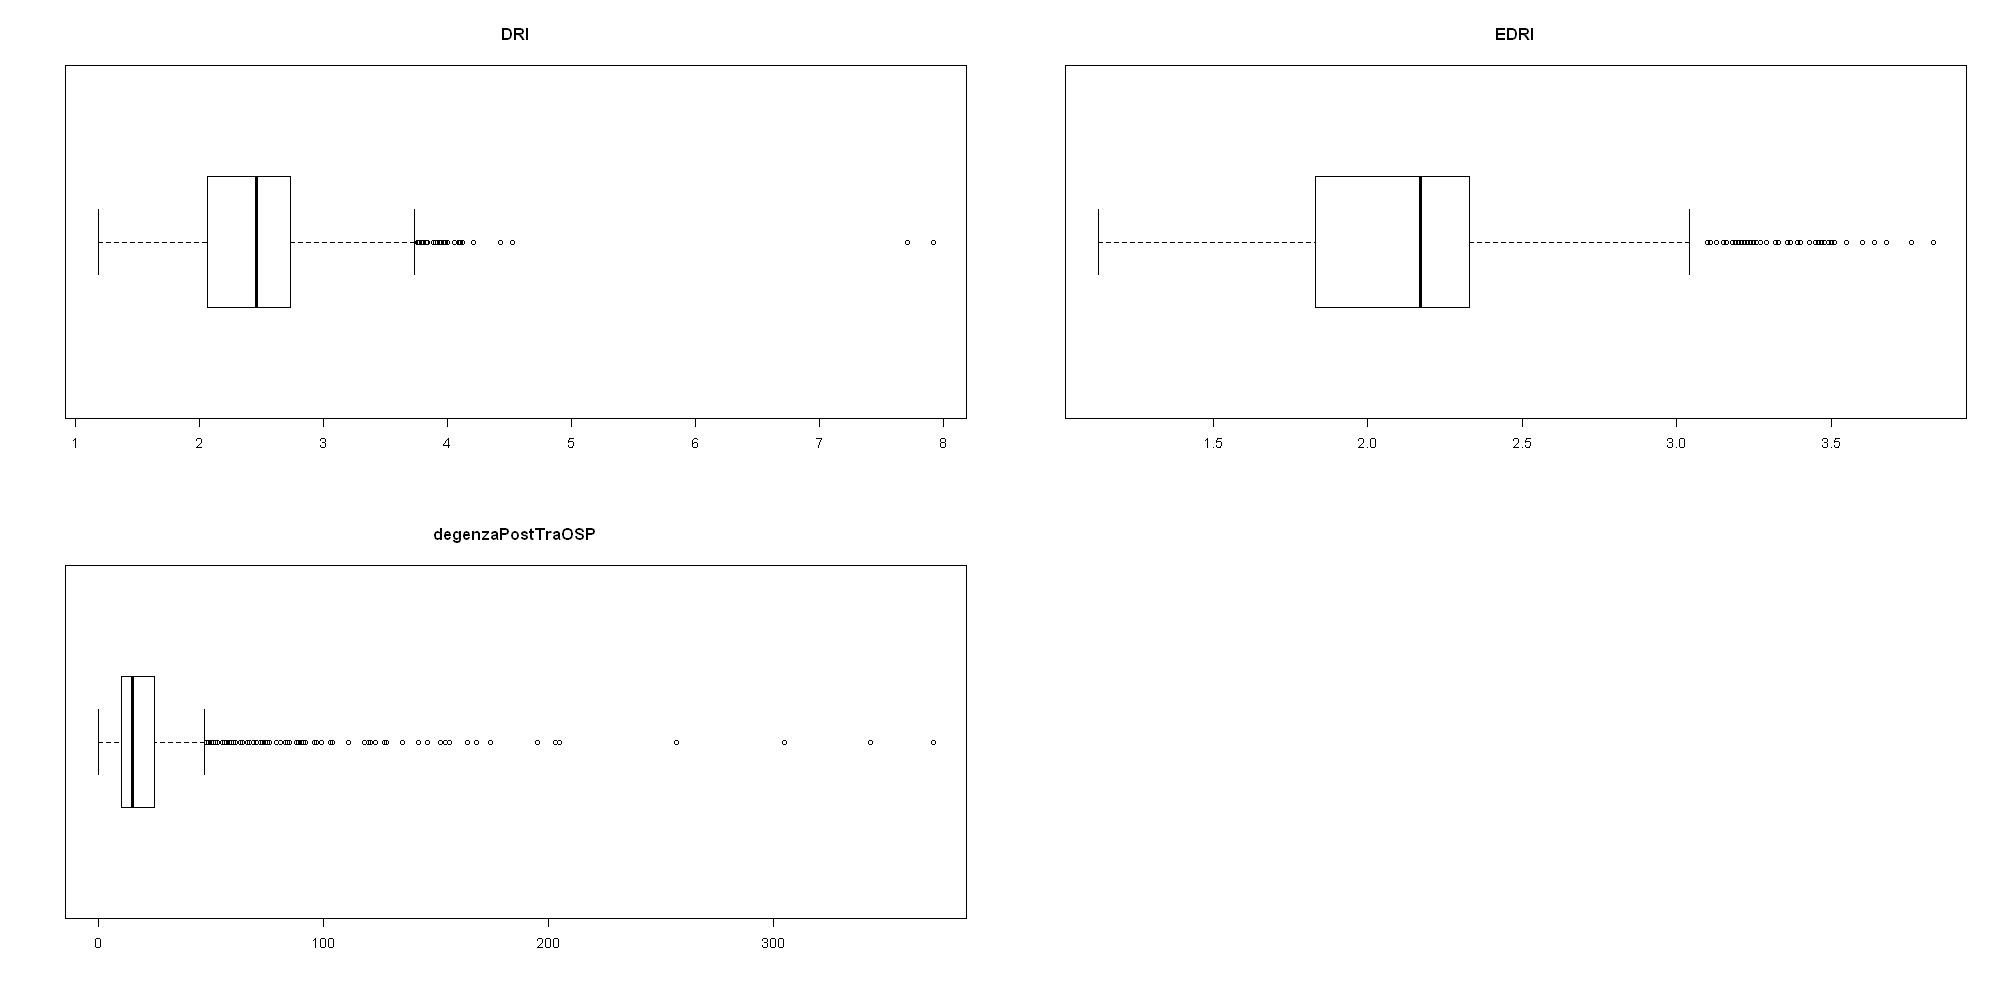

In [673]:
par(mfrow=c(2,2))

boxplot(df$DRI,horizontal = T,main="DRI")

boxplot(df$EDRI,horizontal = T,main="EDRI")

boxplot(df$degenzaPostTraOSP,horizontal = T,main="degenzaPostTraOSP")

3 columns ignored with more than 50 categories.
patientKey: 1178 categories
icuAdmDate__icuAdmDate: 736 categories
icuAdmDate__icuAdmTime: 449 categories




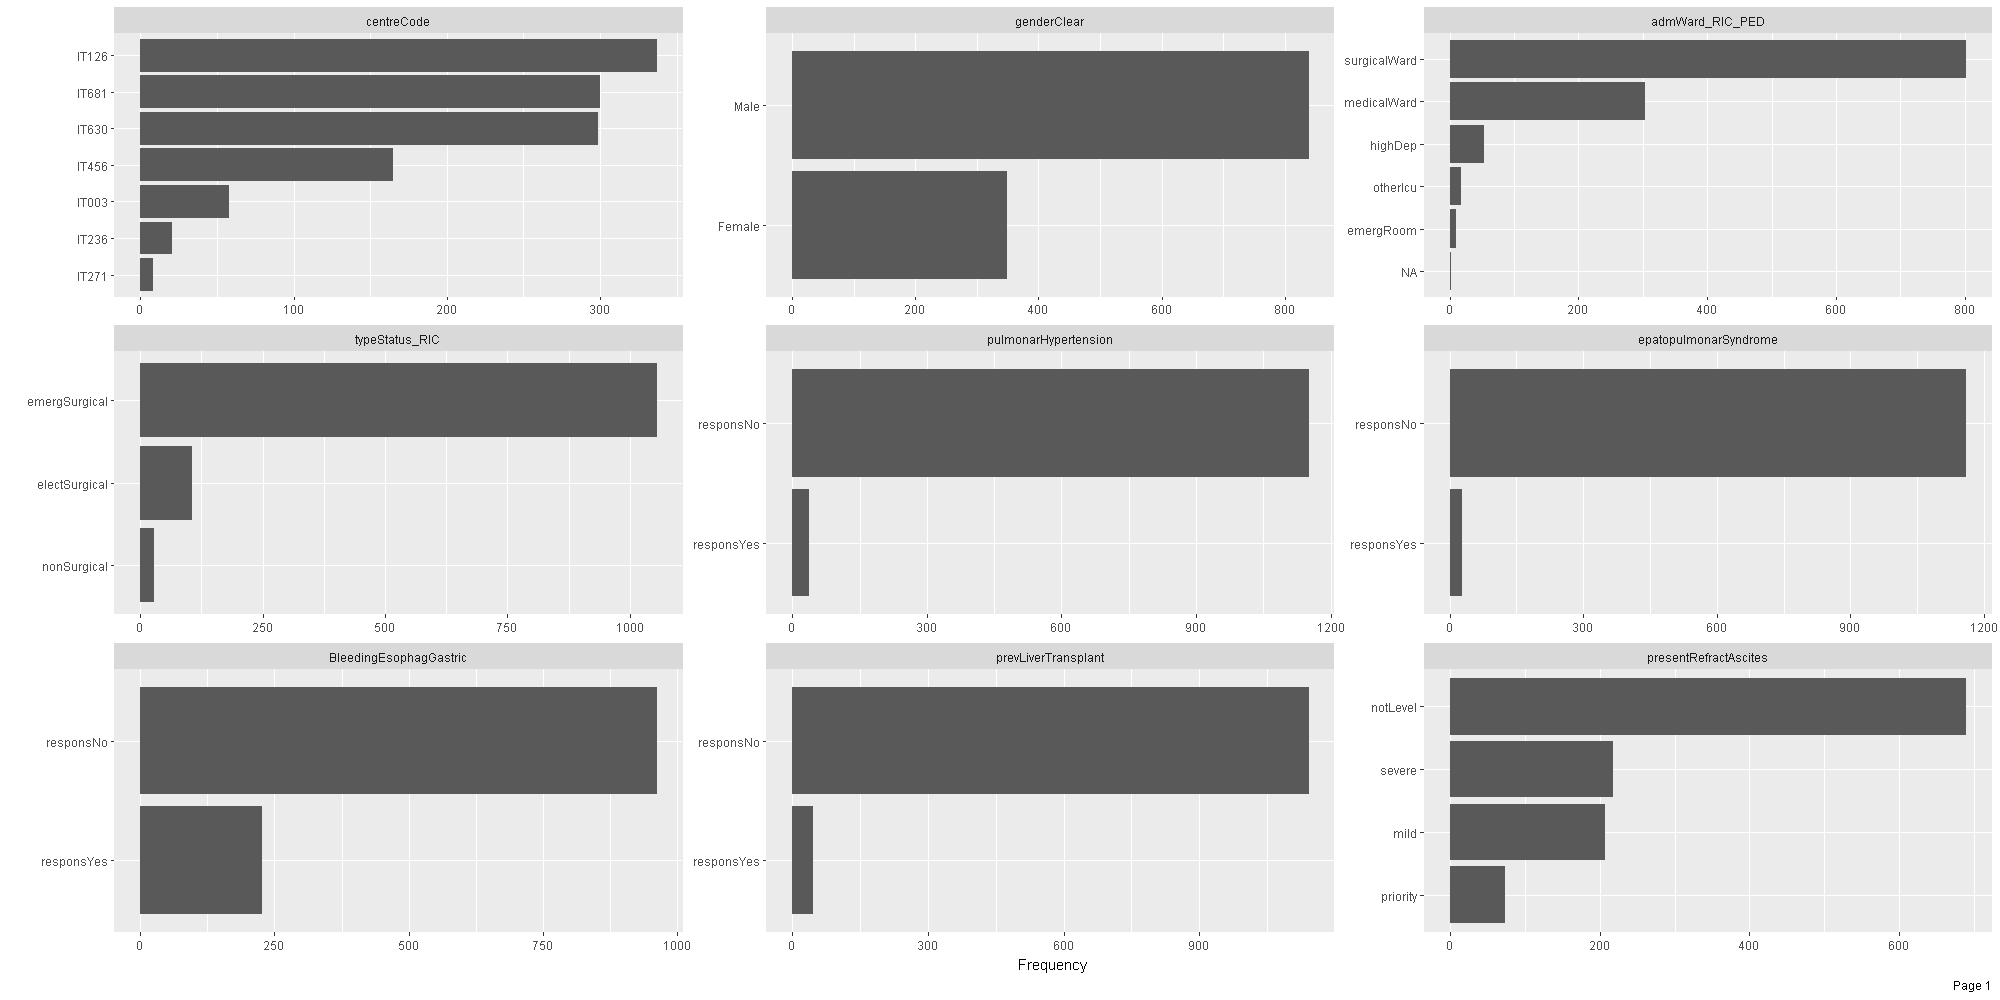

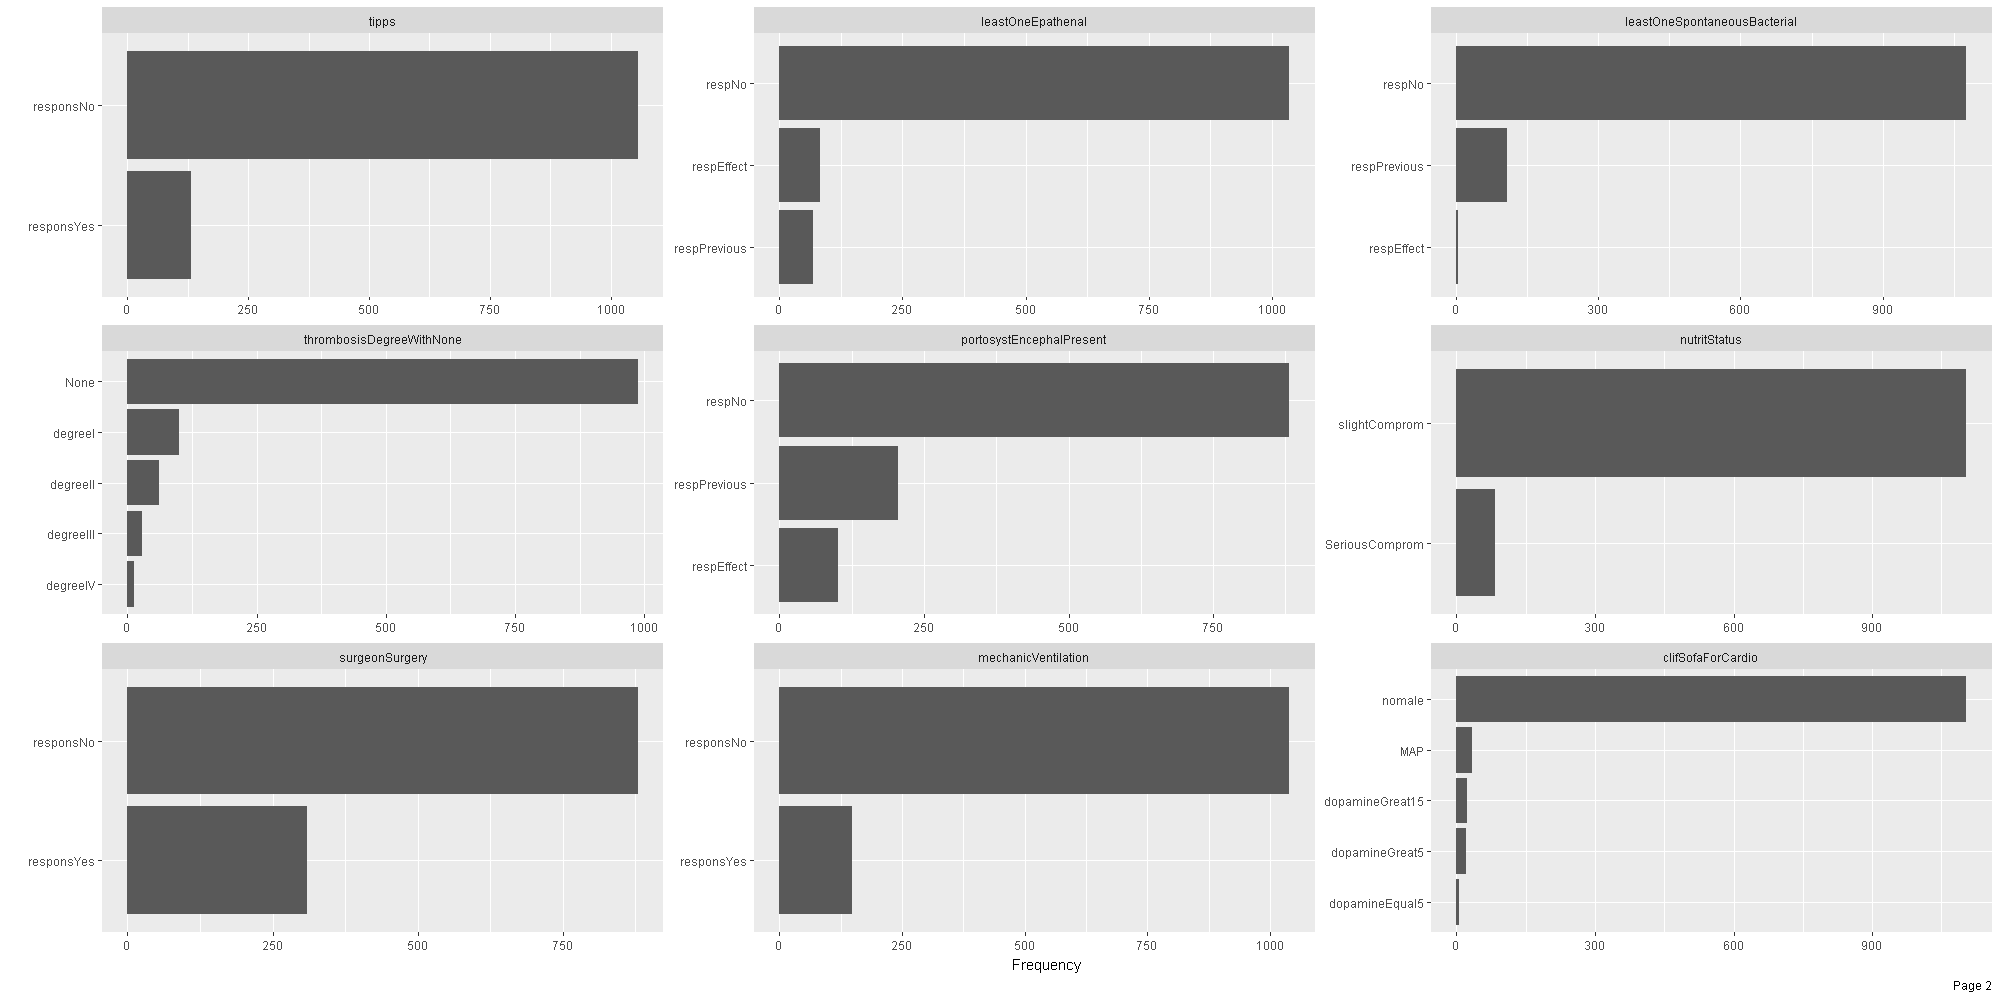

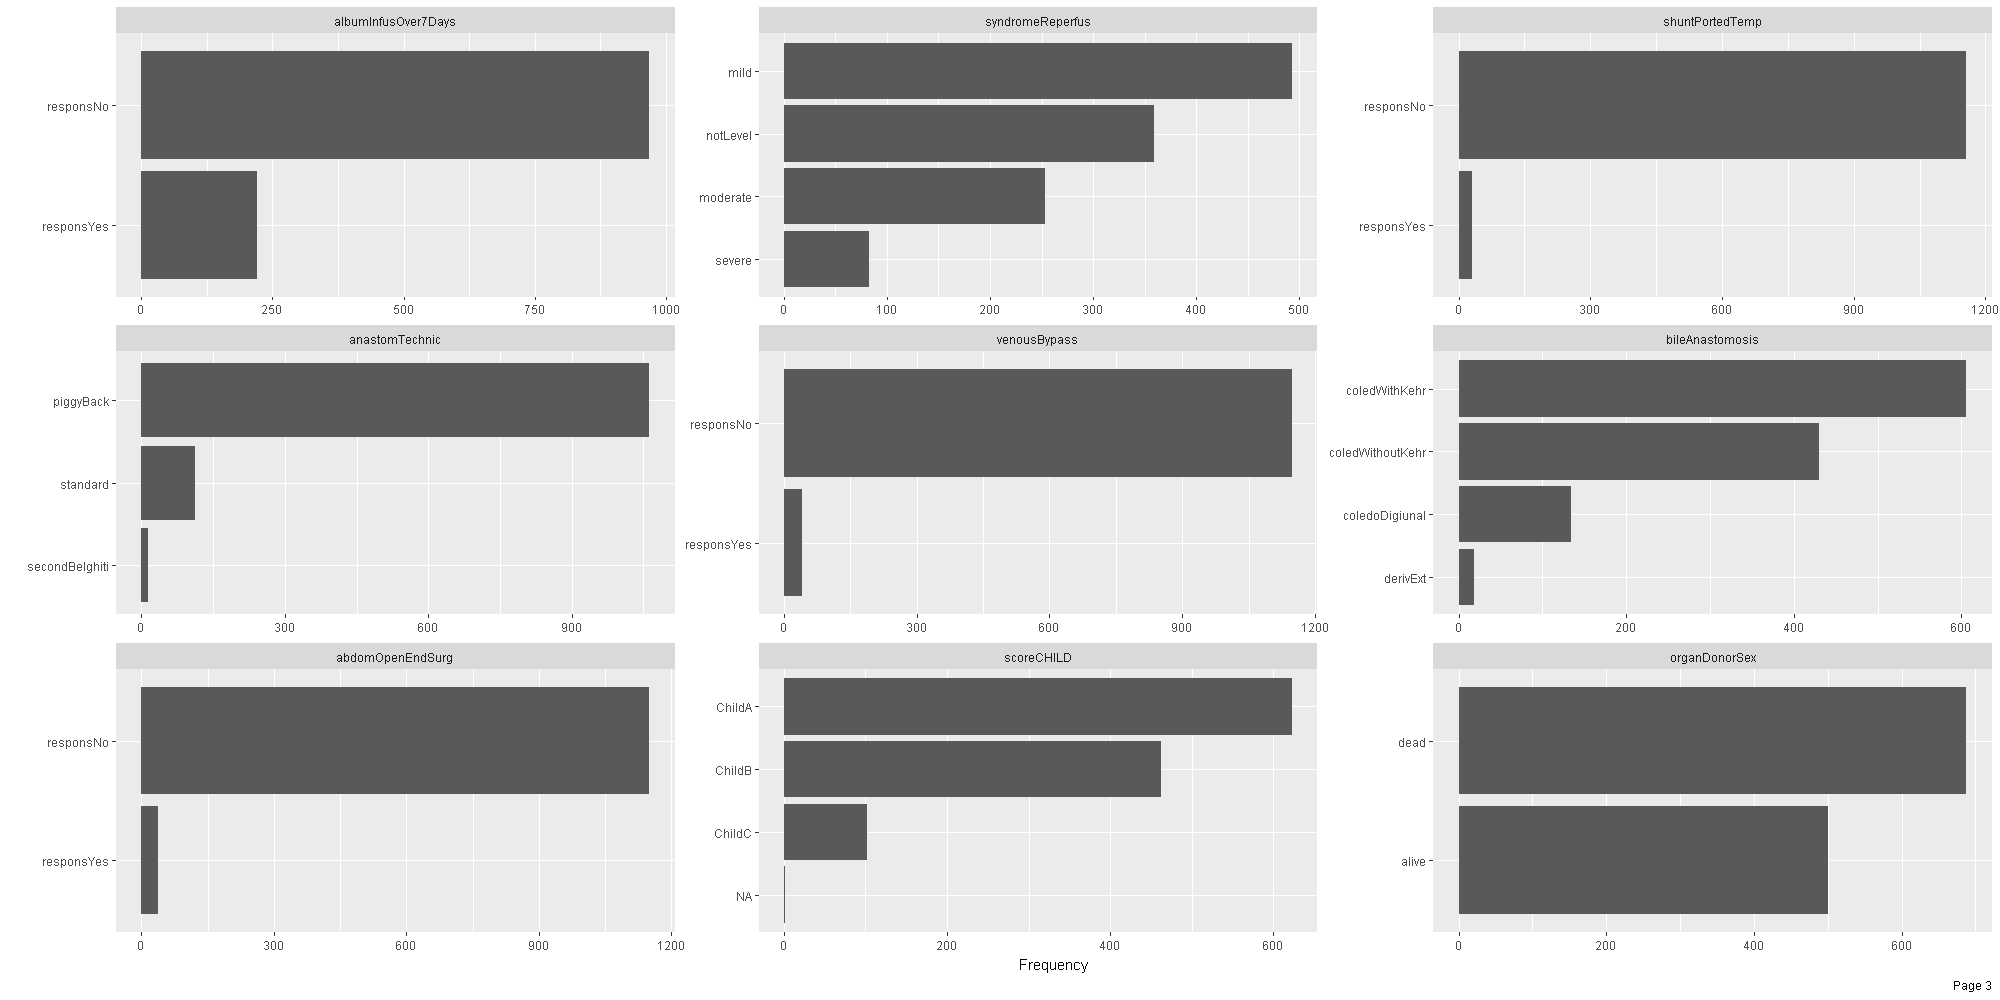

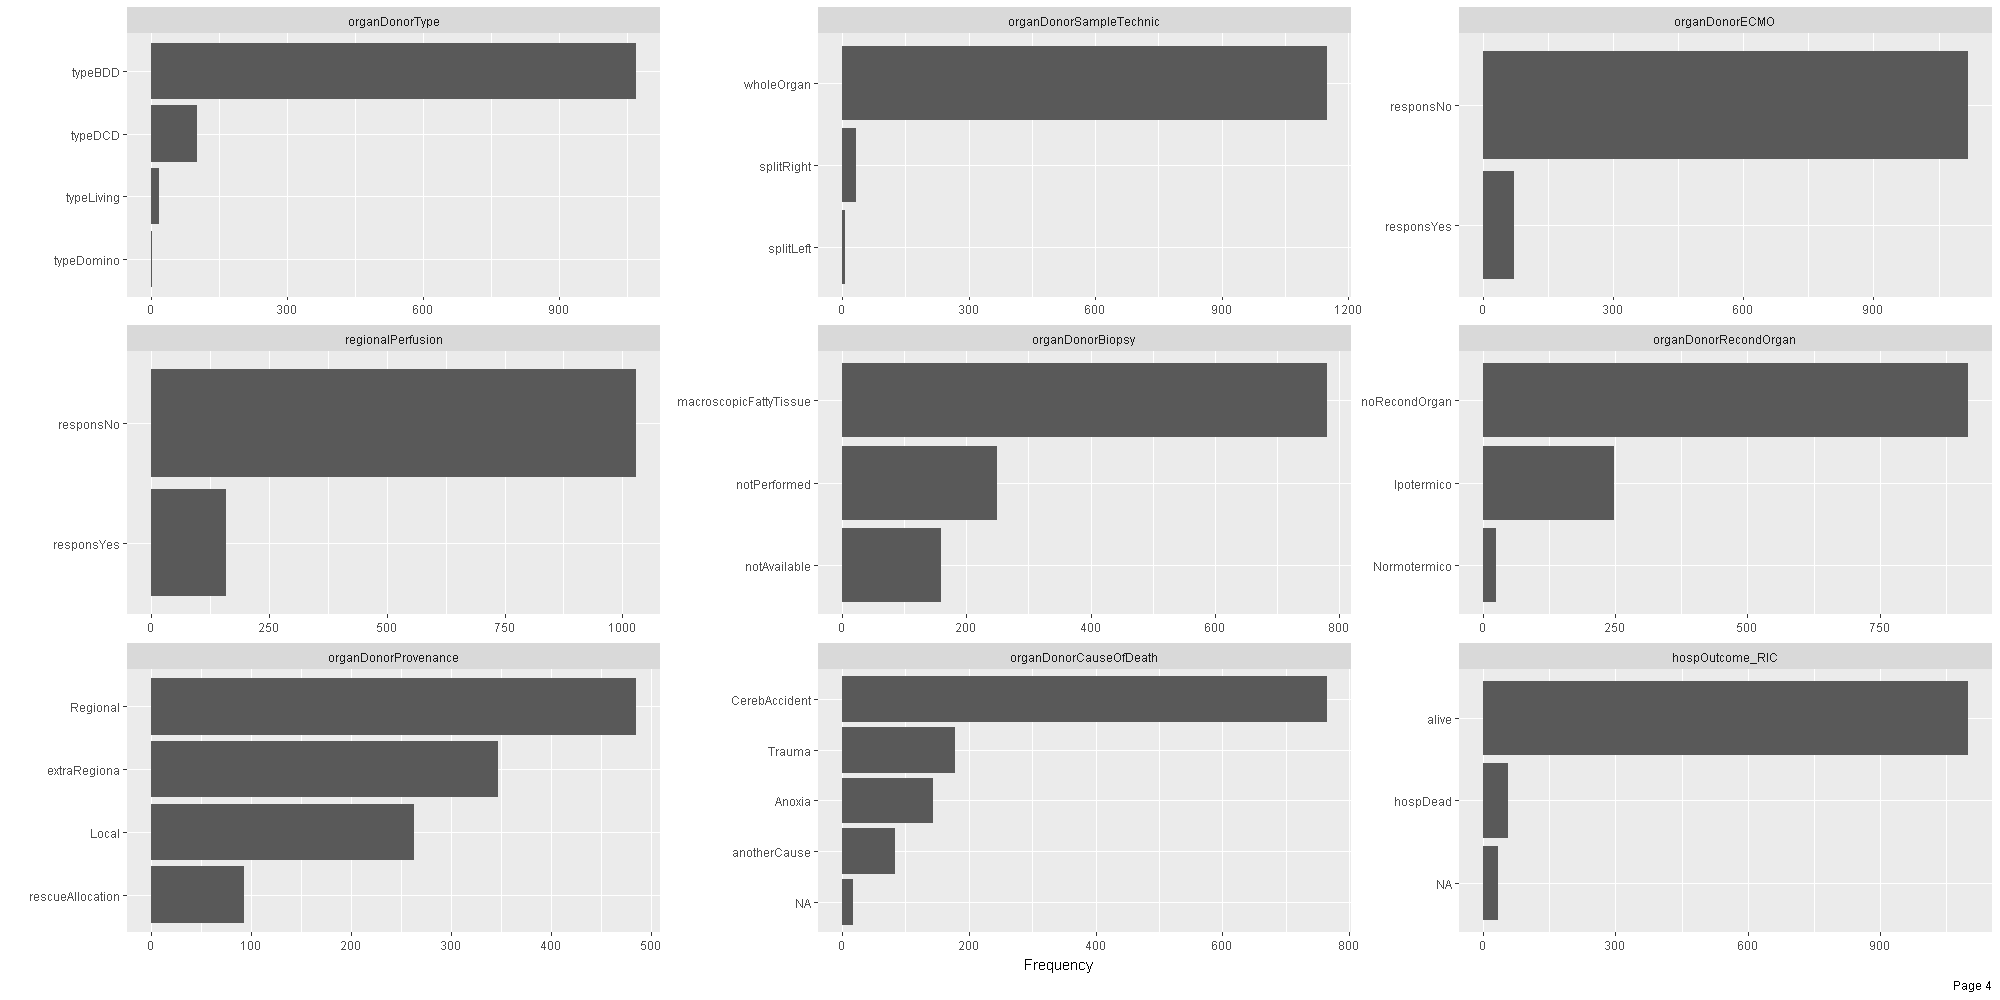

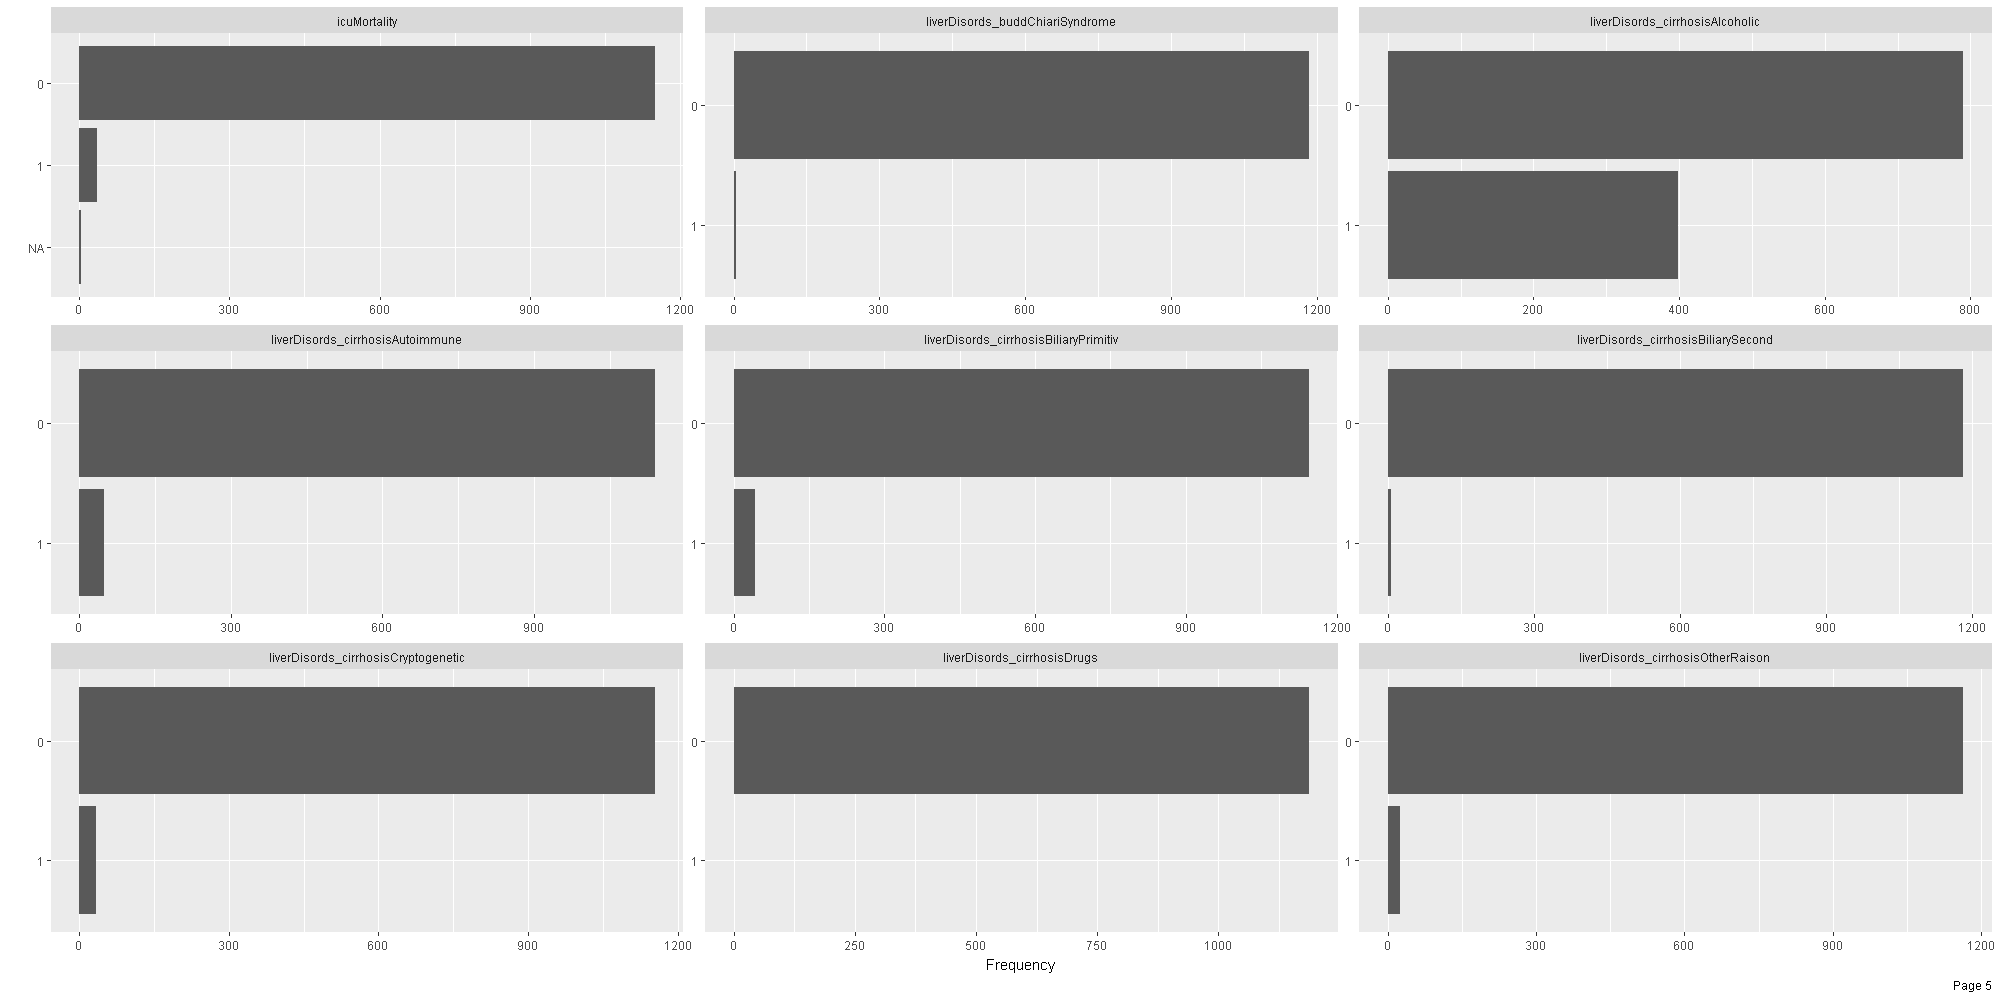

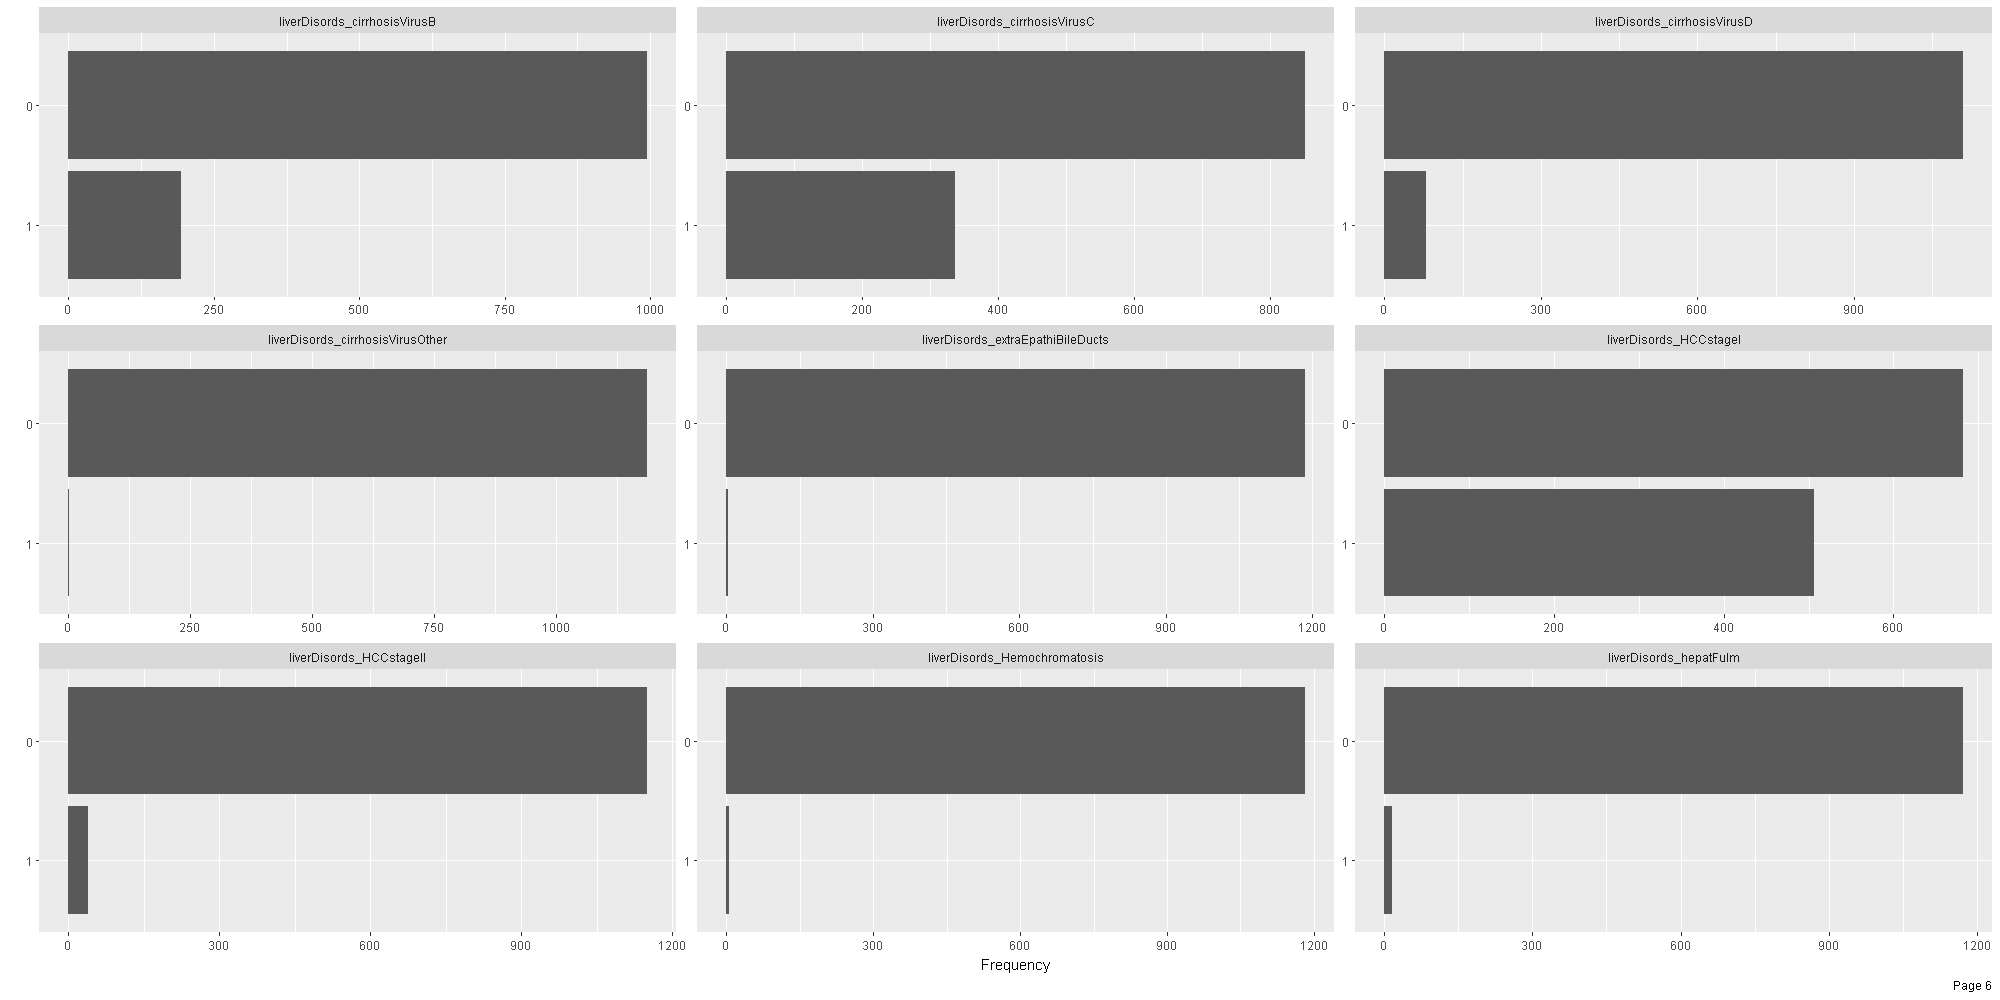

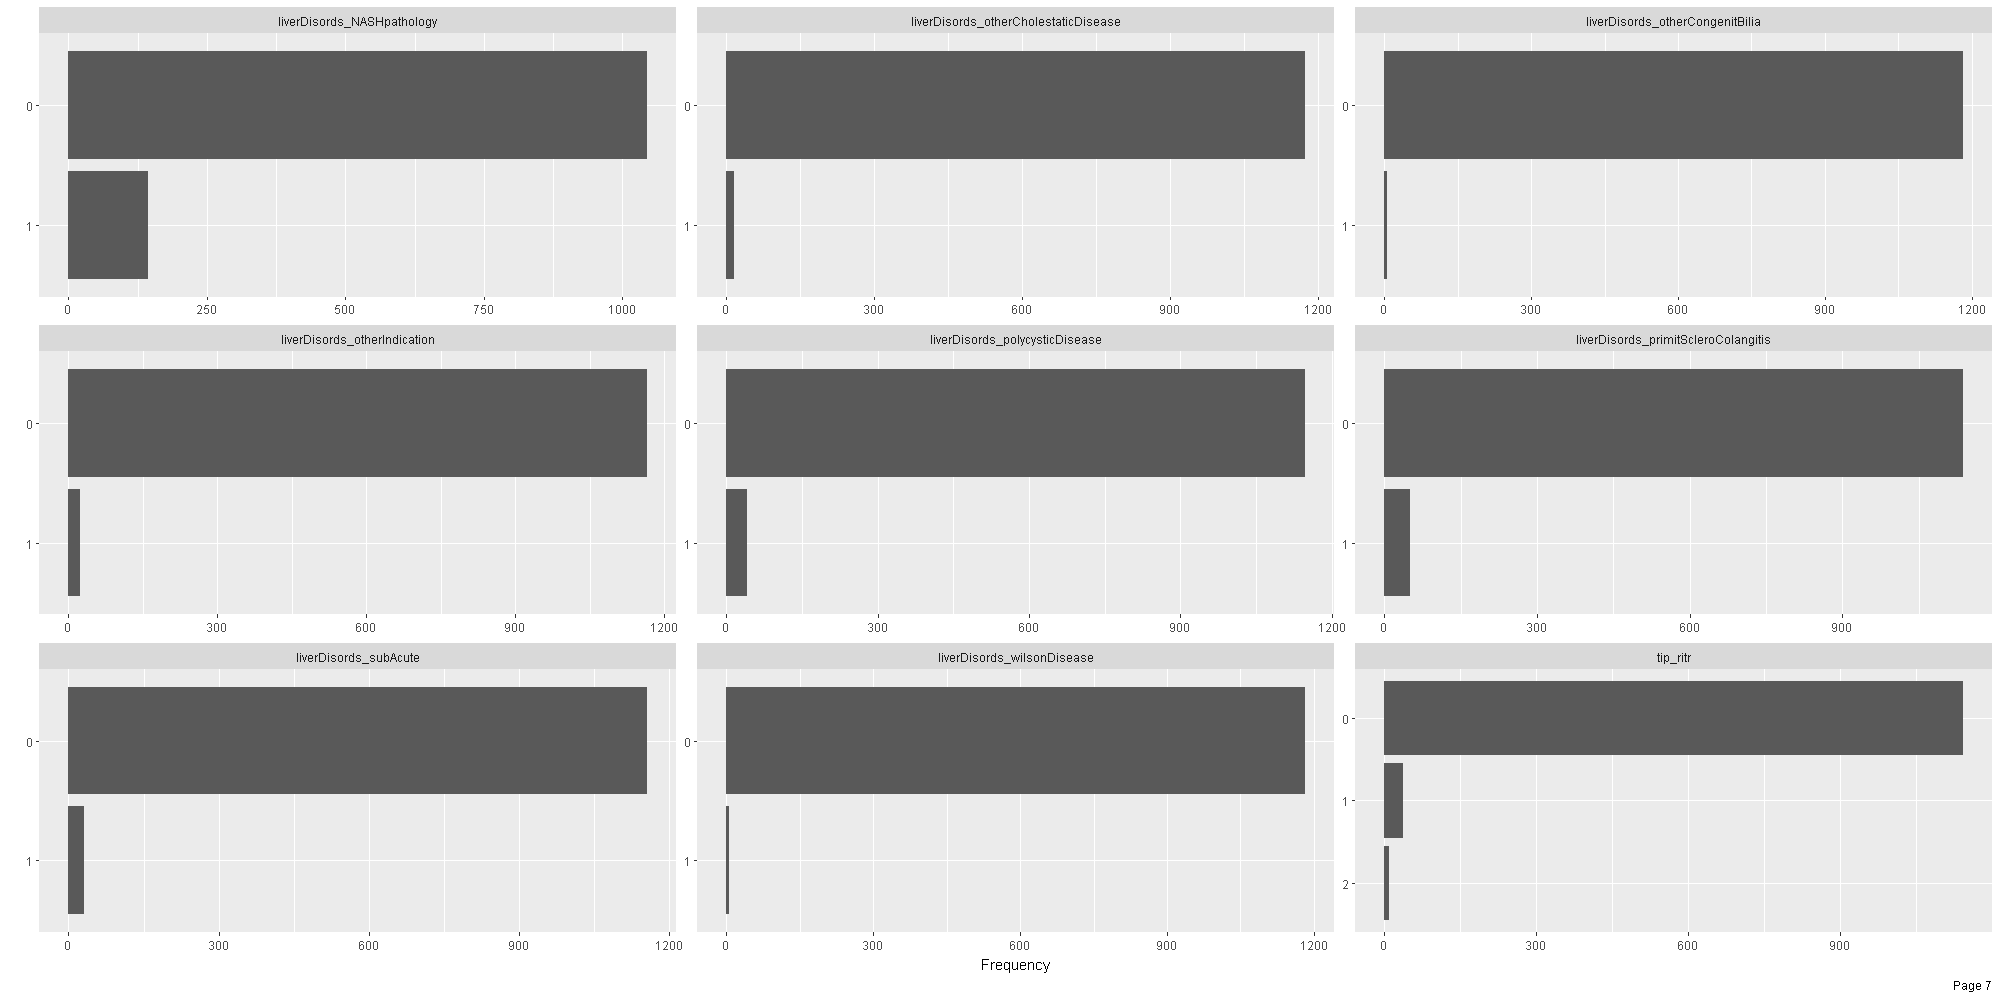

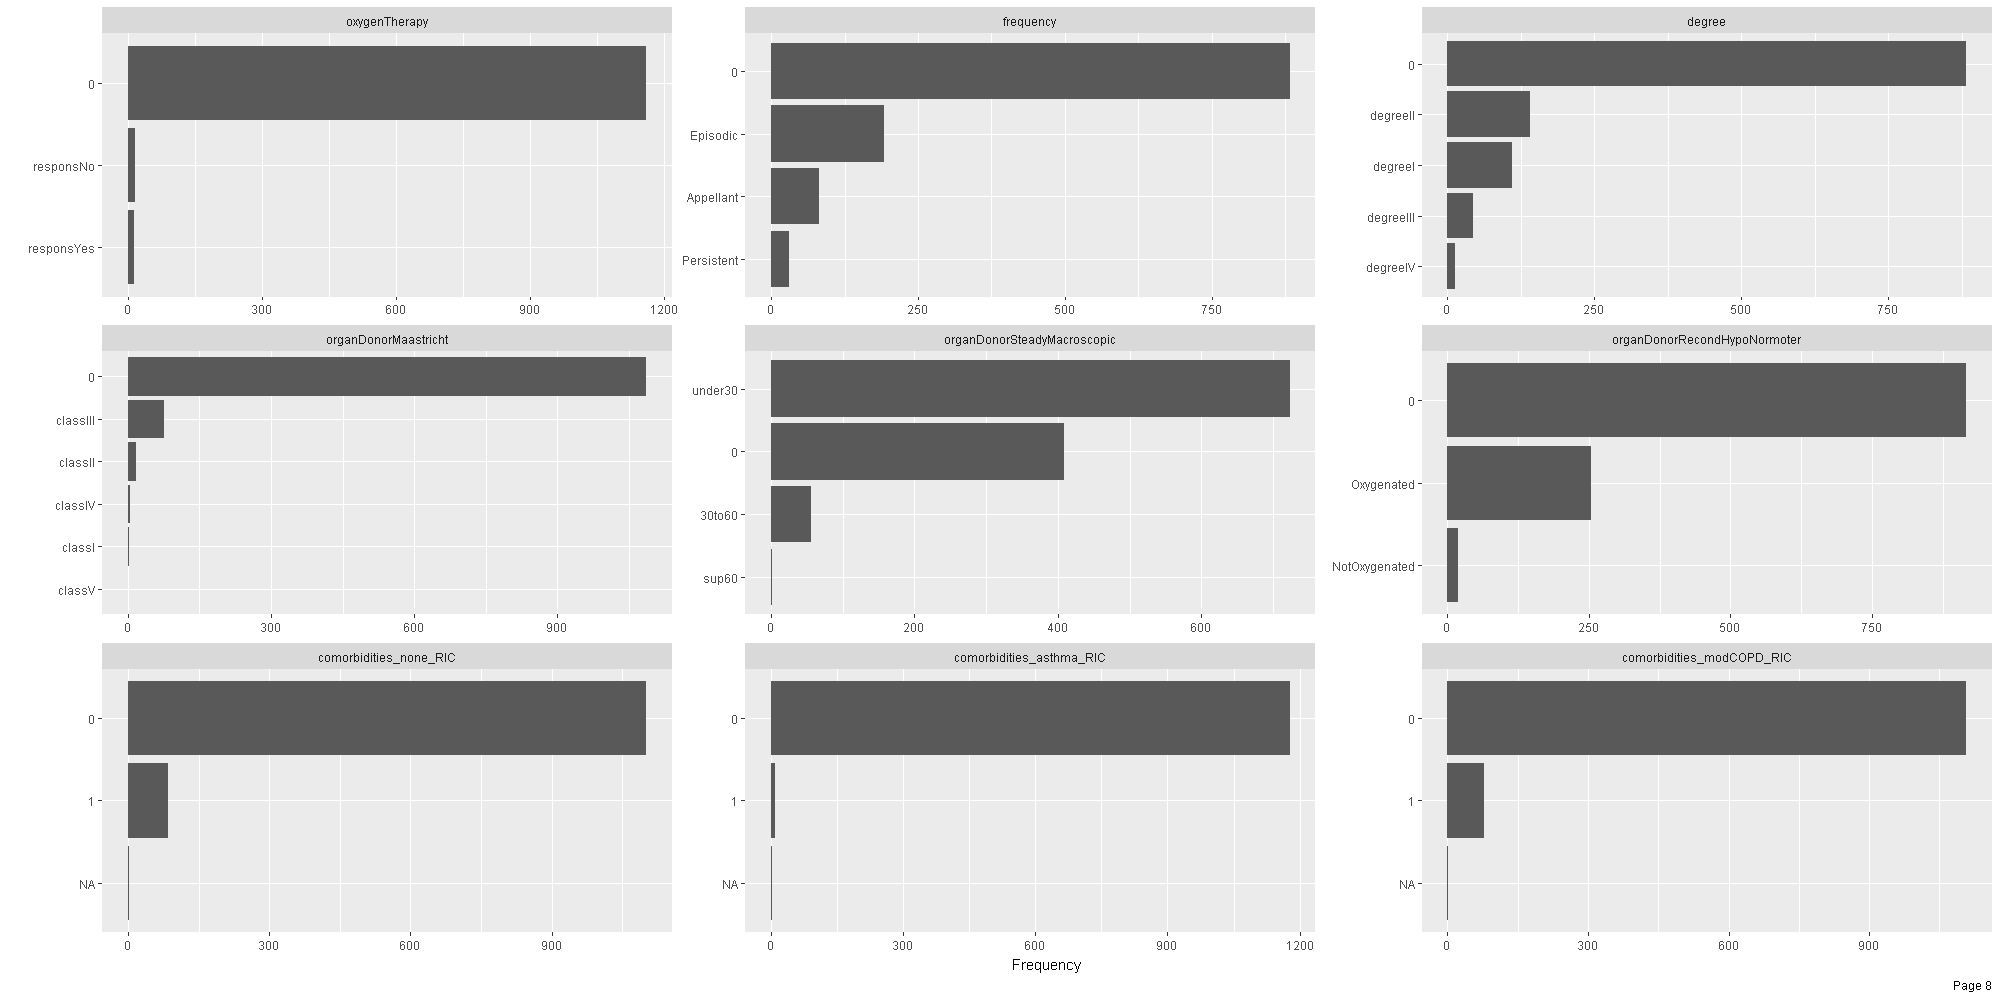

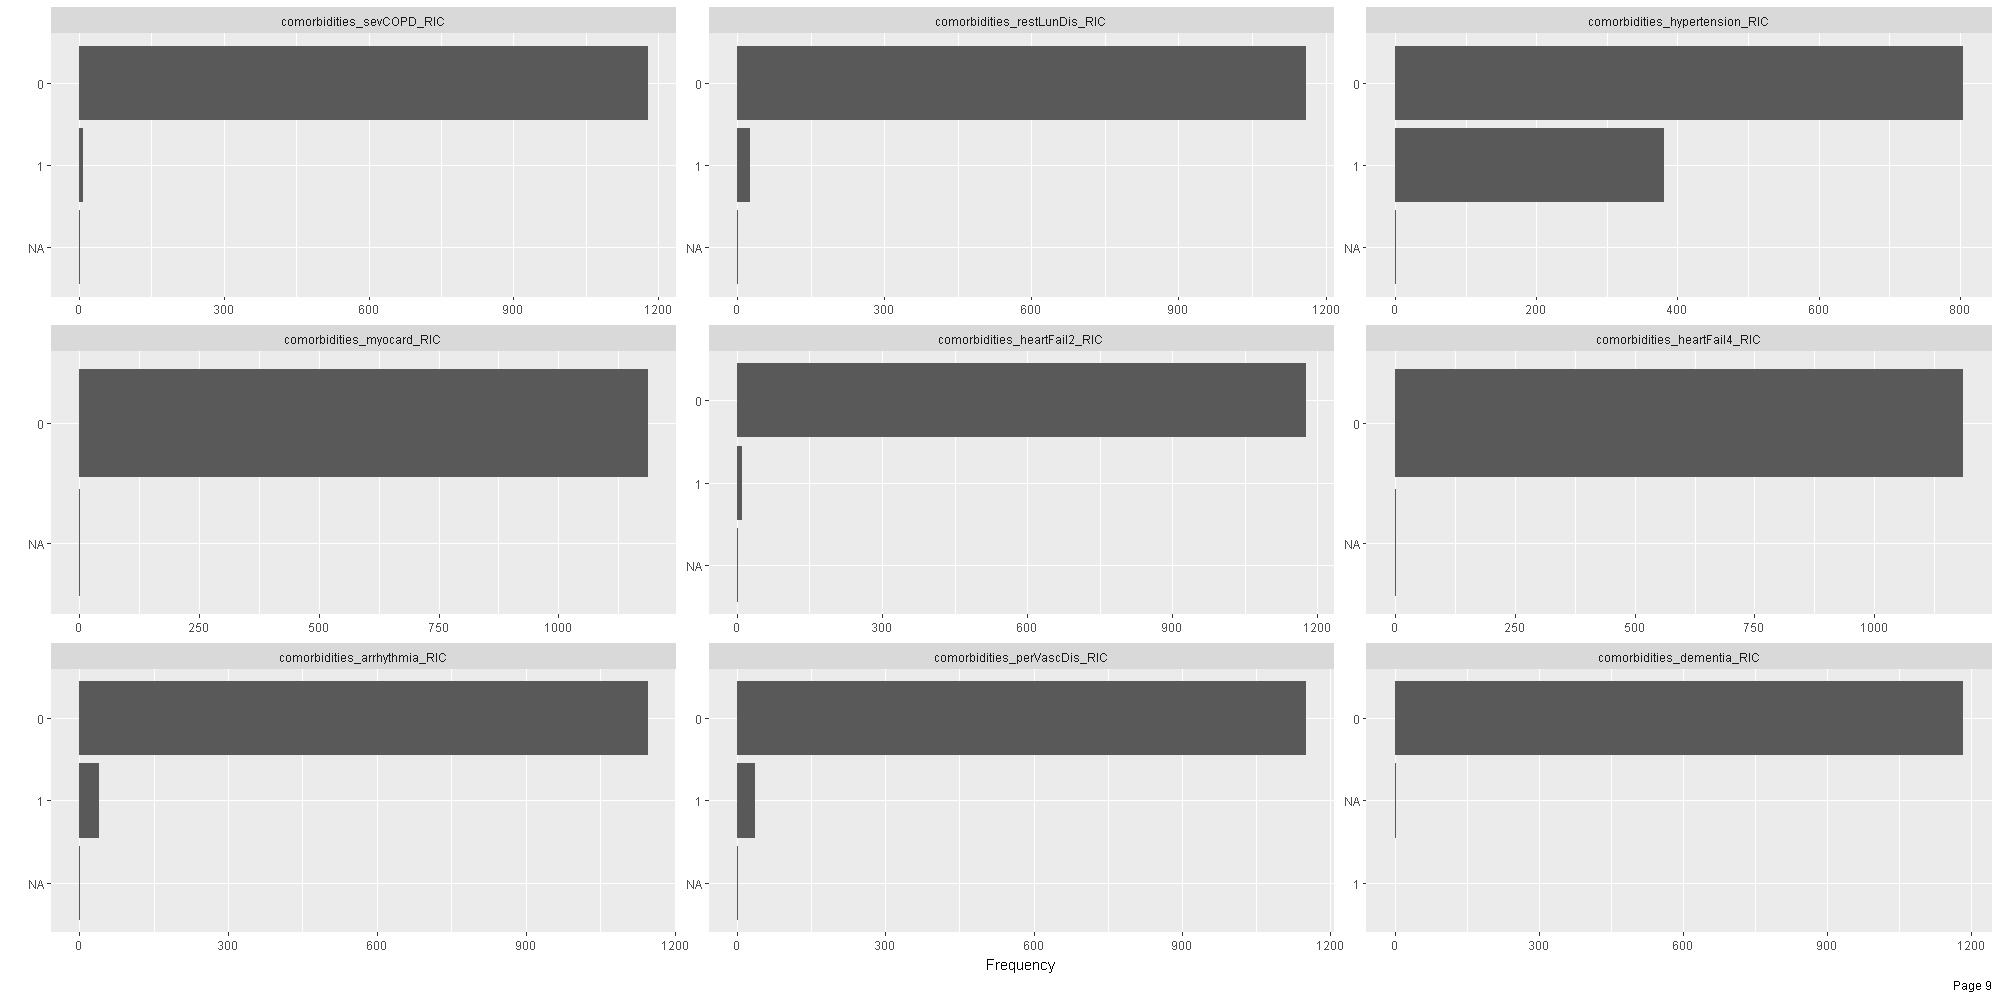

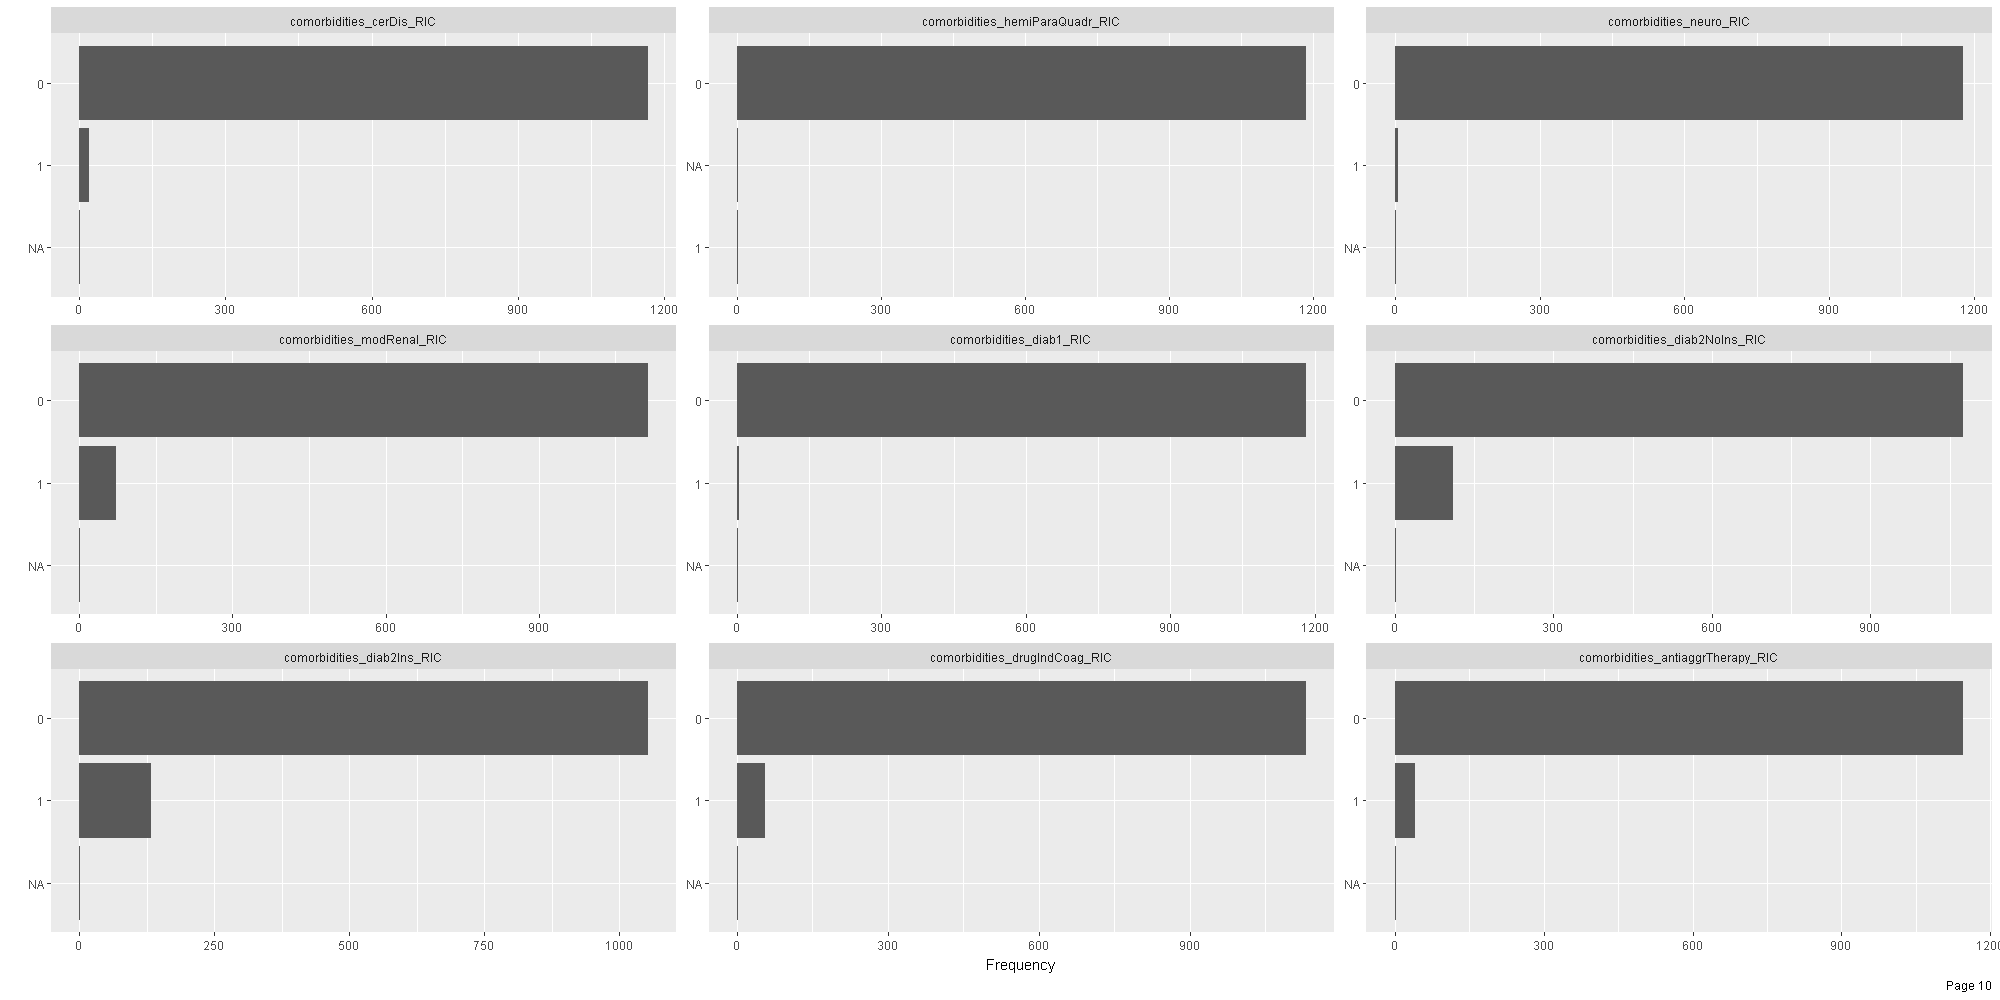

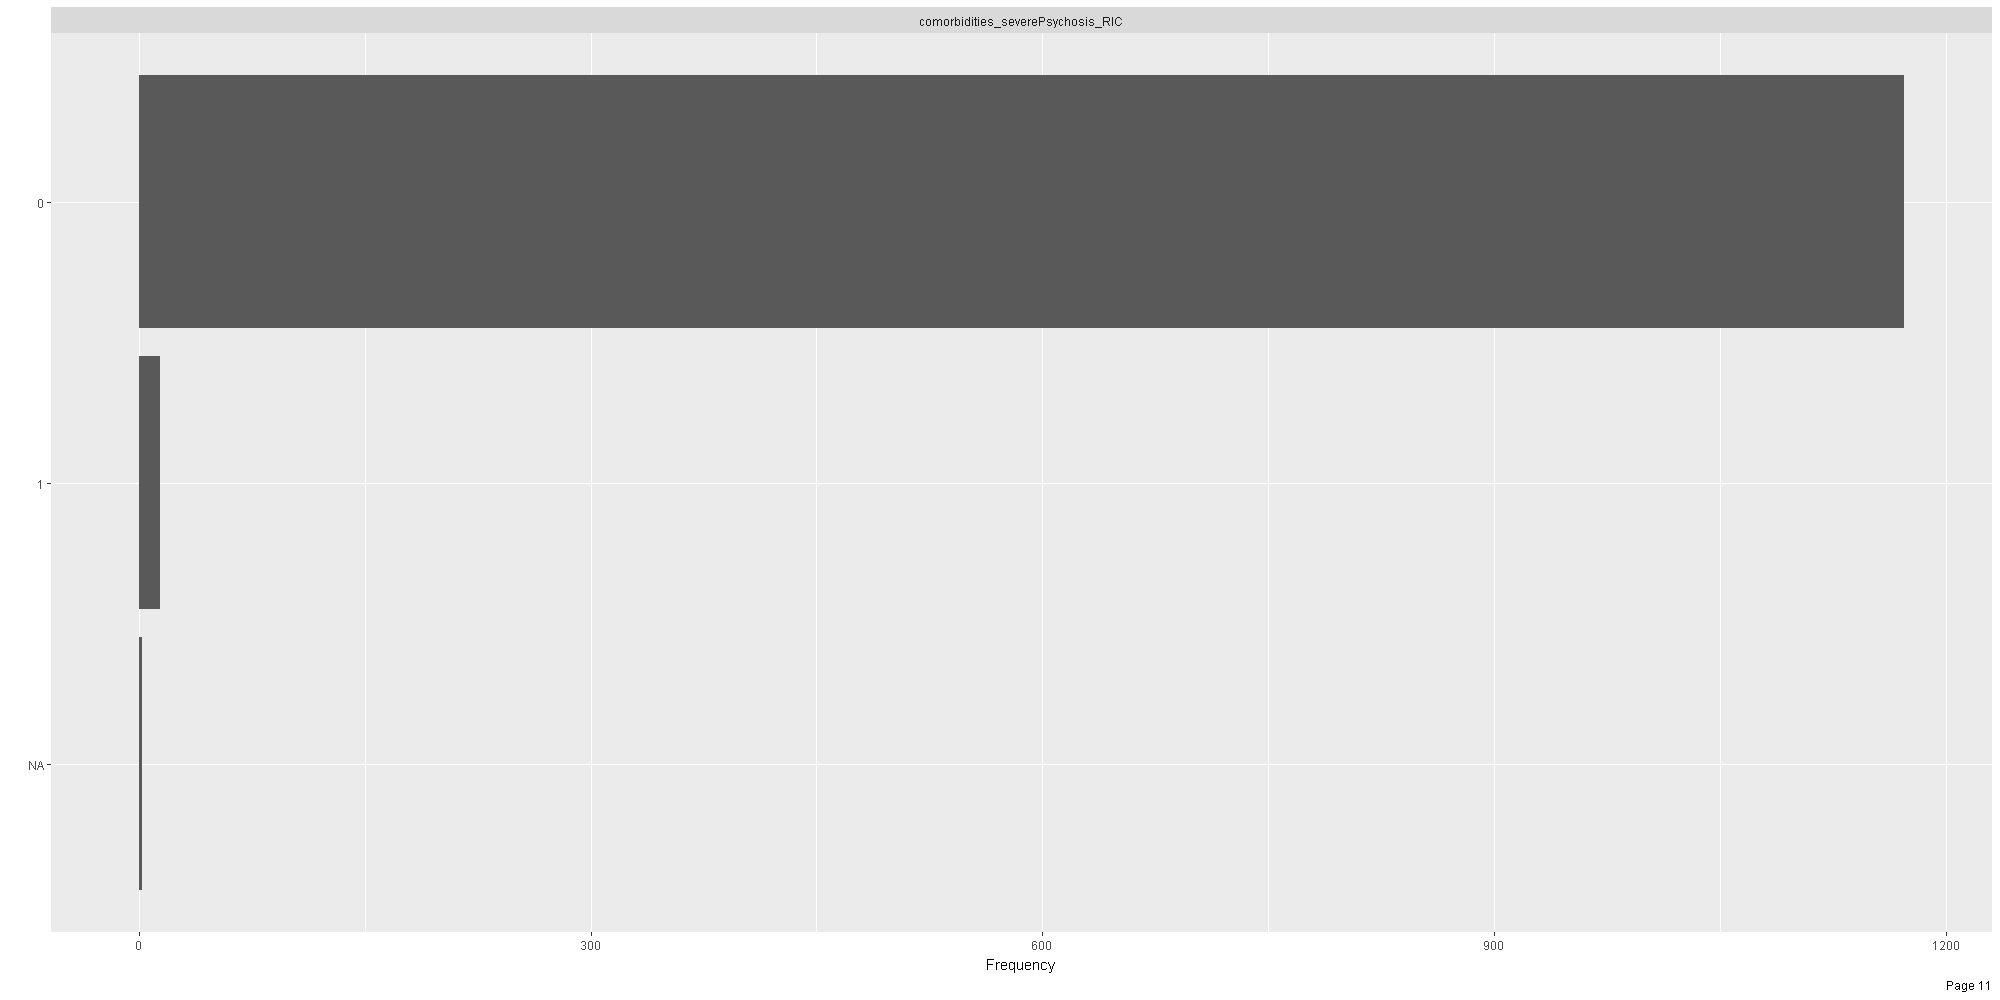

In [674]:
plot_bar(data = df)

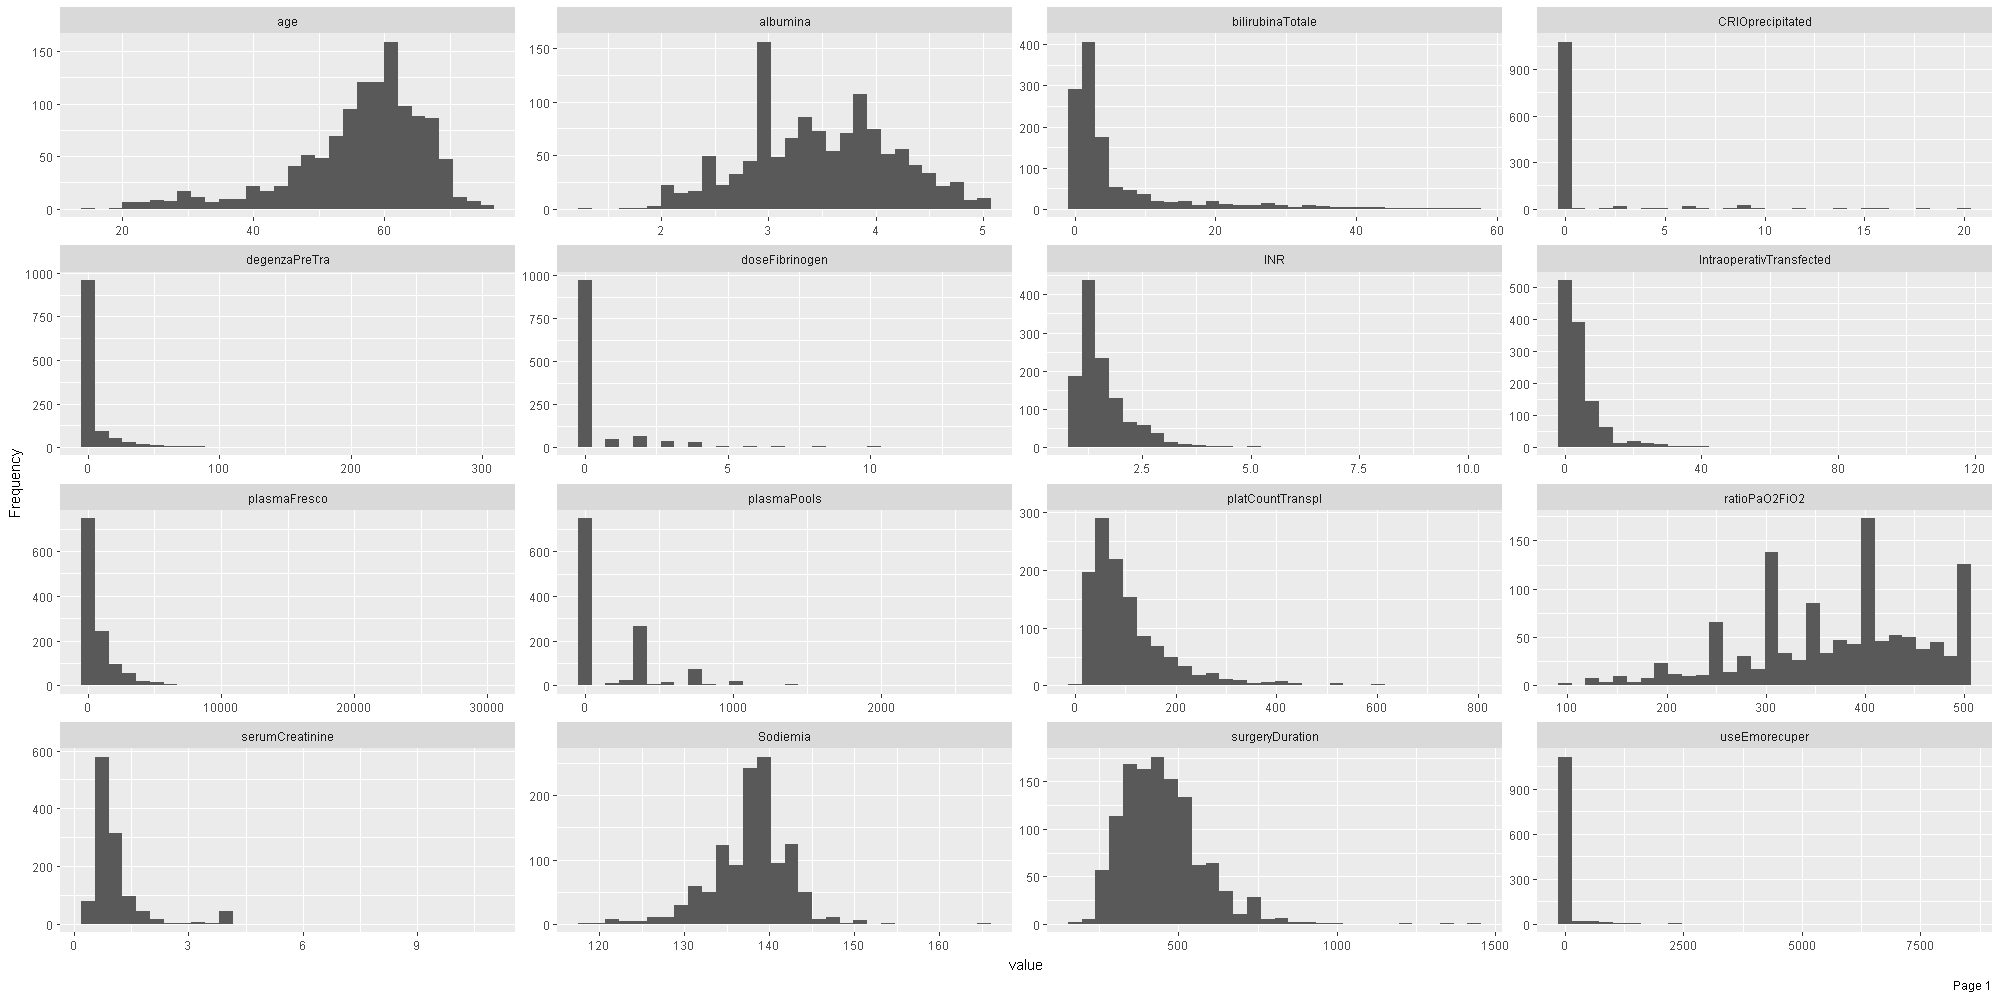

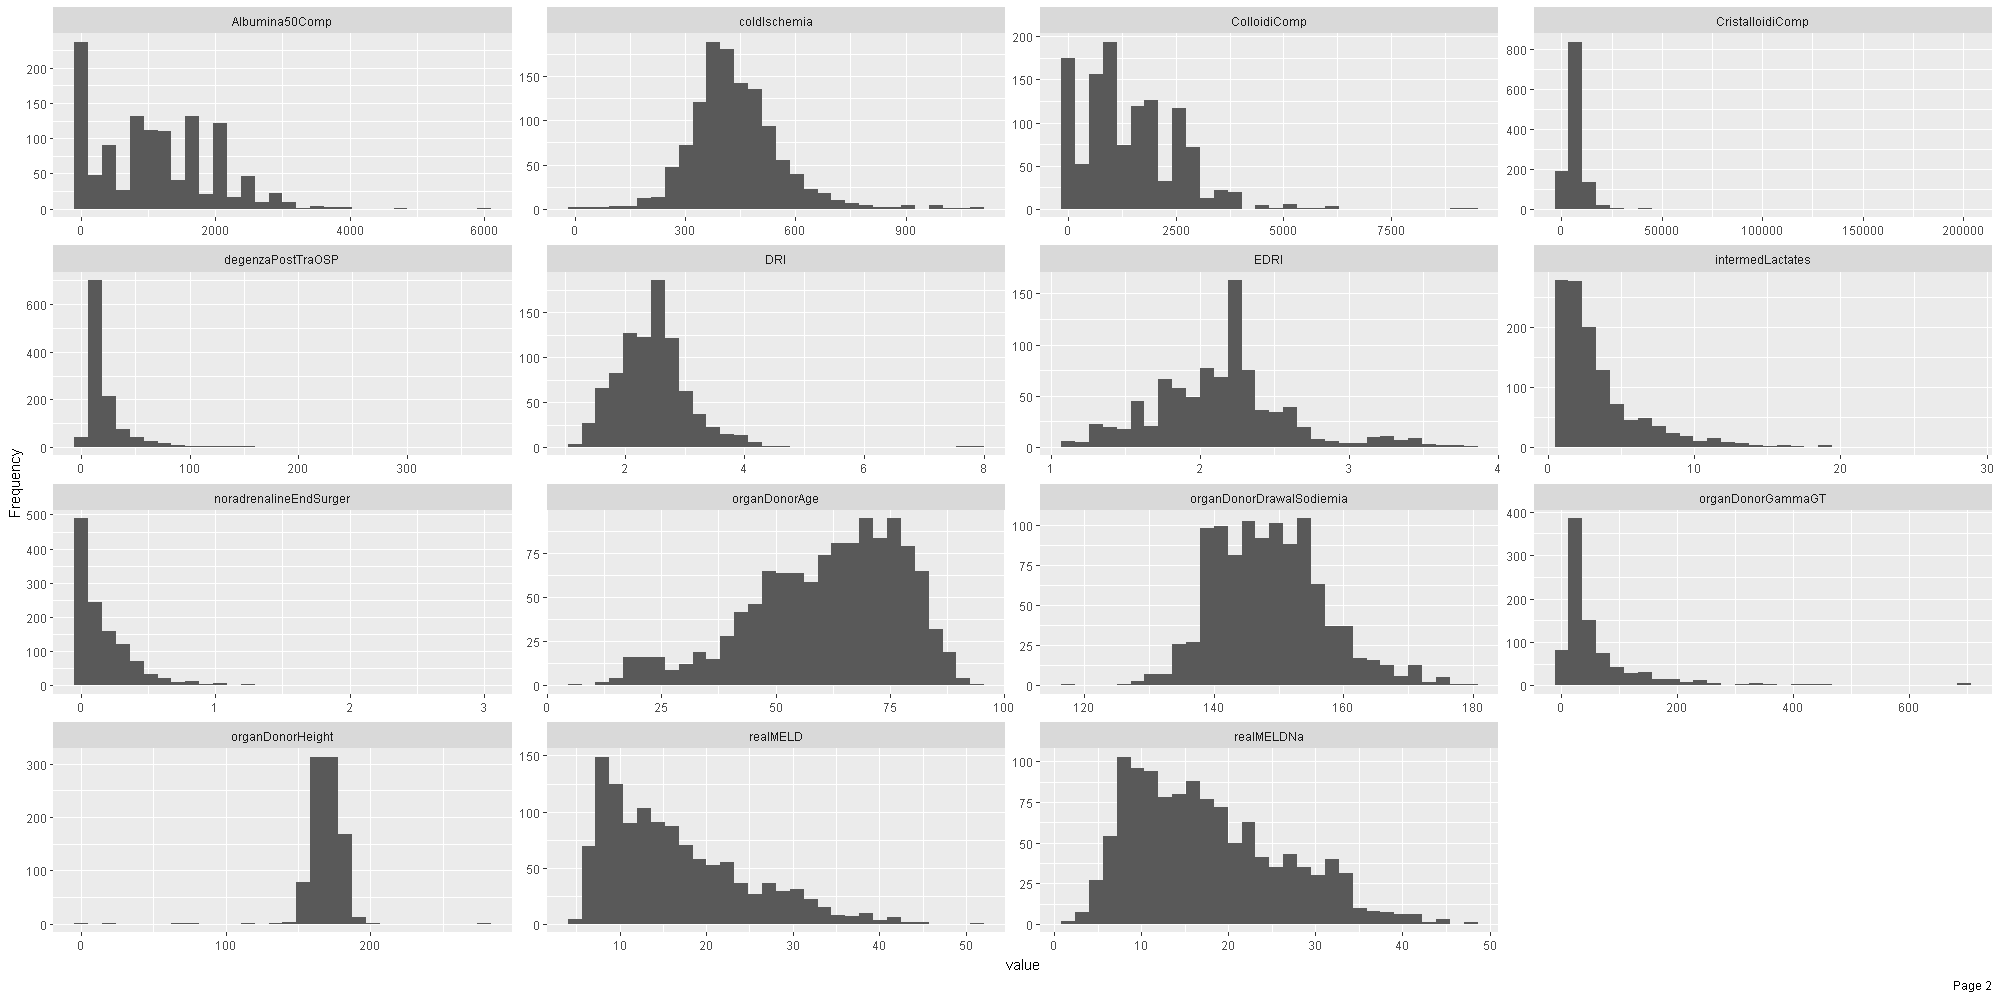

In [675]:
plot_histogram(data = df)

Positive Skew

If the coefficient of skewness is greater than 0, then the graph is said to be positively skewed with the majority of data values less than mean. Most of the values are concentrated on the left side of the graph.


Zero Skewness or Symmetric

If the coefficient of skewness is equal to 0 or approximately close to 0, then the graph is said to be symmetric and data is normally distributed.


Negatively skewed

If the coefficient of skewness is less than 0, then the graph is said to be negatively skewed with the majority of data values greater than mean. Most of the values are concentrated on the right side of the graph.

In [676]:
apply(select_if(df,is.numeric), 2, skewness, na.rm = TRUE)

age            degenzaPreTra         bilirubinaTotale 
             -1.20081044               7.32778488               2.64727378 
                     INR          serumCreatinine                 Sodiemia 
              3.72829971               4.04078339              -0.44229031 
           ratioPaO2FiO2         platCountTranspl                 albumina 
             -0.45080997               2.43202174              -0.04019523 
         surgeryDuration IntraoperativTransfected             plasmaFresco 
              1.44996786               5.51489083               7.01705787 
             plasmaPools           doseFibrinogen         CRIOprecipitated 
              2.25019254               3.89081777               4.42880836 
           useEmorecuper         CristalloidiComp             ColloidiComp 
             11.16660376              17.10434741               1.20380541 
          Albumina50Comp   noradrenalineEndSurger         intermedLactates 
              0.67632572               3.63458500               2.62769048 
            coldIschemia            organDonorAge         organDonorHeight 
              0.98944424              -0.71178256              -4.25391705 
organDonorDrawalSodiemia        organDonorGammaGT                 realMELD 
              0.47498793               3.47057366               0.97335214 
              realMELDNa                      DRI                     EDRI 
              0.64540931               1.74661710               0.60461353 
       degenzaPostTraOSP 
              5.57604463

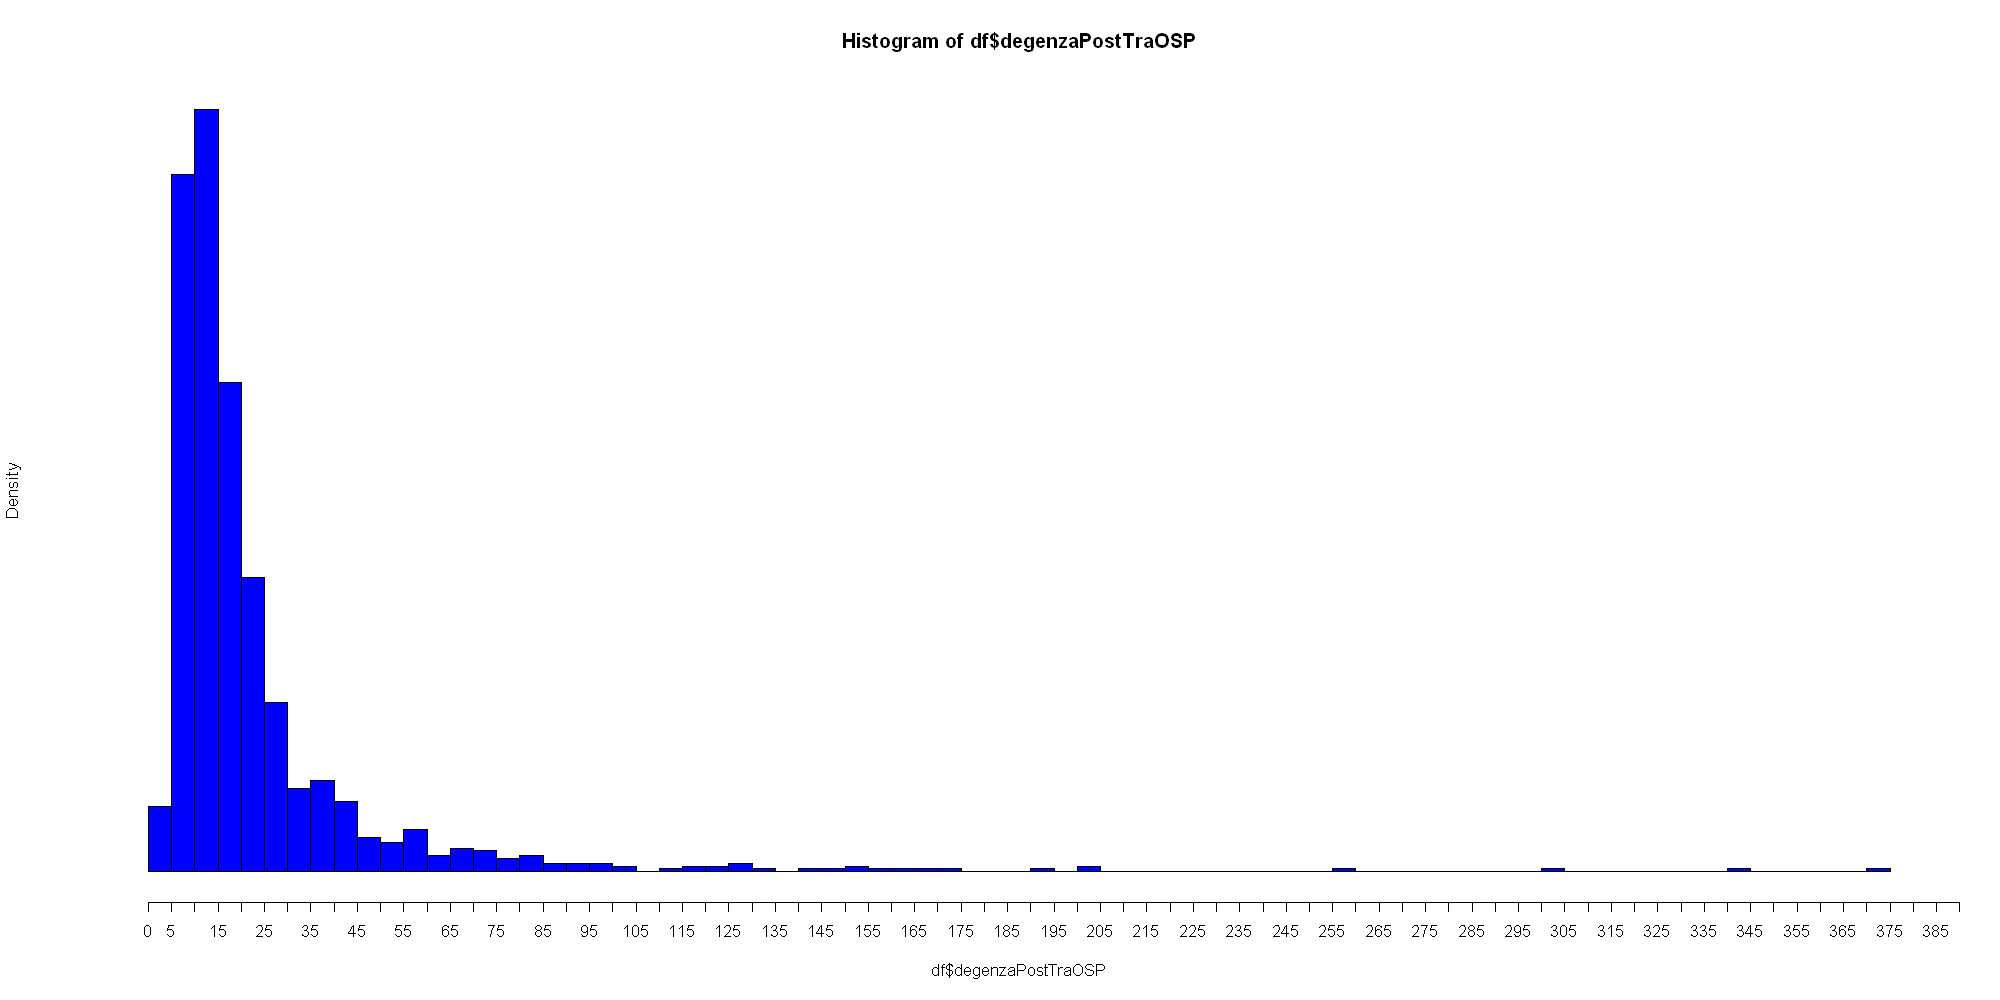

In [677]:
hist(df$degenzaPostTraOSP, freq = FALSE, axes= FALSE, breaks= 100,col="blue")

axis(1, at = seq(0, 400, by = 5))


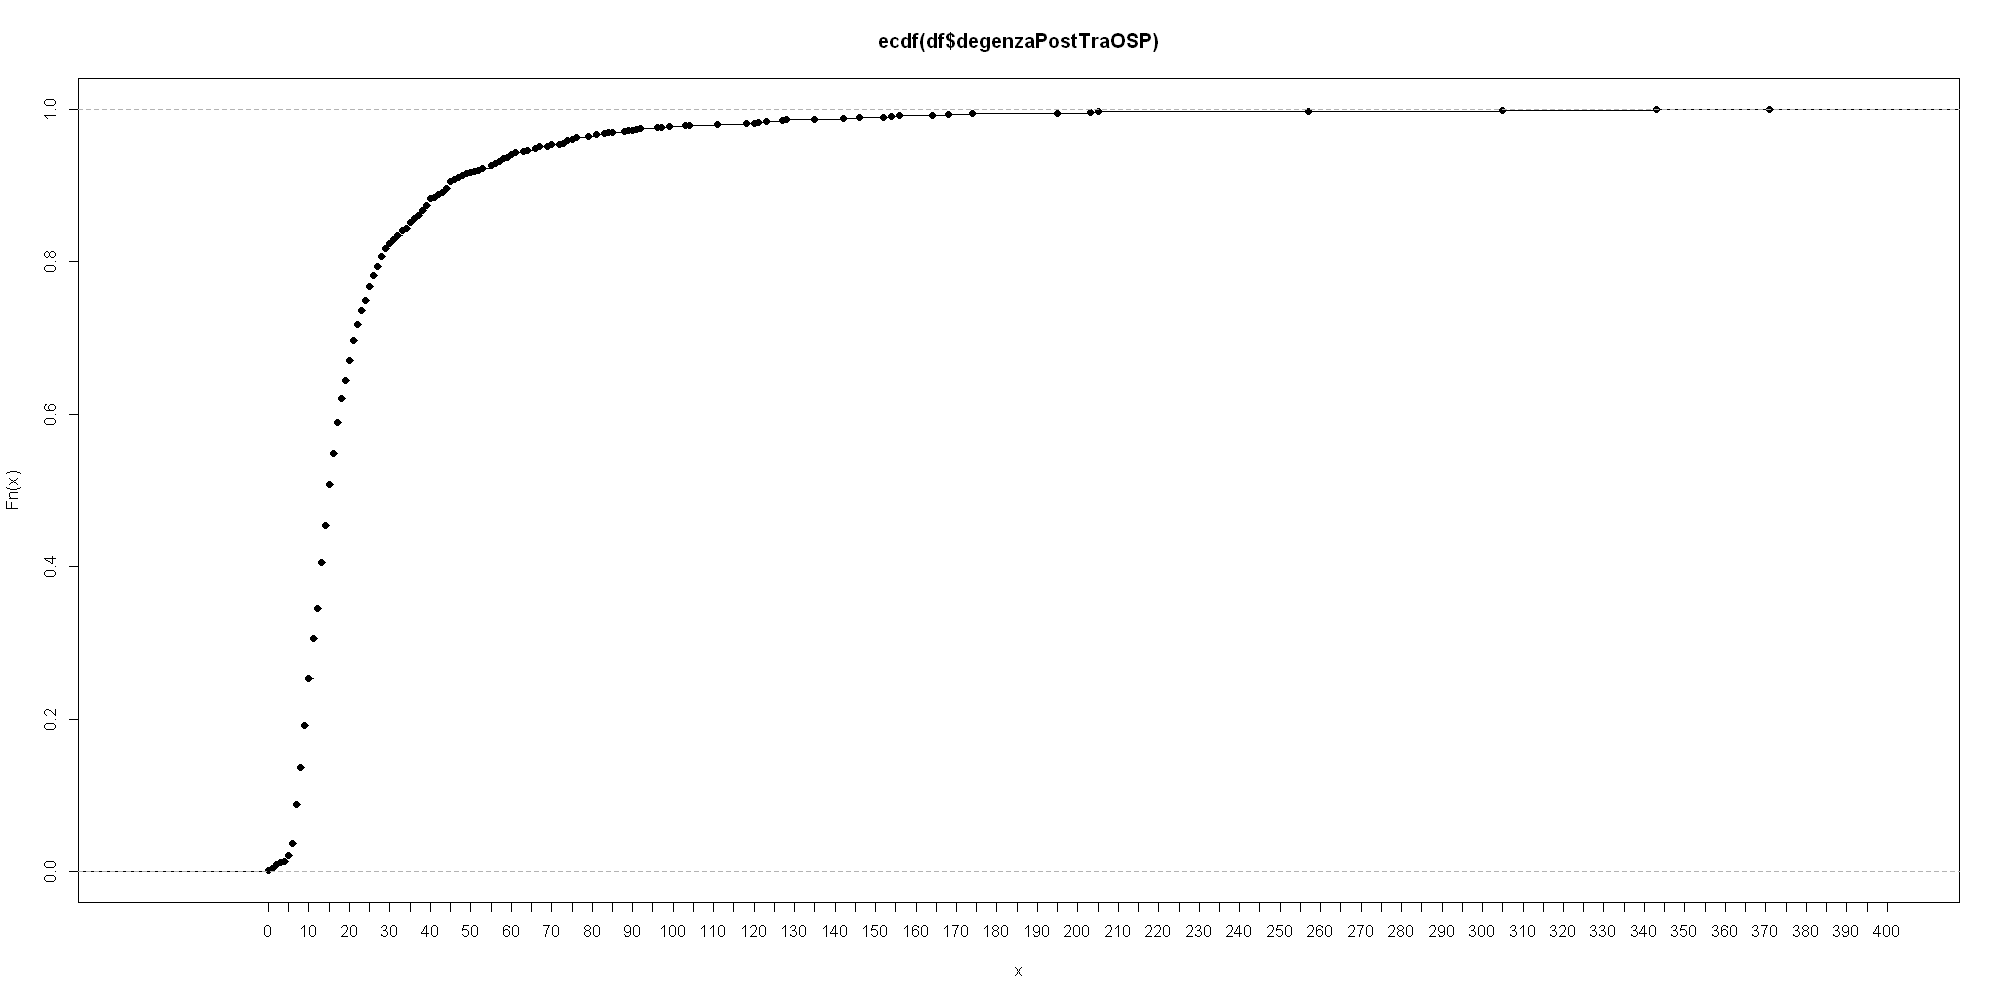

In [678]:
# calculate CDF 
CDF <- ecdf(df$degenzaPostTraOSP )
  
# draw the cdf plot
plot( CDF )
axis(1, at = seq(0, 400, by = 5))

In [679]:
df_num <- select(df,is.numeric)

In [680]:
for(i in 1:ncol(df_num)) {
  df_num[ , i][is.na(df_num[ , i])] <- mean(df_num[ , i], na.rm = TRUE)
}

In [681]:
tmp <- cor(df_num) %>%
  as.data.frame() %>%
  mutate(var1 = rownames(.)) %>%
  gather(var2, value, -var1) %>%
  arrange(desc(value)) 

tmp <- tmp[tmp$value != 1,]

In [682]:
tmp <- tmp[!duplicated(tmp$value), ]

In [683]:
df_num <- subset(df_num,select = tmp[1:40,"var1"][!duplicated(tmp[1:40,"var1"])])

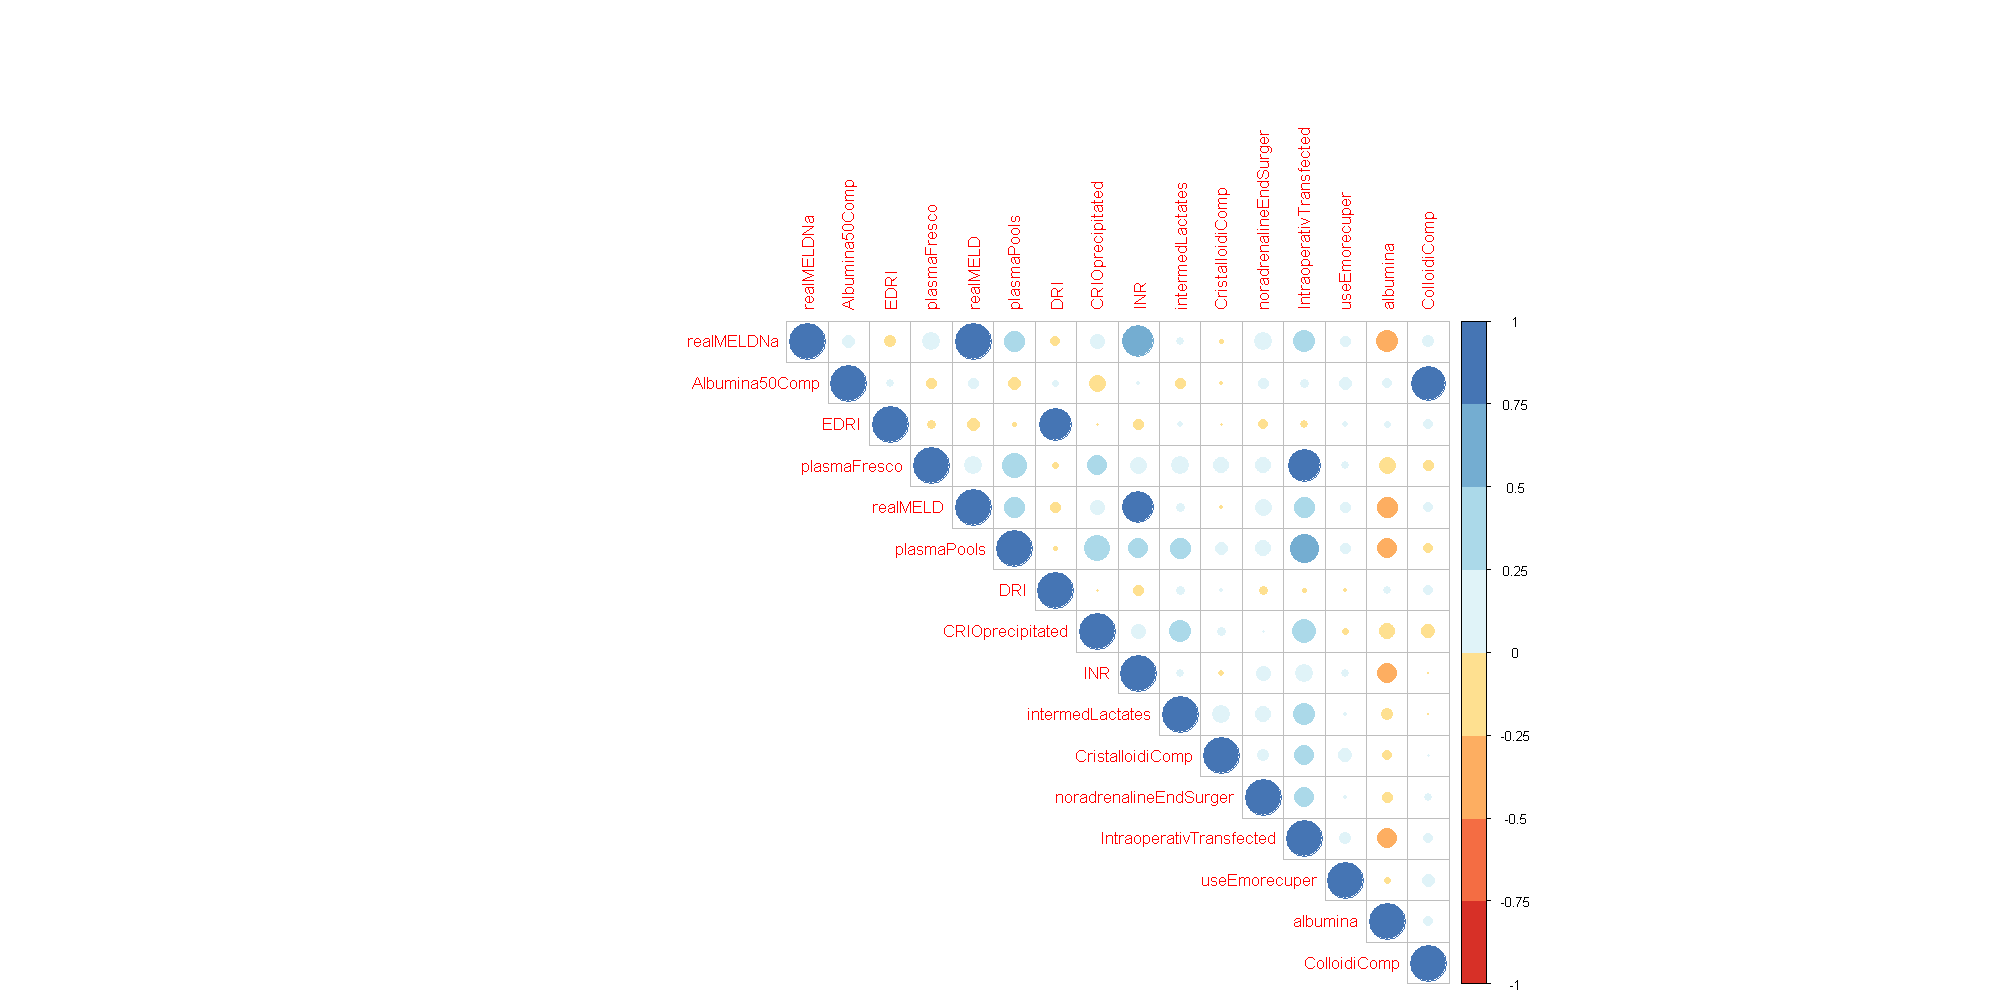

In [684]:


library(corrplot)
library(RColorBrewer)

M <-cor(df_num %>% 
          select(colnames(df_num)))

corrplot(M, type="upper", order = "original",col=brewer.pal(n=8, name="RdYlBu"))



In [685]:
tmp <- tmp[tmp$value> 0.5 | tmp$value < -0.5,]
tmp 

,var1,var2,value
32,realMELDNa,realMELD,0.9617544
34,Albumina50Comp,ColloidiComp,0.8917236
36,EDRI,DRI,0.7796333
38,plasmaFresco,IntraoperativTransfected,0.7642068
40,realMELD,INR,0.7560954
42,realMELD,bilirubinaTotale,0.7557118
44,realMELDNa,bilirubinaTotale,0.7209868
46,realMELDNa,INR,0.7199403
48,plasmaPools,IntraoperativTransfected,0.5949345
50,EDRI,organDonorAge,0.5573264


In [686]:
#correlations with objective variable

df_num <- select(df, is.numeric)

data_cor <- cor(df_num[ , colnames(df_num) != "degenzaPostTraOSP"],
                df_num$degenzaPostTraOSP, use = "complete.obs")

data_cor <- data_cor[order(data_cor[,1],decreasing=TRUE),]                                     

data_cor <- as.data.frame(data_cor)

data_cor

,data_cor
serumCreatinine,0.243163721
realMELD,0.240710274
realMELDNa,0.230474526
noradrenalineEndSurger,0.160007327
degenzaPreTra,0.156673144
IntraoperativTransfected,0.154430919
bilirubinaTotale,0.151024535
plasmaPools,0.147145356
Albumina50Comp,0.145238597
ColloidiComp,0.142887711


In [687]:
df <- df[df$CristalloidiComp >= 0,] # there are negative values (8) 

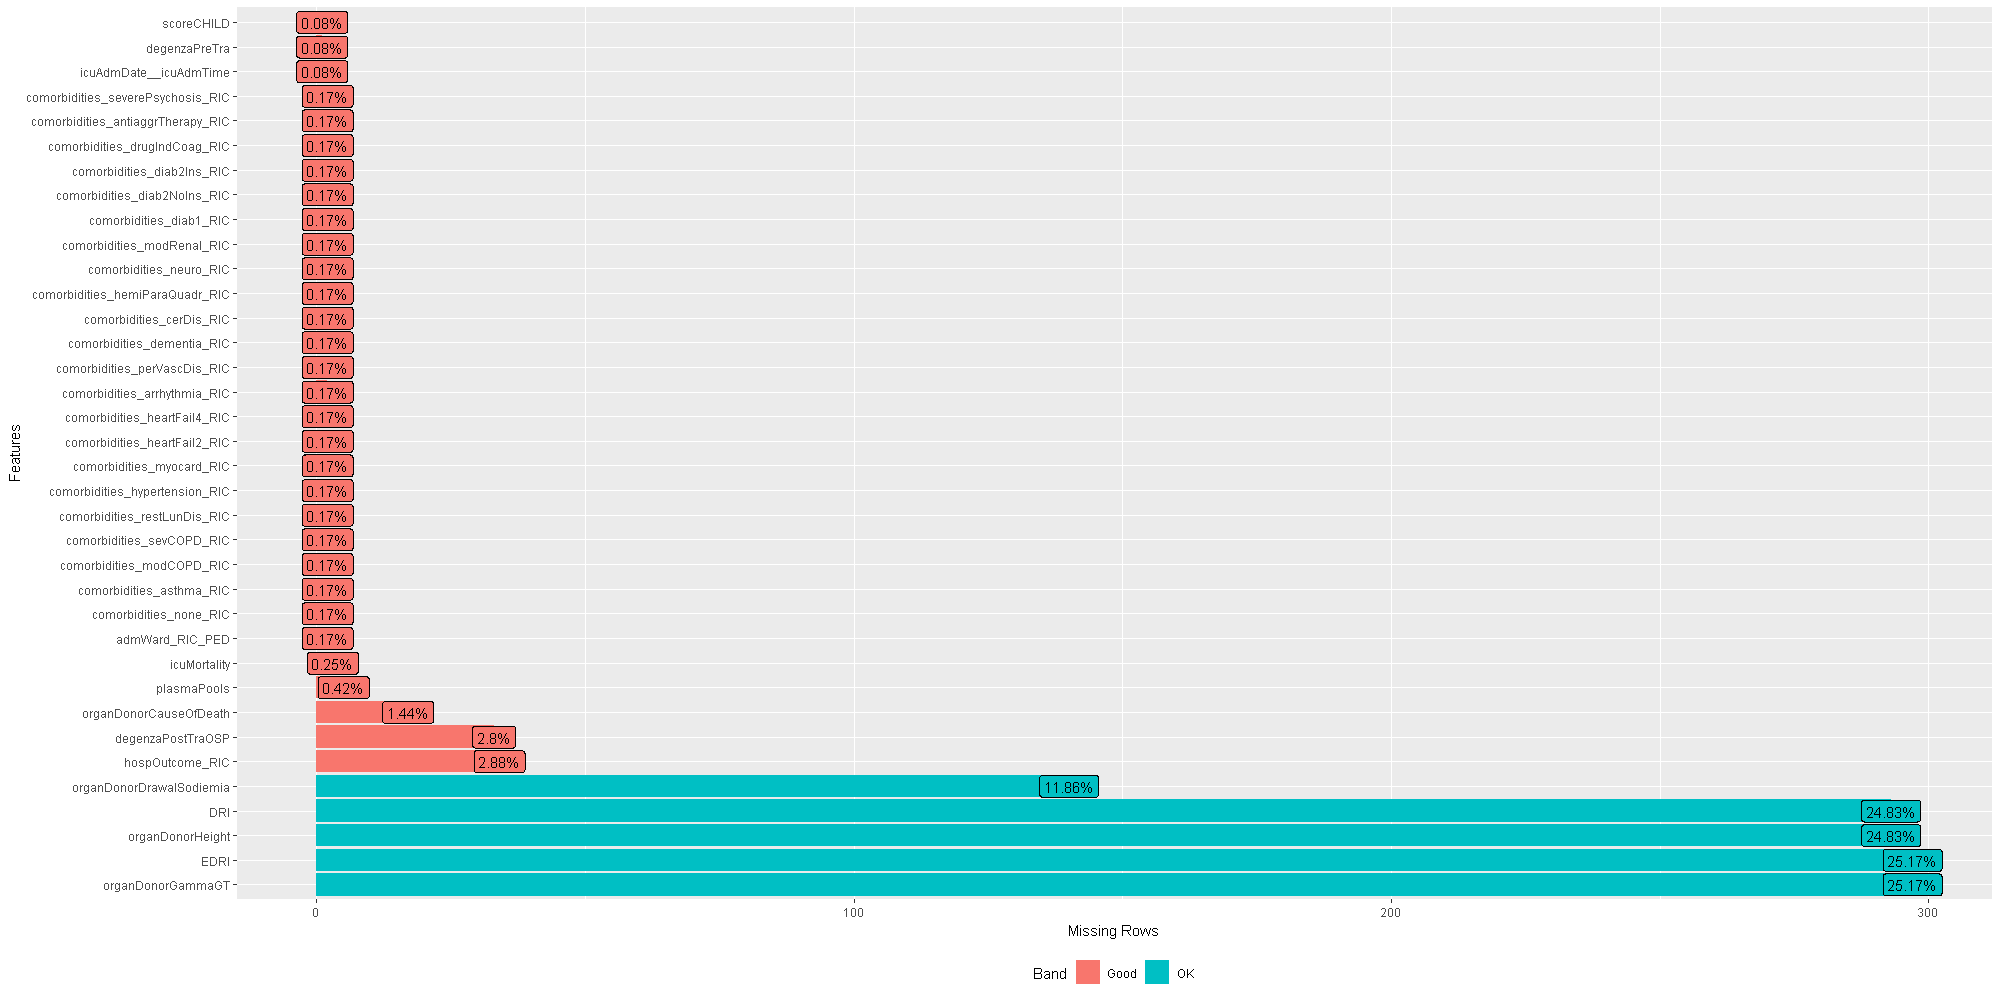

In [688]:
plot_missing(data = df,missing_only = TRUE)



# Data preparation

In [689]:
df <- df[!is.na(df$degenzaPostTraOSP),] # delete records with NA value in objective variable

In [690]:
df <- df[!(df$liverDisords_hepatFulm %in% 1)
          & !(df$liverDisords_subAcute %in% 1) ,]   # deleting retransplant, fulminant hepatitis, acute liver failure

df <- subset(df, select= -c(liverDisords_hepatFulm,liverDisords_subAcute,prevLiverTransplant))

In [691]:
# deleting combined transplant patients

load(file = "X:/datasetsProsafe/LIVERTRASPLANT/2018/tabellaUM_OT.Rdata")

OT1 <- tabellaUM_OT
rm(tabellaUM_OT)


patients_rem <- c()


patients1 <- OT1[ OT1$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,
               c('patientKey')]


OT1_rem <- OT1[!OT1$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,]

for (i in patients1){
    if (i %in% OT1_rem[,"patientKey"]){
        patients_rem <- append( patients_rem ,i)
    }
}



load(file = "X:/datasetsProsafe/LIVERTRASPLANT/2019/tabellaUM_OT.Rdata")

OT2 <- tabellaUM_OT
rm(tabellaUM_OT)


patients2 <- OT2[ OT2$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,
               c('patientKey')]


OT2_rem <- OT2[!OT2$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,]

for (i in patients2){
    if (i %in% OT2_rem[,"patientKey"]){
        patients_rem <- append( patients_rem ,i)
    }
}


load(file = "X:/datasetsProsafe/LIVERTRASPLANT/2020/tabellaUM_OT.Rdata")

OT3 <- tabellaUM_OT
rm(tabellaUM_OT)

patients3 <- OT3[ OT3$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,
               c('patientKey')]


OT3_rem <- OT3[!OT3$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,]

for (i in patients3){
    if (i %in% OT3_rem[,"patientKey"]){
        patients_rem <- append( patients_rem ,i)
    }
}

load(file = "X:/datasetsProsafe/LIVERTRASPLANT/2021/tabellaUM_OT.Rdata")

OT4 <- tabellaUM_OT
rm(tabellaUM_OT)

patients4 <- OT4[ OT4$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,
               c('patientKey')]


OT4_rem <- OT4[!OT4$procOrgantransDetail__Id %in% "procOrgantransDetail_liverTransp" ,]

for (i in patients4){
    if (i %in% OT4_rem[,"patientKey"]){
        patients_rem <- append( patients_rem ,i)
    }
}


df <- (df[!(df$patientKey %in% patients_rem),])



In [692]:
df <- df[df$CristalloidiComp >= 0,] # there are negative values (8) 

In [693]:
df <-  df %>%  #create historical eras of 6 months to account for changes in clinical and organizational practices during the periods under consideration
  mutate(Periodi_trap = case_when(
    icuAdmDate__icuAdmDate > "2018-01-01" & icuAdmDate__icuAdmDate <= "2018-12-31" ~ 1,
    icuAdmDate__icuAdmDate >= "2019-01-01" & icuAdmDate__icuAdmDate < "2019-06-30" ~ 2,
    icuAdmDate__icuAdmDate >= "2019-06-30" & icuAdmDate__icuAdmDate <= "2019-12-31" ~ 3,
    icuAdmDate__icuAdmDate >= "2020-01-01" & icuAdmDate__icuAdmDate < "2020-06-30" ~ 4,
    icuAdmDate__icuAdmDate >= "2020-06-30" & icuAdmDate__icuAdmDate <= "2020-12-31" ~ 5,
    icuAdmDate__icuAdmDate >= "2021-01-01" & icuAdmDate__icuAdmDate < "2021-06-30" ~ 6,
    icuAdmDate__icuAdmDate >= "2021-06-30" & icuAdmDate__icuAdmDate <= "2021-12-31" ~ 7,
    icuAdmDate__icuAdmDate >= "2022-01-01" & icuAdmDate__icuAdmDate < "2022-08-30" ~ 8))

df$Periodi_trap <- as.factor(df$Periodi_trap)

df <- subset(df, select = -icuAdmDate__icuAdmDate)

In [694]:
df$trap_notturno <- ifelse( df$icuAdmDate__icuAdmTime <= 11 & df$icuAdmDate__icuAdmTime >= 0, 1 , 0)

df$trap_notturno <- as.factor(df$trap_notturno)

df <- subset(df, select = -icuAdmDate__icuAdmTime)

In [695]:
df <- df %>%  
  mutate(new_admWard = case_when(      
      degenzaPreTra <= 1 ~ "HOME",
      degenzaPreTra > 1 & (admWard_RIC_PED == "medicalWard" | admWard_RIC_PED == "surgicalWard") ~ "WARD",
      degenzaPreTra > 1 & (admWard_RIC_PED == "otherIcu" | admWard_RIC_PED == "emergRoom" | admWard_RIC_PED == "highDep") ~ "ICU"))


df$new_admWard <- as.factor(df$new_admWard)

df <- subset(df, select = -admWard_RIC_PED)

In [696]:
df <-  df %>% #create a new variable mixing portosystEncephalPresent, degree and frequency
  mutate(EPScum = case_when(portosystEncephalPresent == "respNo" ~ 0,
                            (portosystEncephalPresent == "respPrevious" & frequency == "Episodic" & (degree == "degreeI" |degree == "degreeII"))~ 1,
                            (portosystEncephalPresent == "respEffect" & frequency == "Episodic" & (degree == "degreeI" |degree == "degreeII"))~ 2,
                            (portosystEncephalPresent == "respPrevious" & frequency == "Episodic" & (degree == "degreeIII" |degree == "degreeIV"))~ 3,
                            (portosystEncephalPresent == "respPrevious" & frequency == "Appellant" & (degree == "degreeI" |degree == "degreeII"))~ 4,
                            (portosystEncephalPresent == "respEffect" & frequency == "Persistent" & (degree == "degreeI" |degree == "degreeII"))~ 5,
                            (portosystEncephalPresent == "respPrevious" & frequency == "Appellant" & (degree == "degreeIII" |degree == "degreeIV"))~ 6,
                            (portosystEncephalPresent == "respEffect" & frequency == "Episodic" & (degree == "degreeIII" |degree == "degreeIV"))~ 7,
                            (portosystEncephalPresent == "respEffect" & frequency == "Persistent" & (degree == "degreeIII" |degree == "degreeIV"))~ 8))

df <- subset(df, select = - c(portosystEncephalPresent,frequency,degree))

df$EPScum <- as.factor(df$EPScum)

In [697]:
df$organDonorMaastricht <- ifelse( df$organDonorMaastricht == "classI" | df$organDonorMaastricht == "classIV"
                                        | df$organDonorMaastricht == "classV", "class_other" , df$organDonorMaastricht)

df$organDonorMaastricht <- as.factor(df$organDonorMaastricht)

In [698]:
# colestatiche




df <-  df %>% 
  mutate(colestatiche = case_when(liverDisords_cirrhosisBiliaryPrimitiv==1|liverDisords_cirrhosisBiliarySecond==1|
                                  liverDisords_primitScleroColangitis==1|
          liverDisords_extraEpathiBileDucts==1|liverDisords_otherCongenitBilia==1|
                                  liverDisords_otherCholestaticDisease==1~ 1,
                                  TRUE~ 0))

df$colestatiche <- as.factor(df$colestatiche)

df <- subset(df, select= - c(liverDisords_cirrhosisBiliaryPrimitiv,liverDisords_cirrhosisBiliarySecond,
                             liverDisords_primitScleroColangitis,liverDisords_extraEpathiBileDucts,
                            liverDisords_otherCongenitBilia, liverDisords_otherCholestaticDisease))



#rare

df <-  df %>% 
  mutate(rare = case_when(liverDisords_Hemochromatosis == 1|liverDisords_cirrhosisCryptogenetic == 1|
    liverDisords_cirrhosisOtherRaison == 1|liverDisords_otherIndication == 1|liverDisords_wilsonDisease == 1|
    liverDisords_cirrhosisDrugs == 1| liverDisords_buddChiariSyndrome == 1 | 
                          liverDisords_polycysticDisease == 1 | liverDisords_cirrhosisAutoimmune == 1 ~ 1,
                          TRUE ~ 0))

df$rare <- as.factor(df$rare)

df <- subset(df, select= - c(liverDisords_Hemochromatosis,liverDisords_cirrhosisCryptogenetic,
                             liverDisords_cirrhosisOtherRaison,liverDisords_otherIndication,liverDisords_wilsonDisease,
                            liverDisords_buddChiariSyndrome,liverDisords_polycysticDisease,liverDisords_cirrhosisAutoimmune))


#virali

df <-  df %>% 
  mutate(virali = case_when(liverDisords_cirrhosisVirusC == 1|liverDisords_cirrhosisVirusB == 1|
                            liverDisords_cirrhosisVirusD == 1|
                            liverDisords_cirrhosisVirusOther == 1 ~ 1,
                            TRUE ~ 0))

df$virali <- as.factor(df$virali)

df <- subset(df, select= - c(liverDisords_cirrhosisVirusC,liverDisords_cirrhosisVirusB,
                             liverDisords_cirrhosisVirusD,liverDisords_cirrhosisVirusOther))



#tumore

df <-  df %>% 
  mutate(tumore = case_when(liverDisords_HCCstageI == 1 | liverDisords_HCCstageII == 1 ~ 1,                 
                            TRUE ~ 0))

df$tumore <- as.factor(df$tumore)

df <- subset(df, select= - c(liverDisords_HCCstageI,liverDisords_HCCstageII))

In [699]:
#respiratorie

df <- df %>% 
    mutate(comorbidities_respiratorie = ifelse( comorbidities_asthma_RIC == 1 | comorbidities_modCOPD_RIC == 1 |
                                               comorbidities_sevCOPD_RIC == 1 | comorbidities_restLunDis_RIC == 1 |
                                               oxygenTherapy == "responsYes", 1, 0))

df$comorbidities_respiratorie <- as.factor(df$comorbidities_respiratorie)
df <- subset(df, select = -c(comorbidities_asthma_RIC,comorbidities_modCOPD_RIC, comorbidities_sevCOPD_RIC, 
                             comorbidities_restLunDis_RIC, oxygenTherapy ))






#cardiovascolari

df <- df %>% 
    mutate(comorbidities_cardiovascolari = ifelse( comorbidities_myocard_RIC == 1 | comorbidities_heartFail2_RIC == 1 |
                                               comorbidities_heartFail4_RIC == 1 | comorbidities_arrhythmia_RIC == 1 |
                                               comorbidities_perVascDis_RIC == 1, 1, 0))

df$comorbidities_cardiovascolari <- as.factor(df$comorbidities_cardiovascolari)
df <- subset(df, select = -c(comorbidities_myocard_RIC,comorbidities_heartFail2_RIC, comorbidities_heartFail4_RIC, 
                             comorbidities_arrhythmia_RIC, comorbidities_perVascDis_RIC ))


#neurologiche

df <- df %>% 
    mutate(comorbidities_neurologiche = ifelse( comorbidities_dementia_RIC == 1 | comorbidities_cerDis_RIC == 1 |
                                               comorbidities_hemiParaQuadr_RIC == 1 | comorbidities_neuro_RIC == 1 , 1, 0))

df$comorbidities_neurologiche <- as.factor(df$comorbidities_neurologiche)
df <- subset(df, select = -c(comorbidities_dementia_RIC,comorbidities_cerDis_RIC, comorbidities_hemiParaQuadr_RIC, 
                             comorbidities_neuro_RIC))


#renali

df <- df %>% 
    mutate(comorbidities_renali = ifelse( comorbidities_modRenal_RIC == 1 | comorbidities_modRenal_RIC == 1, 1, 0))

df$comorbidities_renali <- as.factor(df$comorbidities_renali)
df <- subset(df, select = -c(comorbidities_modRenal_RIC,comorbidities_modRenal_RIC))


#endocrine

df <-  df %>% 
  mutate(comorbidities_diabete = case_when(comorbidities_diab2NoIns_RIC == 1 ~ 1,
  comorbidities_diab1_RIC == 0 & comorbidities_diab2Ins_RIC == 0 & comorbidities_diab2NoIns_RIC == 0 ~ 0,
  comorbidities_diab1_RIC == 1 |comorbidities_diab2Ins_RIC == 1 ~ 2))

df$comorbidities_diabete <- as.factor(df$comorbidities_diabete)
df <- subset(df, select= - c(comorbidities_diab1_RIC,comorbidities_diab2Ins_RIC,comorbidities_diab2NoIns_RIC))

#scoagulazione

df <- df %>% 
    mutate(comorbidities_scoagulazione = ifelse( comorbidities_drugIndCoag_RIC == 1 |
                                                comorbidities_antiaggrTherapy_RIC == 1 , 1, 0))

df$comorbidities_scoagulazione <- as.factor(df$comorbidities_scoagulazione)
df <- subset(df, select = -c(comorbidities_drugIndCoag_RIC,comorbidities_antiaggrTherapy_RIC))

In [700]:
df <- df %>% 
    mutate(MELDEXCEPTION = ifelse( pulmonarHypertension == "responsYes" |
                                                epatopulmonarSyndrome == "responsYes" , 1, 0))

df$MELDEXCEPTION <- as.factor(df$MELDEXCEPTION)
df <- subset(df, select = -c(pulmonarHypertension,epatopulmonarSyndrome))

In [701]:
df <- df %>% mutate(IntraoperativTransfected = (useEmorecuper / 350) + IntraoperativTransfected )

df <- subset(df, select = -useEmorecuper)

In [702]:
df <- subset(df, select = -patientKey)
df$centreCode <- as.factor(df$centreCode)

In [703]:
tmp <- unname(unlist(quantile(df$degenzaPostTraOSP, probs = c(0.9))))
df <- df %>% mutate(degenzaPostTraOSP = case_when(hospOutcome_RIC  %in% "hospDead" ~ tmp,
                                                  icuMortality %in% 1 ~ tmp,
                                                  TRUE ~ degenzaPostTraOSP))  #add penalty in degenzaPostTraOSP for patients who died

In [704]:
df$deg_cat <- cut(df$degenzaPostTraOSP ,breaks=c(0,8,18,Inf))

df <- df %>% mutate(deg_cat = case_when(deg_cat == levels(df$deg_cat)[1] ~ "Ottimo",     # discretize objective variable
                                      deg_cat == levels(df$deg_cat)[2] ~ "Accettabile",
                                      deg_cat == levels(df$deg_cat)[3] ~ "Complicato"))

df$deg_cat <- as.factor(df$deg_cat)

df <- subset(df, select = -c(hospOutcome_RIC,icuMortality,degenzaPostTraOSP))

In [705]:
df <- subset(df, select = - c(EDRI,DRI,ColloidiComp,realMELDNa,
                              serumCreatinine,INR,bilirubinaTotale)) #delete high correlated variables and dependent variables

In [706]:
df <- df[lapply(df, function(x) sum(is.na(x))/length(x)) < 0.50] #remove column with more than 50% of NA

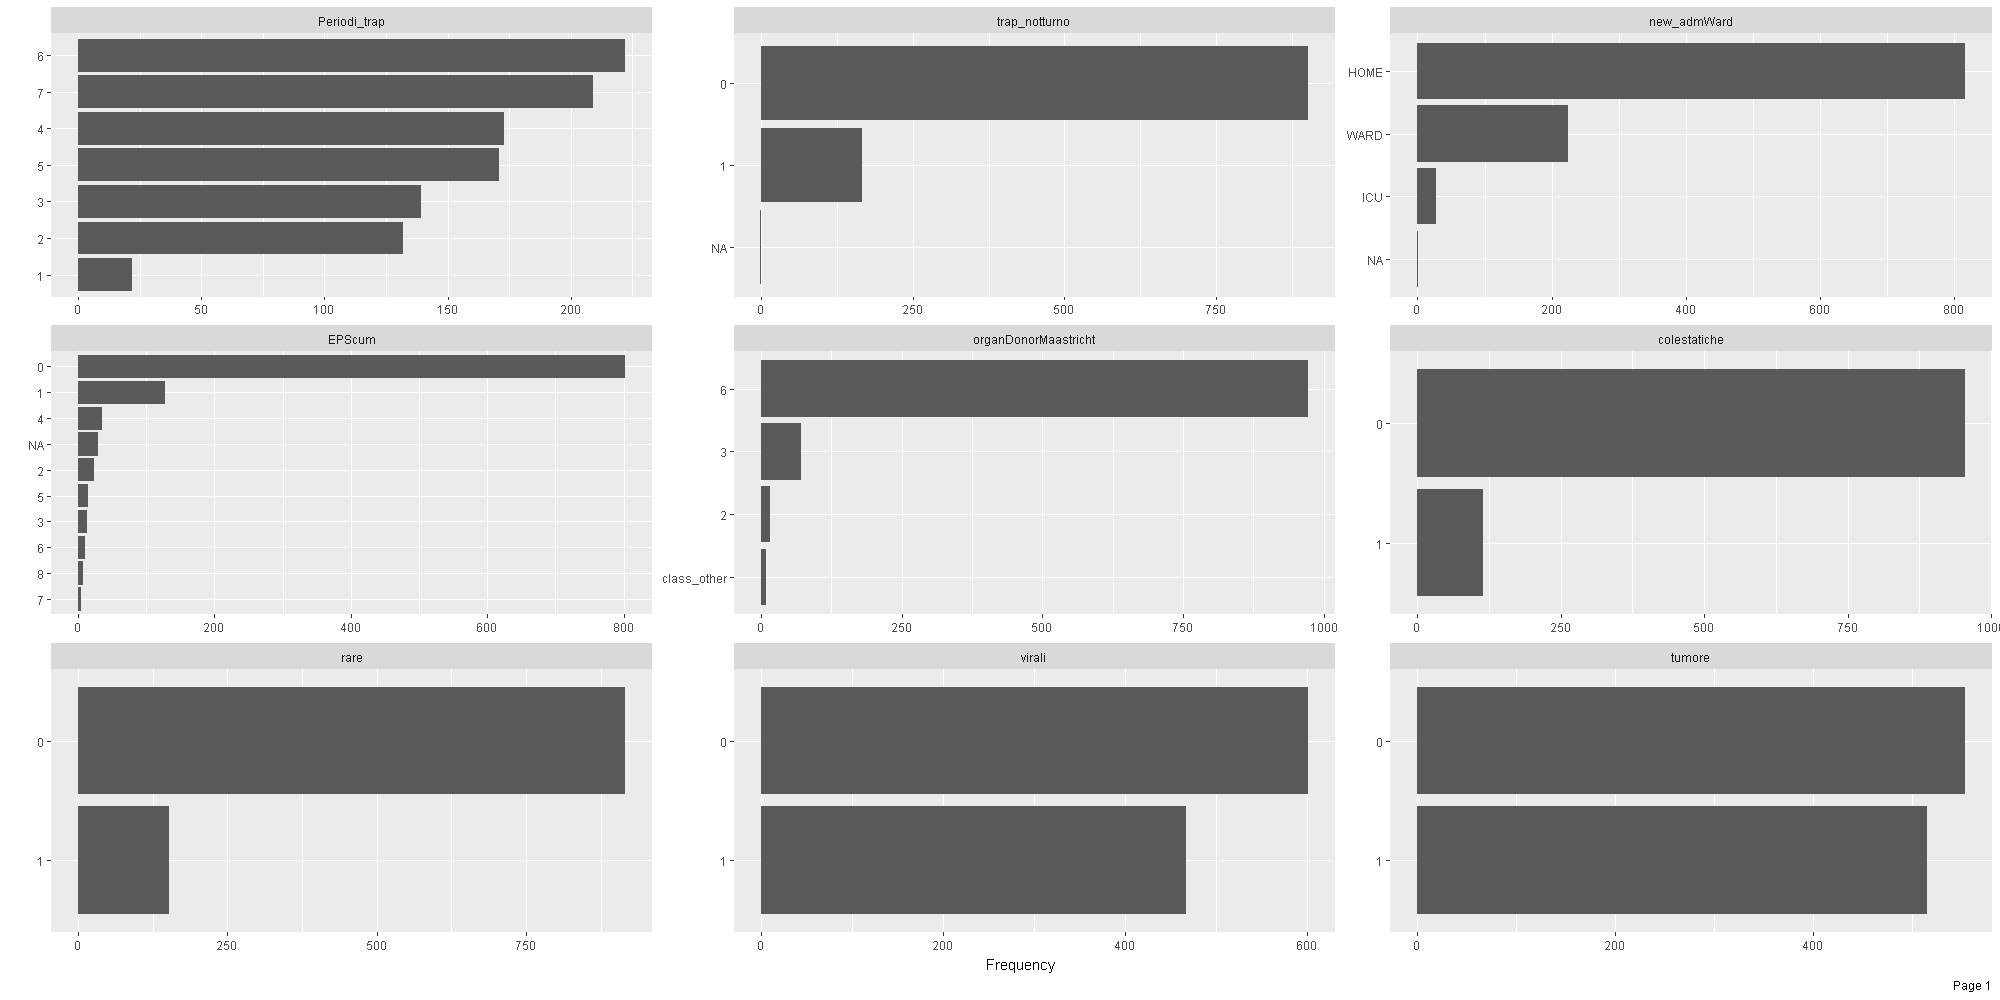

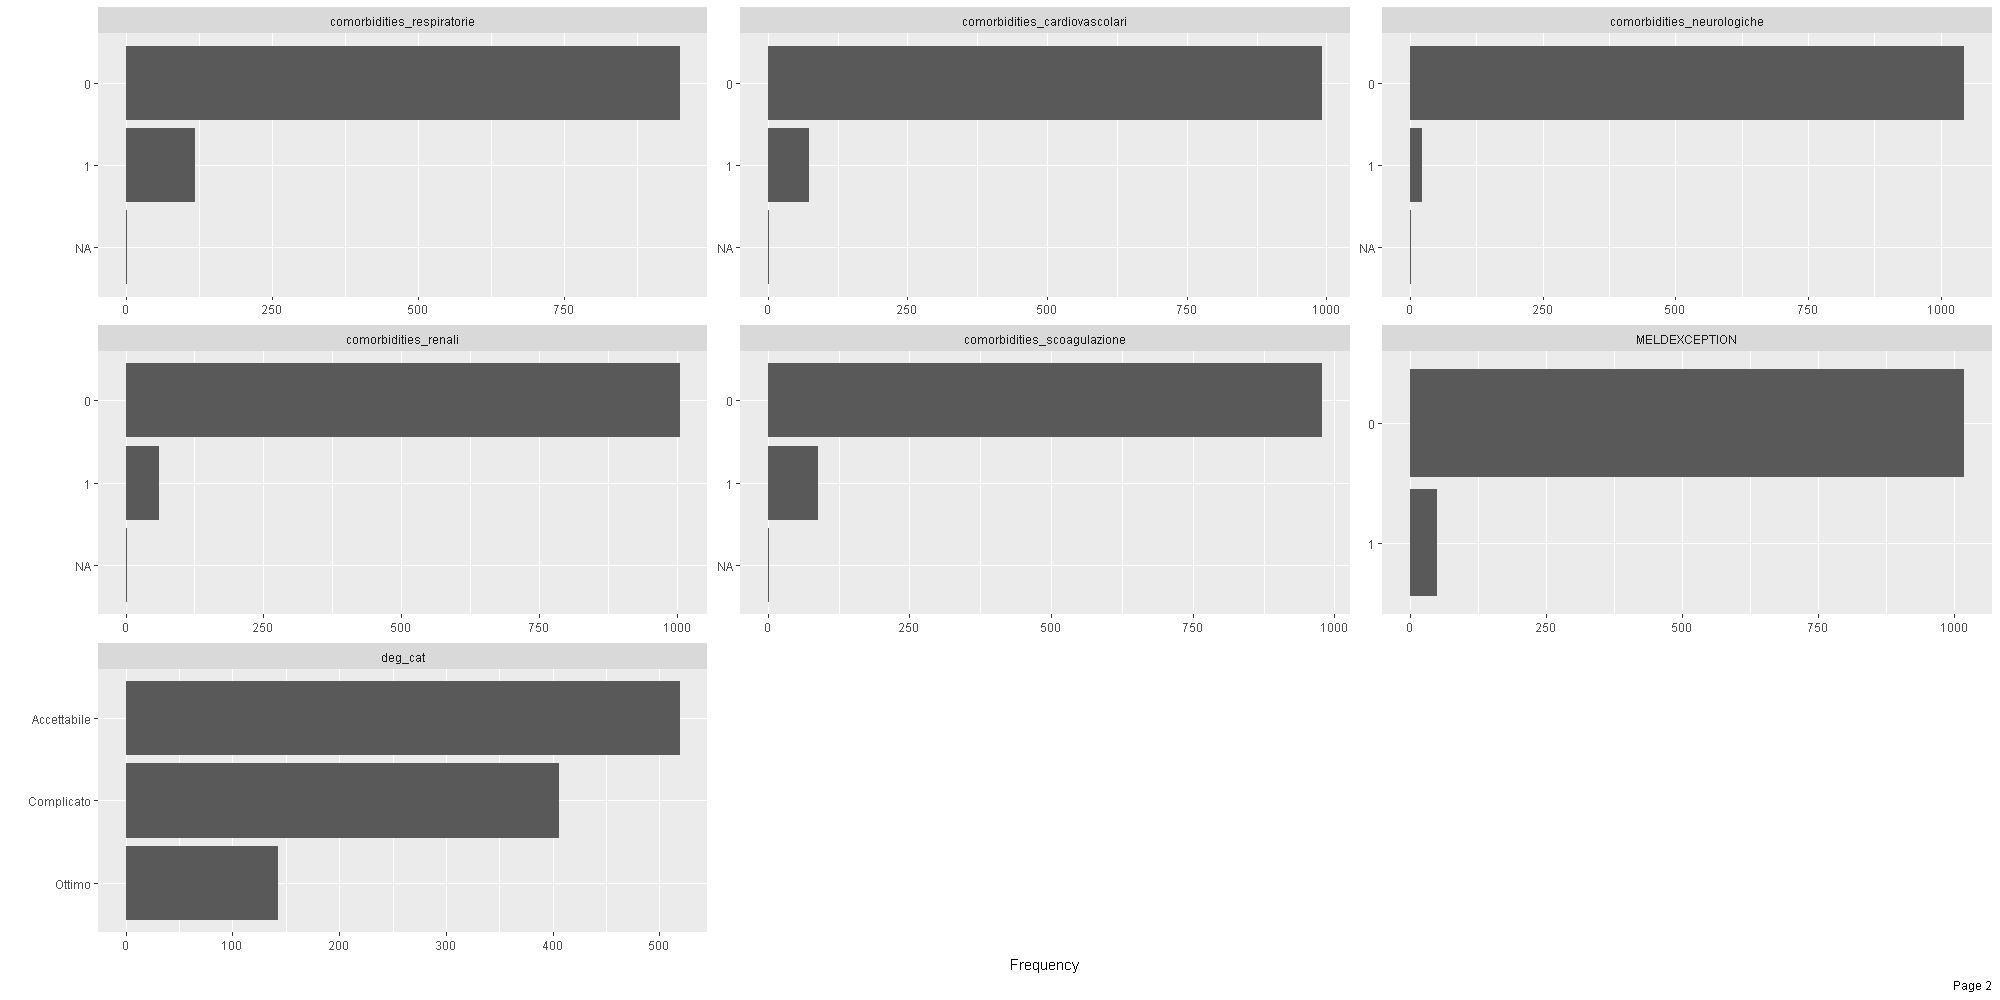

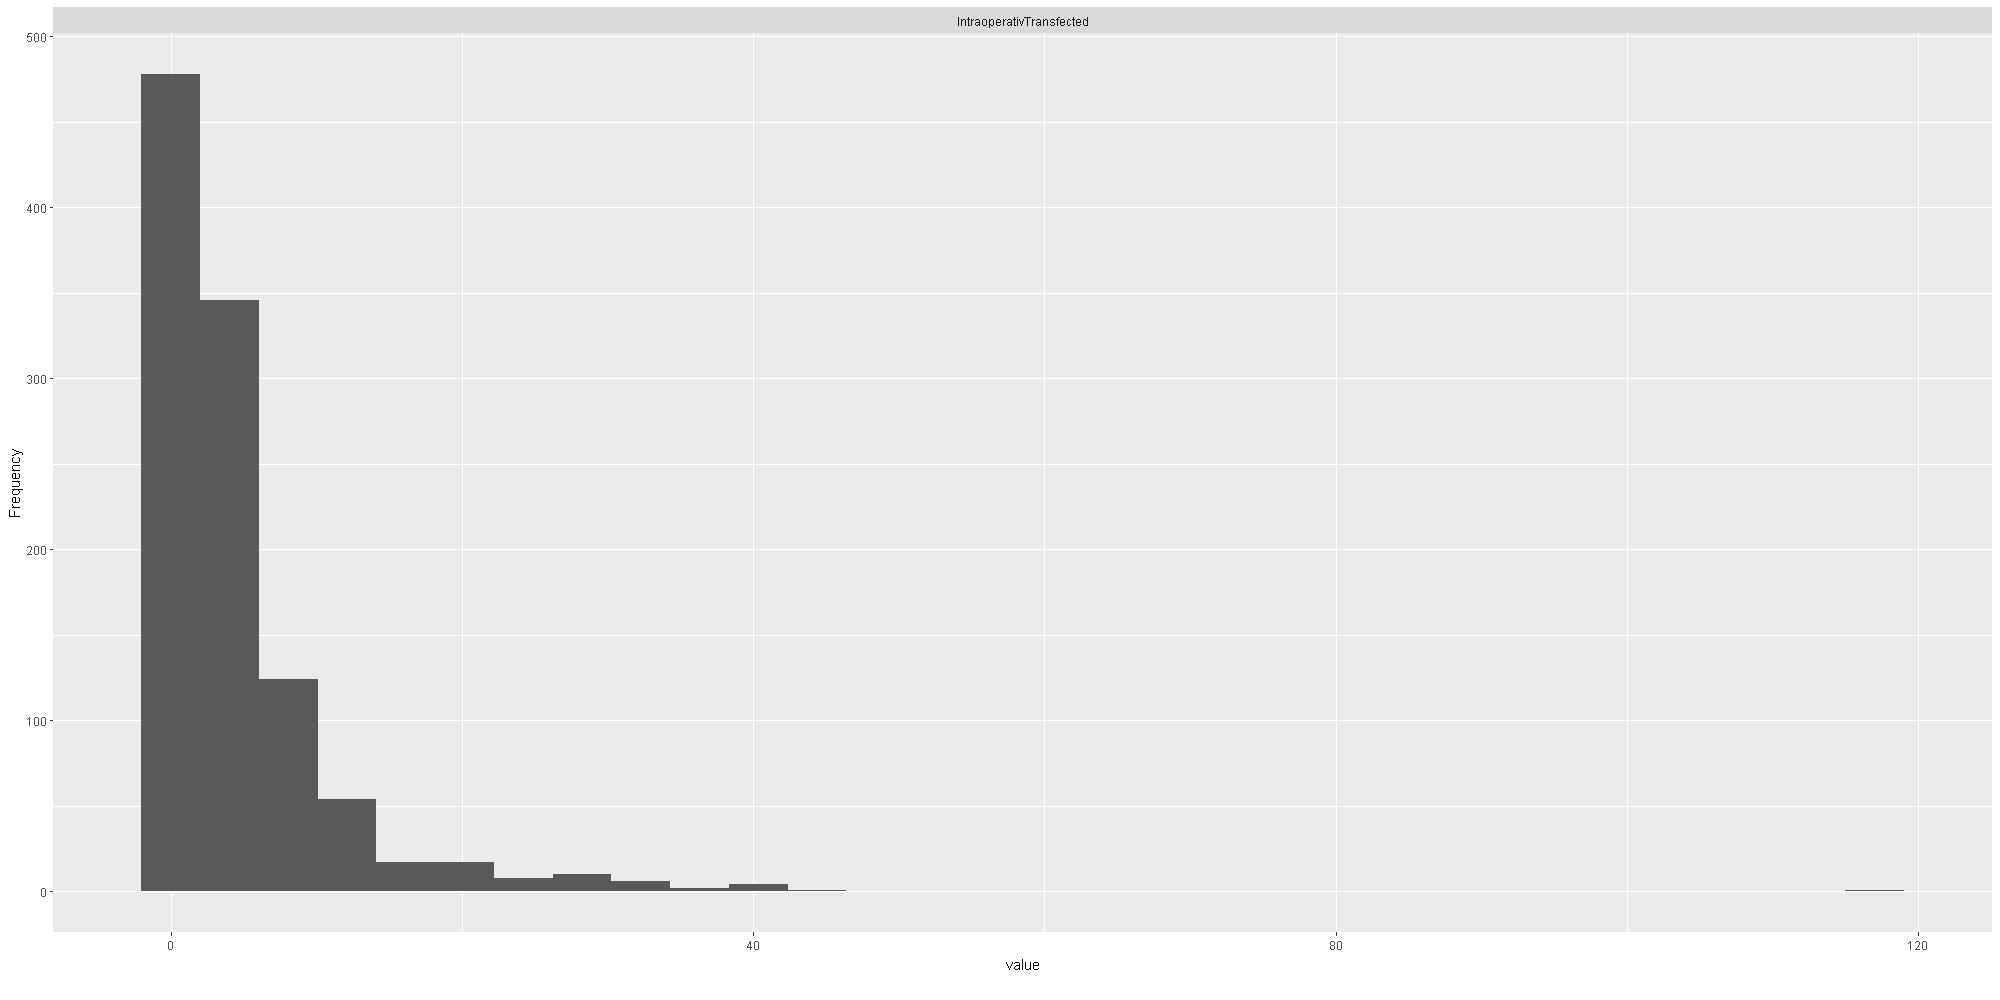

In [707]:
nuove_descrittiva <- subset(df, select= c(Periodi_trap,trap_notturno,new_admWard,EPScum,organDonorMaastricht,colestatiche,rare,virali,tumore,
comorbidities_respiratorie,comorbidities_cardiovascolari,comorbidities_neurologiche,comorbidities_renali,
comorbidities_scoagulazione,MELDEXCEPTION,deg_cat,IntraoperativTransfected))


plot_bar(data = nuove_descrittiva)

plot_histogram(data = nuove_descrittiva)

# Preprocessing

In [648]:
library(missForest)

df_imp <- missForest(df)       # fill NA

df <- df_imp$ximp

df_imp <- missForest(df)

df <- df_imp$ximp

In [649]:
preProc <- preProcess(df, method = c("center","scale","BoxCox","zv"))

df <- predict(preProc, df)

In [650]:
save(df, file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df.Rdata")

# FINE, DA QUI IN POI STO SISTEMANDO IN ALTRI NOTEBOOK

# Clustering

 1. run of importance source...

 2. run of importance source...

 3. run of importance source...

 4. run of importance source...

 5. run of importance source...

 6. run of importance source...

 7. run of importance source...

 8. run of importance source...

 9. run of importance source...

 10. run of importance source...

 11. run of importance source...

 12. run of importance source...

 13. run of importance source...

 14. run of importance source...

After 14 iterations, +50 secs: 

 confirmed 10 attributes: bilirubinaTotale, centreCode, degenzaPreTra, INR, intermedLactates and 5 more;

 rejected 55 attributes: admSource, age, albumInfusOver7Days, anastomTechnic, bileAnastomosis and 50 more;

 still have 29 attributes left.


 15. run of importance source...

 16. run of importance source...

 17. run of importance source...

 18. run of importance source...

After 18 iterations, +57 secs: 

 confirmed 1 attribute: abdomOpenEndSurg;

 rejected 6 attributes: genderClear, org

 [1] "centreCode"               "degenzaPreTra"           
 [3] "thrombosisDegreeWithNone" "bilirubinaTotale"        
 [5] "INR"                      "serumCreatinine"         
 [7] "ratioPaO2FiO2"            "platCountTranspl"        
 [9] "albumina"                 "surgeryDuration"         
[11] "IntraoperativTransfected" "plasmaFresco"            
[13] "plasmaPools"              "doseFibrinogen"          
[15] "concenCoagulFactors"      "CristalloidiComp"        
[17] "noradrenalineEndSurger"   "intermedLactates"        
[19] "syndromeReperfus"         "abdomOpenEndSurg"        
[21] "scoreCHILD"               "organDonorType"          
[23] "organDonorSampleTechnic"  "DRI"                     
[25] "new_admWard"              "EPScum"                  
[27] "comorbidities_renali"    


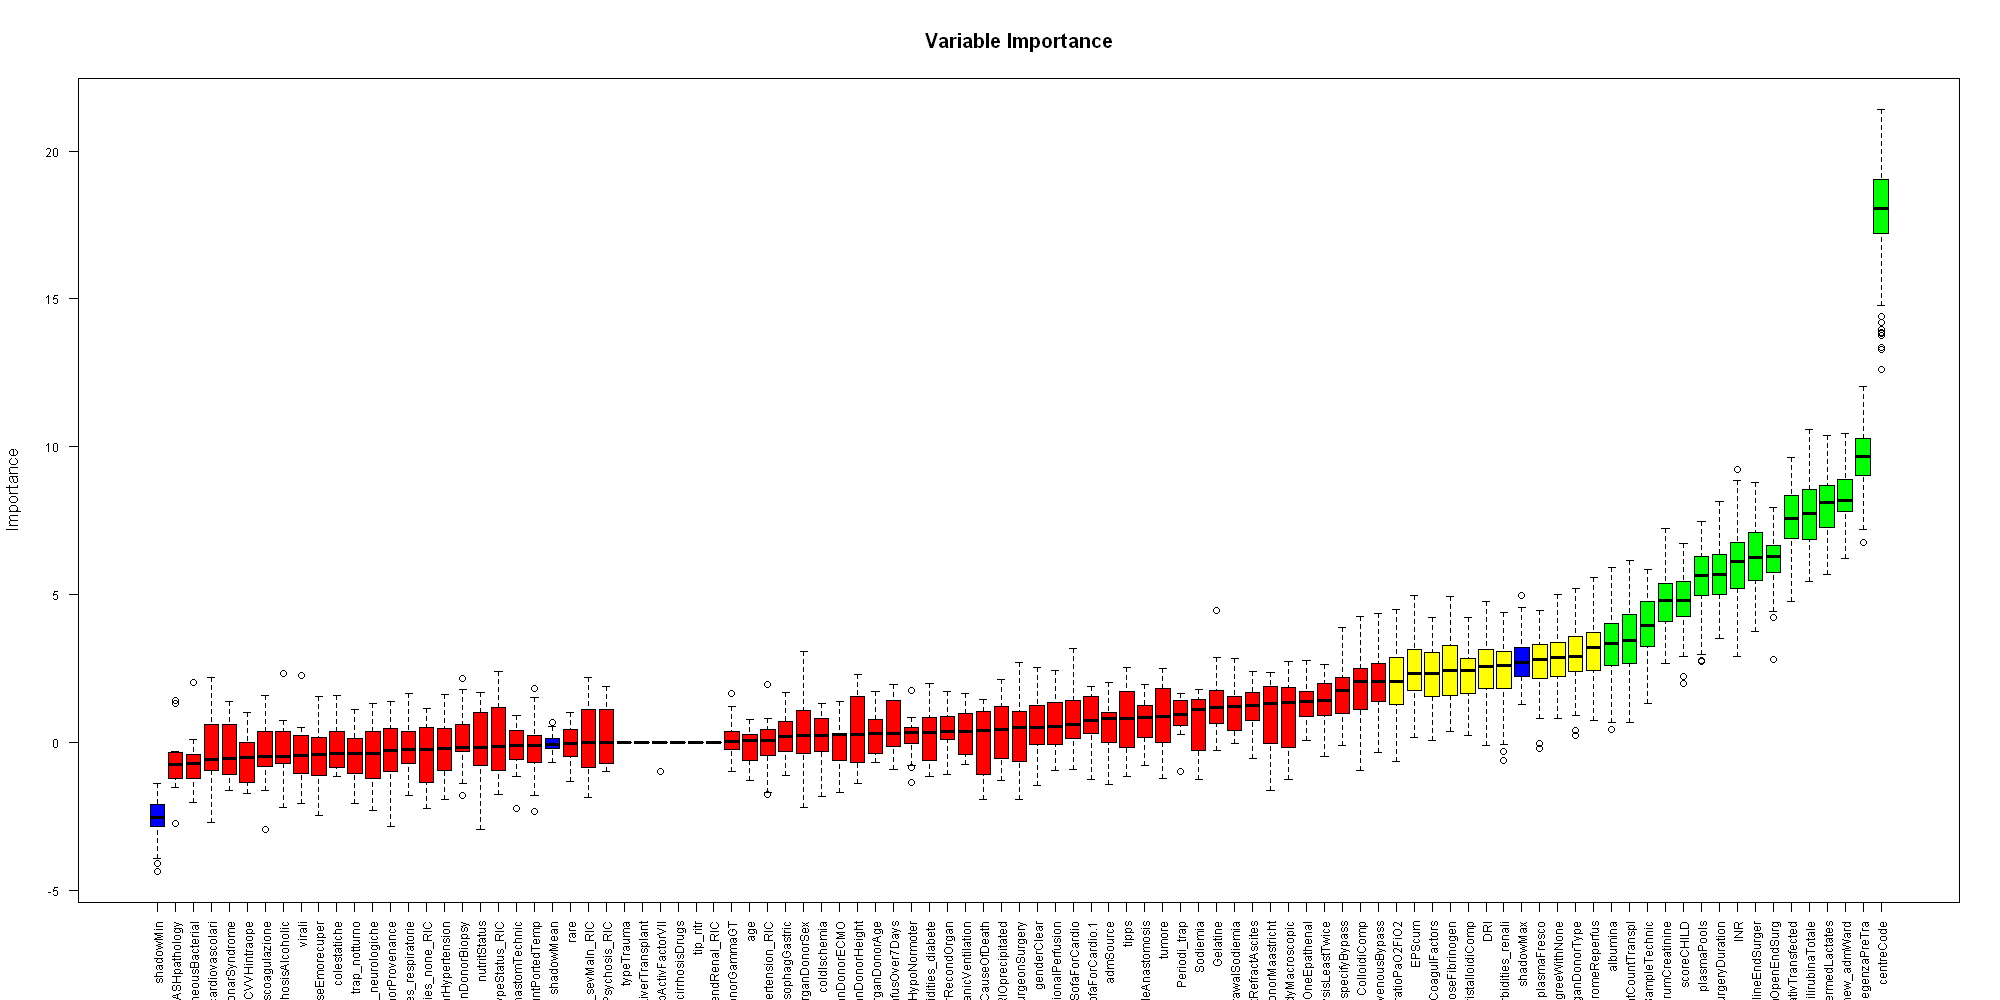

In [285]:
library(Boruta)

boruta_output <- Boruta(deg_cat ~ ., data=df, doTrace=2)  # perform Boruta search

boruta_signif <- names(boruta_output$finalDecision[boruta_output$finalDecision %in% c("Confirmed", "Tentative")])  # collect Confirmed and Tentative variables
print(boruta_signif)  # significant variables

plot(boruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance")  # plot variable importance

In [286]:
df_boruta <- df[,boruta_signif]
df_boruta$deg_cat <- df$deg_cat

df_boruta <- df_boruta %>% mutate_if(is.matrix,as.numeric) 

In [291]:
colnames(df_boruta)

[1] "centreCode"               "degenzaPreTra"           
 [3] "thrombosisDegreeWithNone" "bilirubinaTotale"        
 [5] "INR"                      "serumCreatinine"         
 [7] "ratioPaO2FiO2"            "platCountTranspl"        
 [9] "albumina"                 "surgeryDuration"         
[11] "IntraoperativTransfected" "plasmaFresco"            
[13] "plasmaPools"              "doseFibrinogen"          
[15] "concenCoagulFactors"      "CristalloidiComp"        
[17] "noradrenalineEndSurger"   "intermedLactates"        
[19] "syndromeReperfus"         "abdomOpenEndSurg"        
[21] "scoreCHILD"               "organDonorType"          
[23] "organDonorSampleTechnic"  "DRI"                     
[25] "new_admWard"              "EPScum"                  
[27] "comorbidities_renali"     "deg_cat"

In [287]:
save(df, file = "C:/Users/abonini/Desktop/Analysis/Sources/LIVERTRANSPLANT/Modello/df.Rdata")



In [834]:
df_boruta <- subset(df_boruta, select = -deg_cat)

In [844]:
library(cluster)

gower_dist <- daisy(df_boruta,
                    metric = "gower")

In [845]:
summary(gower_dist)

527878 dissimilarities, summarized :
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.009072 0.191840 0.248620 0.250880 0.310410 0.584580 
Metric :  mixed ;  Types = N, I, N, N, I, N, N, I, I, I, I, I, I, I, I, I, I, I, I, I, N, N, N, N, I, N, N, N, N, N, N 
Number of objects : 1028

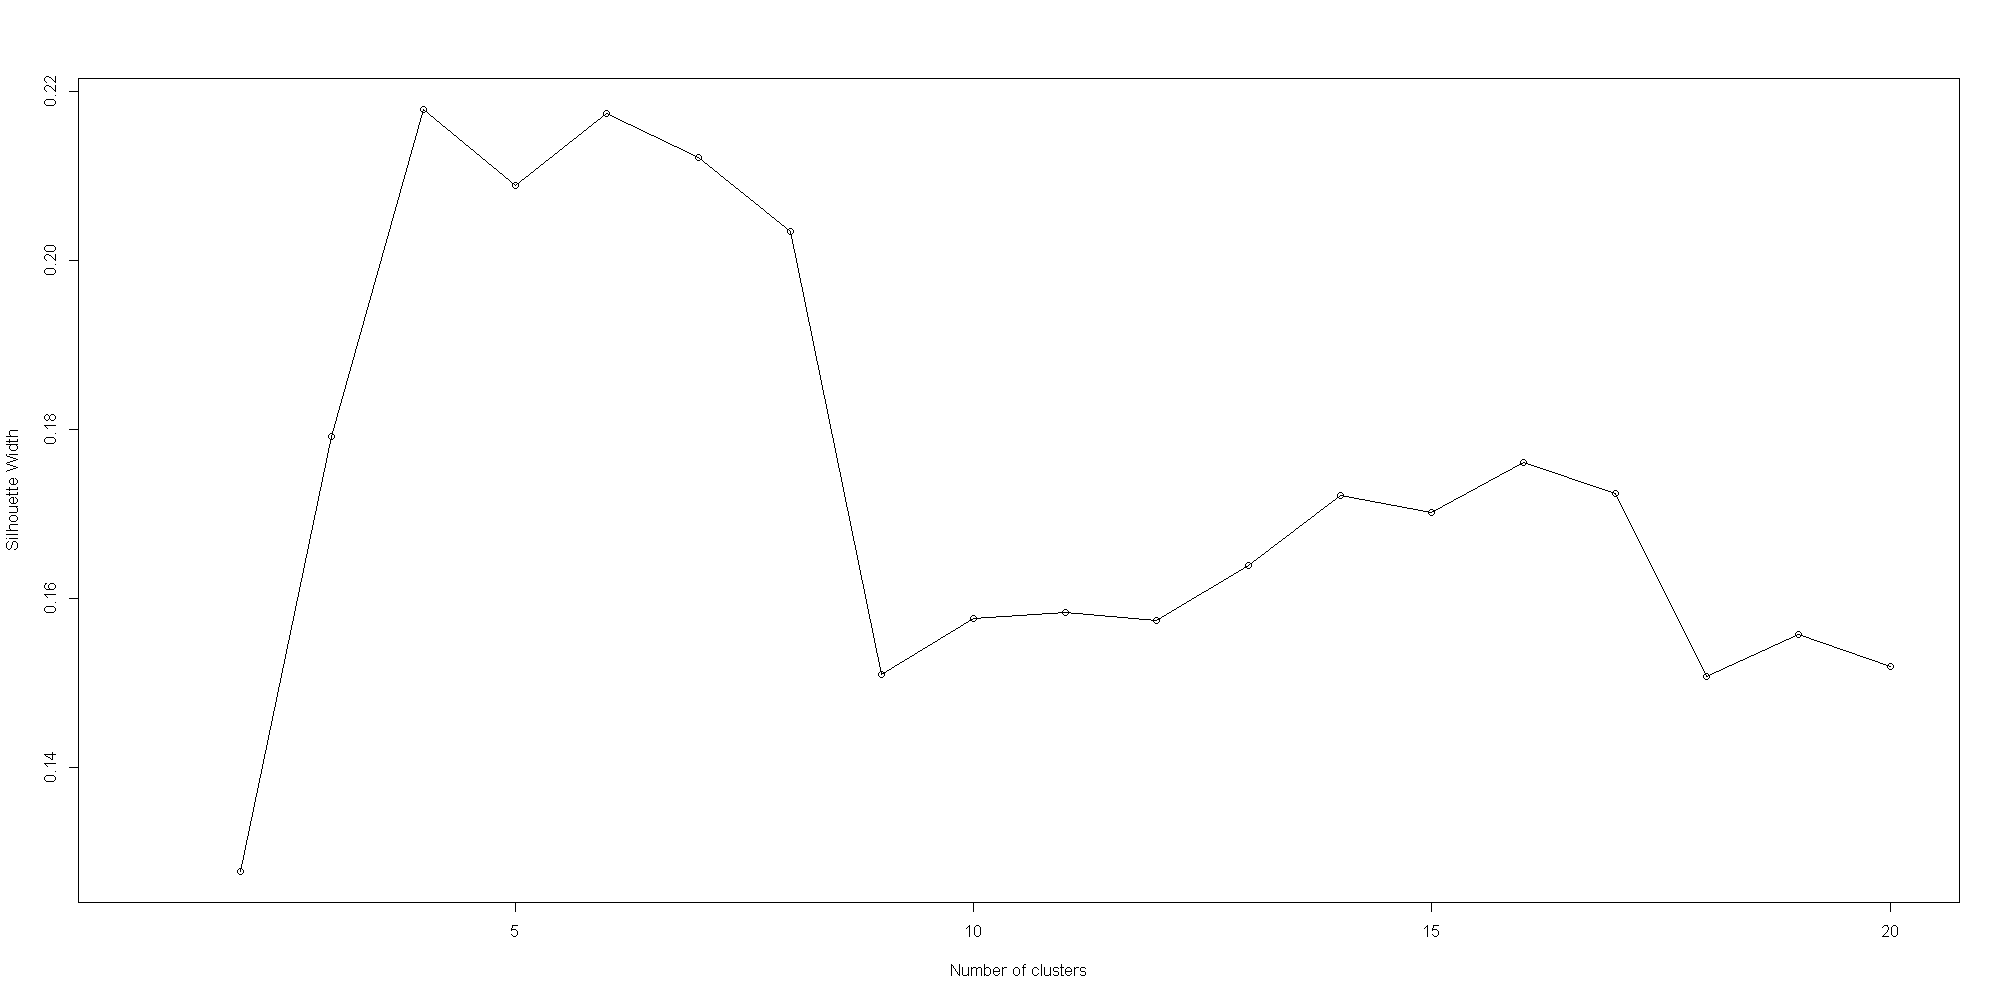

In [846]:
# Calculate silhouette width for many k using PAM
sil_width <- c(NA)
for(i in 2:20){
  
  pam_fit <- pam(gower_dist,
                 diss = TRUE,
                 k = i)
  
  sil_width[i] <- pam_fit$silinfo$avg.width
  
}
# Plot sihouette width (higher is better)
plot(1:20, sil_width,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:20, sil_width)

In [847]:
gower_mat <- as.matrix(gower_dist)

In [848]:

clusters <- pam(x = gower_mat, k = 6, diss = TRUE)

In [849]:
clusters$clustering[1:10]

5 15 16 18 19 22 23 24 25 26 
 1  1  1  1  1  2  3  4  4  3

In [ ]:
df_boruta$cluster <- clusters$clustering

In [226]:
library(ggplot2)
library(gridExtra)
library(knitr)

Warning message:
"package 'gridExtra' was built under R version 3.6.3"

Attaching package: 'gridExtra'


The following object is masked from 'package:randomForest':

    combine


The following object is masked from 'package:dplyr':

    combine




In [222]:
kmedians <- function(df, k, n_iter) {
  # define manhattan distance
  manhattan_distance <- function(x, y){
    return(sum(abs(x - y)))
  }
  
  # Initialize centers randomly
  centers <- df[sample(nrow(df), k), ]
  
  # Perform n_iter iterations
  for (iter in 1:n_iter) {
    # Calculate distances
    distances <- data.frame(matrix(NA, nrow = nrow(df), ncol = k))
    for (object_id in 1:nrow(df)) {
      for (center_id in 1:nrow(centers)) {
        # Use manhattan metric.
        distances[object_id, center_id] <- manhattan_distance(df[object_id, ], centers[center_id, ])
      }
    }
    
    # Assign each point to the closest center
    cluster_id <- apply(distances, 1, which.min)
    
    # Calculate new centers
    for (i in seq_len(k)) {
      this_cluster <- df[cluster_id == i,]
      # Calculate median instead of mean
      centers[k, ] <- apply(this_cluster, 2, median)
    }
  }
  return(cluster_id)
}

In [228]:
set.seed(42)
species <- df$deg_cat
kmeans_clusters <- kmeans(x = df_reg_feat, centers = 3, iter.max = 10, nstart = 1)$cluster
kmedians_clusters <- kmedians(df_reg_feat, k = 3, n_iter = 10)

p_ground_truth <- plot_clusters(df, species, "Ground truth")
p_kmeans <- plot_clusters(df, kmeans_clusters, "k-means")
p_kmedians <- plot_clusters(df, kmedians_clusters, "k-medians")
grid.arrange(p_ground_truth, p_kmedians, p_kmeans, ncol = 1)

ERROR: Error in FUN(X[[i]], ...): oggetto "Sepal.Length" non trovato


In [ ]:

kable(data.frame(observation = paste("point", 1:5), x = c(1, 2, 3, 4, 5), y = c(1, 2, 4, 3, 5)))

# Models

In [447]:
train <- sample_frac(df, 0.7)
sample_id <- as.numeric(rownames(train)) # rownames() returns character so as.numeric
test <- df[-sample_id,]


TrainClasses <- train$deg_cat
TrainData <- subset(train,select= -deg_cat)
TestClasses <- test$deg_cat
TestData <- subset(test,select= -deg_cat)

In [197]:
# with feature selection

trainF <- sample_frac(df_forest, 0.7)
sample_id <- as.numeric(rownames(train)) # rownames() returns character so as.numeric
testF <- df_forest[-sample_id,]


TrainClassesF <- trainF$deg_cat
TrainDataF <- subset(trainF,select= -deg_cat)
TestClassesF <- testF$deg_cat
TestDataF <- subset(testF,select= -deg_cat)

In [196]:
# with PCA

trainP <- sample_frac(df_pca, 0.7)
sample_id <- as.numeric(rownames(trainP)) # rownames() returns character so as.numeric
testP <- df_pca[-sample_id,]


TrainClassesF <- trainP$deg_cat
TrainDataF <- subset(trainP,select= -deg_cat)
TestClassesF <- testP$deg_cat
TestDataF <- subset(testP,select= -deg_cat)

ERROR: Error in sample_frac(df_pca, 0.7): oggetto "df_pca" non trovato


In [860]:
# with hot_encoding

trainH <- sample_frac(df_hot, 0.7)
sample_id <- as.numeric(rownames(trainH)) # rownames() returns character so as.numeric
testH <- df_hot[-sample_id,]


TrainClassesH <- trainH$deg_cat
TrainDataH <- subset(trainH,select= -deg_cat)
TestClassesH <- testH$deg_cat
TestDataH <- subset(testH,select= -deg_cat)

## Decision Tree

In [198]:
library(rpart)
library(rpart.plot)

train_control <- trainControl(method = "cv",
                              number = 10,
                             savePrediction="final",
                             classProbs=TRUE,verboseIter=TRUE,returnResamp="all")

rpart <- train(x=TrainData, y=TrainClasses, 
               method = "rpart",
               trControl = train_control)


Warning message:
"package 'rpart' was built under R version 3.6.2"


+ Fold01: cp=0.01966 
- Fold01: cp=0.01966 
+ Fold02: cp=0.01966 
- Fold02: cp=0.01966 
+ Fold03: cp=0.01966 
- Fold03: cp=0.01966 
+ Fold04: cp=0.01966 
- Fold04: cp=0.01966 
+ Fold05: cp=0.01966 
- Fold05: cp=0.01966 
+ Fold06: cp=0.01966 
- Fold06: cp=0.01966 
+ Fold07: cp=0.01966 
- Fold07: cp=0.01966 
+ Fold08: cp=0.01966 
- Fold08: cp=0.01966 
+ Fold09: cp=0.01966 
- Fold09: cp=0.01966 
+ Fold10: cp=0.01966 
- Fold10: cp=0.01966 
Aggregating results
Selecting tuning parameters
Fitting cp = 0.0197 on full training set


In [199]:
result <- confusionMatrix(TrainClasses,  predict(rpart)) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         276         66     22
  Complicato          130        129      8
  Ottimo               40          6     43

Overall Statistics
                                          
               Accuracy : 0.6222          
                 95% CI : (0.5857, 0.6578)
    No Information Rate : 0.6194          
    P-Value [Acc > NIR] : 0.4554          
                                          
                  Kappa : 0.3381          
                                          
 Mcnemar's Test P-Value : 7.828e-06       

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.6188            0.6418       0.58904
Specificity                      0.6788            0.7341       0.92890
Pos Pred Value                   0.7582            0.4831       0.48315
Neg Pred Value                   0.5225           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.6188341,0.6788321,0.7582418,0.5224719,0.7582418,0.6188341,0.6814815,0.6194444,0.38333333,0.5055556,0.6488331
Class: Complicato,0.6417910,0.7341040,0.4831461,0.8410596,0.4831461,0.6417910,0.5512821,0.2791667,0.17916667,0.3708333,0.6879475
Class: Ottimo,0.5890411,0.9289026,0.4831461,0.9524564,0.4831461,0.5890411,0.5308642,0.1013889,0.05972222,0.1236111,0.7589719


In [869]:
result <- confusionMatrix(TestClasses,  predict(rpart,TestData)) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         123         23      8
  Complicato           66         40      6
  Ottimo                7          1     34

Overall Statistics
                                          
               Accuracy : 0.6396          
                 95% CI : (0.5832, 0.6933)
    No Information Rate : 0.6364          
    P-Value [Acc > NIR] : 0.4785          
                                          
                  Kappa : 0.384           
                                          
 Mcnemar's Test P-Value : 2.048e-05       

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.6276            0.6250        0.7083
Specificity                      0.7232            0.7049        0.9692
Pos Pred Value                   0.7987            0.3571        0.8095
Neg Pred Value                   0.5260           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.6275510,0.7232143,0.7987013,0.5259740,0.7987013,0.6275510,0.7028571,0.6363636,0.3993506,0.5000000,0.6753827
Class: Complicato,0.6250000,0.7049180,0.3571429,0.8775510,0.3571429,0.6250000,0.4545455,0.2077922,0.1298701,0.3636364,0.6649590
Class: Ottimo,0.7083333,0.9692308,0.8095238,0.9473684,0.8095238,0.7083333,0.7555556,0.1558442,0.1103896,0.1363636,0.8387821


## Random forest

In [901]:
library(randomForest)

In [902]:


train_control <- trainControl(method = "cv",
                              number = 10,
                             savePrediction="final",
                             classProbs=TRUE,verboseIter=TRUE,returnResamp="all")

cforest <- train(x=TrainData, y=TrainClasses, 
               method = "cforest",
               trControl = train_control)


+ Fold01: mtry=  2 
- Fold01: mtry=  2 
+ Fold01: mtry= 55 
- Fold01: mtry= 55 
+ Fold01: mtry=108 
- Fold01: mtry=108 
+ Fold02: mtry=  2 
- Fold02: mtry=  2 
+ Fold02: mtry= 55 
- Fold02: mtry= 55 
+ Fold02: mtry=108 
- Fold02: mtry=108 
+ Fold03: mtry=  2 
- Fold03: mtry=  2 
+ Fold03: mtry= 55 
- Fold03: mtry= 55 
+ Fold03: mtry=108 
- Fold03: mtry=108 
+ Fold04: mtry=  2 
- Fold04: mtry=  2 
+ Fold04: mtry= 55 
- Fold04: mtry= 55 
+ Fold04: mtry=108 
- Fold04: mtry=108 
+ Fold05: mtry=  2 
- Fold05: mtry=  2 
+ Fold05: mtry= 55 
- Fold05: mtry= 55 
+ Fold05: mtry=108 
- Fold05: mtry=108 
+ Fold06: mtry=  2 
- Fold06: mtry=  2 
+ Fold06: mtry= 55 
- Fold06: mtry= 55 
+ Fold06: mtry=108 
- Fold06: mtry=108 
+ Fold07: mtry=  2 
- Fold07: mtry=  2 
+ Fold07: mtry= 55 
- Fold07: mtry= 55 
+ Fold07: mtry=108 
- Fold07: mtry=108 
+ Fold08: mtry=  2 
- Fold08: mtry=  2 
+ Fold08: mtry= 55 
- Fold08: mtry= 55 
+ Fold08: mtry=108 
- Fold08: mtry=108 
+ Fold09: mtry=  2 
- Fold09: mtry=  2 


In [905]:
result <- confusionMatrix(TrainClasses,  predict(cforest)) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         344          7      2
  Complicato           46        215      7
  Ottimo               32          2     65

Overall Statistics
                                          
               Accuracy : 0.8667          
                 95% CI : (0.8396, 0.8906)
    No Information Rate : 0.5861          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7712          
                                          
 Mcnemar's Test P-Value : 1.614e-12       

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.8152            0.9598       0.87838
Specificity                      0.9698            0.8931       0.94737
Pos Pred Value                   0.9745            0.8022       0.65657
Neg Pred Value                   0.7875           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.8151659,0.9697987,0.9745042,0.7874659,0.9745042,0.8151659,0.8877419,0.5861111,0.47777778,0.4902778,0.8924823
Class: Complicato,0.9598214,0.8931452,0.8022388,0.9800885,0.8022388,0.9598214,0.8739837,0.3111111,0.29861111,0.3722222,0.9264833
Class: Ottimo,0.8783784,0.9473684,0.6565657,0.9855072,0.6565657,0.8783784,0.7514451,0.1027778,0.09027778,0.1375000,0.9128734


In [290]:
colnames(df)

[1] "centreCode"                        "genderClear"                      
 [3] "age"                               "degenzaPreTra"                    
 [5] "admSource"                         "typeTrauma"                       
 [7] "typeStatus_RIC"                    "pulmonarHypertension"             
 [9] "epatopulmonarSyndrome"             "BleedingEsophagGastric"           
[11] "prevLiverTransplant"               "presentRefractAscites"            
[13] "tipps"                             "leastOneEpathenal"                
[15] "leastOneSpontaneousBacterial"      "thrombosisDegreeWithNone"         
[17] "nutritStatus"                      "surgeonSurgery"                   
[19] "dialysisLeastTwice"                "mechanicVentilation"              
[21] "clifSofaForCardio"                 "albumInfusOver7Days"              
[23] "bilirubinaTotale"                  "INR"                              
[25] "serumCreatinine"                   "Sodiemia"                         
[27] "ratioPaO2FiO2"                     "platCountTranspl"                 
[29] "albumina"                          "surgeryDuration"                  
[31] "IntraoperativTransfected"          "plasmaFresco"                     
[33] "plasmaPools"                       "doseFibrinogen"                   
[35] "CRIOprecipitated"                  "concenCoagulFactors"              
[37] "recombActivFactorVII"              "useEmorecuper"                    
[39] "CristalloidiComp"                  "ColloidiComp"                     
[41] "Gelatine"                          "noradrenalineEndSurger"           
[43] "intermedLactates"                  "coldIschemia"                     
[45] "syndromeReperfus"                  "shuntPortedTemp"                  
[47] "anastomTechnic"                    "dialysisCVVHintraope"             
[49] "venousBypass"                      "bileAnastomosis"                  
[51] "abdomOpenEndSurg"                  "scoreCHILD"                       
[53] "clifSofaForCardio.1"               "organDonorSex"                    
[55] "organDonorType"                    "organDonorSampleTechnic"          
[57] "organDonorECMO"                    "regionalPerfusion"                
[59] "organDonorBiopsy"                  "organDonorRecondOrgan"            
[61] "organDonorProvenance"              "organDonorCauseOfDeath"           
[63] "organDonorAge"                     "organDonorHeight"                 
[65] "organDonorDrawalSodiemia"          "organDonorGammaGT"                
[67] "DRI"                               "liverDisords_cirrhosisAlcoholic"  
[69] "liverDisords_cirrhosisDrugs"       "liverDisords_NASHpathology"       
[71] "tip_ritr"                          "specifyBypass"                    
[73] "organDonorMaastricht"              "organDonorSteadyMacroscopic"      
[75] "organDonorRecondHypoNormoter"      "comorbidities_none_RIC"           
[77] "comorbidities_hypertension_RIC"    "comorbidities_endRenal_RIC"       
[79] "comorbidities_sevMaln_RIC"         "comorbidities_severePsychosis_RIC"
[81] "Periodi_trap"                      "trap_notturno"                    
[83] "new_admWard"                       "EPScum"                           
[85] "colestatiche"                      "rare"                             
[87] "virali"                            "tumore"                           
[89] "comorbidities_respiratorie"        "comorbidities_cardiovascolari"    
[91] "comorbidities_neurologiche"        "comorbidities_renali"             
[93] "comorbidities_diabete"             "comorbidities_scoagulazione"      
[95] "deg_cat"

In [906]:
result <- confusionMatrix(TestClasses,  predict(cforest,TestData)) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         143          7      4
  Complicato           32         77      3
  Ottimo               10          1     31

Overall Statistics
                                         
               Accuracy : 0.8149         
                 95% CI : (0.767, 0.8567)
    No Information Rate : 0.6006         
    P-Value [Acc > NIR] : 5.329e-16      
                                         
                  Kappa : 0.6823         
                                         
 Mcnemar's Test P-Value : 0.0002057      

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.7730            0.9059        0.8158
Specificity                      0.9106            0.8430        0.9593
Pos Pred Value                   0.9286            0.6875        0.7381
Neg Pred Value                   0.7273            0.9592  

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.7729730,0.9105691,0.9285714,0.7272727,0.9285714,0.7729730,0.8436578,0.6006494,0.4642857,0.5000000,0.8417710
Class: Complicato,0.9058824,0.8430493,0.6875000,0.9591837,0.6875000,0.9058824,0.7817259,0.2759740,0.2500000,0.3636364,0.8744658
Class: Ottimo,0.8157895,0.9592593,0.7380952,0.9736842,0.7380952,0.8157895,0.7750000,0.1233766,0.1006494,0.1363636,0.8875244


Boosted classification tree

In [279]:


train_control <- trainControl(method = "cv",
                              number = 10,
                             savePrediction="final",
                             classProbs=TRUE,verboseIter=TRUE,returnResamp="all")

ada <- train(x=TrainData, y=TrainClasses, 
               method = "ada",
               trControl = train_control)

In [ ]:
result <- confusionMatrix(TrainClasses,  predict(ada)) 
result
result$byClass

In [ ]:
result <- confusionMatrix(TestClasses,  predict(ada,TestData)) 
result
result$byClass

## Naive Bayes

In [873]:
train_control <- trainControl(method = "cv",
                              number = 10,
                             savePrediction="final",
                             classProbs=TRUE,verboseIter=TRUE,returnResamp="all")

naive_bayes <- train(x=TrainData, y=TrainClasses, 
               method = "naive_bayes",laplace = 0.5
               trControl = train_control)

+ Fold01: usekernel= TRUE, laplace=0, adjust=1 
model fit failed for Fold01: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold01: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold01: usekernel= TRUE, laplace=0, adjust=1 
+ Fold01: usekernel=FALSE, laplace=0, adjust=1 
model fit failed for Fold01: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold01: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold01: usekernel=FALSE, laplace=0, adjust=1 
+ Fold02: usekernel= TRUE, laplace=0, adjust=1 
model fit failed for Fold02: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold02: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold02: usekernel= TRUE, laplace=0, adjust=1 
+ Fold02: usekernel=FALSE, laplace=0, adjust=1 
model fit failed for Fold02: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold02: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold02: usekernel=FALSE, laplace=0, adjust=1 
+ Fold03: usekernel= TRUE, laplace=0, adjust=1 
model fit failed for Fold03: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold03: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold03: usekernel= TRUE, laplace=0, adjust=1 
+ Fold03: usekernel=FALSE, laplace=0, adjust=1 
model fit failed for Fold03: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold03: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold03: usekernel=FALSE, laplace=0, adjust=1 
+ Fold04: usekernel= TRUE, laplace=0, adjust=1 
model fit failed for Fold04: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold04: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold04: usekernel= TRUE, laplace=0, adjust=1 
+ Fold04: usekernel=FALSE, laplace=0, adjust=1 
model fit failed for Fold04: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold04: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold04: usekernel=FALSE, laplace=0, adjust=1 
+ Fold05: usekernel= TRUE, laplace=0, adjust=1 
model fit failed for Fold05: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold05: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold05: usekernel= TRUE, laplace=0, adjust=1 
+ Fold05: usekernel=FALSE, laplace=0, adjust=1 
model fit failed for Fold05: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold05: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold05: usekernel=FALSE, laplace=0, adjust=1 
+ Fold06: usekernel= TRUE, laplace=0, adjust=1 
model fit failed for Fold06: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold06: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold06: usekernel= TRUE, laplace=0, adjust=1 
+ Fold06: usekernel=FALSE, laplace=0, adjust=1 
model fit failed for Fold06: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold06: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold06: usekernel=FALSE, laplace=0, adjust=1 
+ Fold07: usekernel= TRUE, laplace=0, adjust=1 
model fit failed for Fold07: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold07: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold07: usekernel= TRUE, laplace=0, adjust=1 
+ Fold07: usekernel=FALSE, laplace=0, adjust=1 
model fit failed for Fold07: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold07: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold07: usekernel=FALSE, laplace=0, adjust=1 
+ Fold08: usekernel= TRUE, laplace=0, adjust=1 
model fit failed for Fold08: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold08: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold08: usekernel= TRUE, laplace=0, adjust=1 
+ Fold08: usekernel=FALSE, laplace=0, adjust=1 
model fit failed for Fold08: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold08: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold08: usekernel=FALSE, laplace=0, adjust=1 
+ Fold09: usekernel= TRUE, laplace=0, adjust=1 
model fit failed for Fold09: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold09: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold09: usekernel= TRUE, laplace=0, adjust=1 
+ Fold09: usekernel=FALSE, laplace=0, adjust=1 
model fit failed for Fold09: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold09: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold09: usekernel=FALSE, laplace=0, adjust=1 
+ Fold10: usekernel= TRUE, laplace=0, adjust=1 
model fit failed for Fold10: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold10: usekernel= TRUE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = TRUE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold10: usekernel= TRUE, laplace=0, adjust=1 
+ Fold10: usekernel=FALSE, laplace=0, adjust=1 
model fit failed for Fold10: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
 


Warning message:
"model fit failed for Fold10: usekernel=FALSE, laplace=0, adjust=1 Error in naive_bayes.default(x, y, usekernel = FALSE, laplace = param$laplace,  : 
  l'argumento formale "laplace" è associato a diversi argomenti passati
"


- Fold10: usekernel=FALSE, laplace=0, adjust=1 


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Aggregating results
Something is wrong; all the Accuracy metric values are missing:
    Accuracy       Kappa    
 Min.   : NA   Min.   : NA  
 1st Qu.: NA   1st Qu.: NA  
 Median : NA   Median : NA  
 Mean   :NaN   Mean   :NaN  
 3rd Qu.: NA   3rd Qu.: NA  
 Max.   : NA   Max.   : NA  
 NA's   :2     NA's   :2    


ERROR: Error: Stopping


In [563]:
result <- confusionMatrix(TrainClasses,  predict(naive_bayes)) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         243         28     89
  Complicato          100        137     29
  Ottimo               15          1     78

Overall Statistics
                                          
               Accuracy : 0.6361          
                 95% CI : (0.5998, 0.6713)
    No Information Rate : 0.4972          
    P-Value [Acc > NIR] : 4.319e-14       
                                          
                  Kappa : 0.423           
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.6788            0.8253        0.3980
Specificity                      0.6768            0.7671        0.9695
Pos Pred Value                   0.6750            0.5150        0.8298
Neg Pred Value                   0.6806           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.6787709,0.6767956,0.6750000,0.6805556,0.6750000,0.6787709,0.6768802,0.4972222,0.3375000,0.5000000,0.6777833
Class: Complicato,0.8253012,0.7671480,0.5150376,0.9361233,0.5150376,0.8253012,0.6342593,0.2305556,0.1902778,0.3694444,0.7962246
Class: Ottimo,0.3979592,0.9694656,0.8297872,0.8115016,0.8297872,0.3979592,0.5379310,0.2722222,0.1083333,0.1305556,0.6837124


In [564]:
result <- confusionMatrix(TestClasses,  predict(naive_bayes,TestData)) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         102         11     41
  Complicato           55         44     13
  Ottimo                4          0     38

Overall Statistics
                                          
               Accuracy : 0.5974          
                 95% CI : (0.5403, 0.6526)
    No Information Rate : 0.5227          
    P-Value [Acc > NIR] : 0.005003        
                                          
                  Kappa : 0.364           
                                          
 Mcnemar's Test P-Value : 1.097e-15       

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.6335            0.8000        0.4130
Specificity                      0.6463            0.7312        0.9815
Pos Pred Value                   0.6623            0.3929        0.9048
Neg Pred Value                   0.6169           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.6335404,0.6462585,0.6623377,0.6168831,0.6623377,0.6335404,0.6476190,0.5227273,0.3311688,0.5000000,0.6398994
Class: Complicato,0.8000000,0.7312253,0.3928571,0.9438776,0.3928571,0.8000000,0.5269461,0.1785714,0.1428571,0.3636364,0.7656126
Class: Ottimo,0.4130435,0.9814815,0.9047619,0.7969925,0.9047619,0.4130435,0.5671642,0.2987013,0.1233766,0.1363636,0.6972625


# KNN

In [200]:
train_control <- trainControl(method = "cv",
                              number = 10,
                             savePrediction="final",
                             classProbs=TRUE,verboseIter=TRUE,returnResamp="all")

knn <- train(x=TrainData, y=TrainClasses, 
               method = "kknn",
               trControl = train_control)

+ Fold01: kmax=5, distance=2, kernel=optimal 
- Fold01: kmax=5, distance=2, kernel=optimal 
+ Fold01: kmax=7, distance=2, kernel=optimal 
- Fold01: kmax=7, distance=2, kernel=optimal 
+ Fold01: kmax=9, distance=2, kernel=optimal 
- Fold01: kmax=9, distance=2, kernel=optimal 
+ Fold02: kmax=5, distance=2, kernel=optimal 
- Fold02: kmax=5, distance=2, kernel=optimal 
+ Fold02: kmax=7, distance=2, kernel=optimal 
- Fold02: kmax=7, distance=2, kernel=optimal 
+ Fold02: kmax=9, distance=2, kernel=optimal 
- Fold02: kmax=9, distance=2, kernel=optimal 
+ Fold03: kmax=5, distance=2, kernel=optimal 
- Fold03: kmax=5, distance=2, kernel=optimal 
+ Fold03: kmax=7, distance=2, kernel=optimal 
- Fold03: kmax=7, distance=2, kernel=optimal 
+ Fold03: kmax=9, distance=2, kernel=optimal 
- Fold03: kmax=9, distance=2, kernel=optimal 
+ Fold04: kmax=5, distance=2, kernel=optimal 
- Fold04: kmax=5, distance=2, kernel=optimal 
+ Fold04: kmax=7, distance=2, kernel=optimal 
- Fold04: kmax=7, distance=2, kern

In [201]:
result <- confusionMatrix(TrainClasses,  predict(knn)) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         348         10      6
  Complicato           70        193      4
  Ottimo               19          4     66

Overall Statistics
                                          
               Accuracy : 0.8431          
                 95% CI : (0.8144, 0.8689)
    No Information Rate : 0.6069          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7263          
                                          
 Mcnemar's Test P-Value : 3.369e-11       

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.7963            0.9324       0.86842
Specificity                      0.9435            0.8558       0.96429
Pos Pred Value                   0.9560            0.7228       0.74157
Neg Pred Value                   0.7500           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.7963387,0.9434629,0.9560440,0.7500000,0.9560440,0.7963387,0.8689139,0.6069444,0.48333333,0.5055556,0.8699008
Class: Complicato,0.9323671,0.8557505,0.7228464,0.9690949,0.7228464,0.9323671,0.8143460,0.2875000,0.26805556,0.3708333,0.8940588
Class: Ottimo,0.8684211,0.9642857,0.7415730,0.9841521,0.7415730,0.8684211,0.8000000,0.1055556,0.09166667,0.1236111,0.9163534


In [202]:
result <- confusionMatrix(TestClasses,  predict(knn,TestData)) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         137         10      7
  Complicato           41         69      2
  Ottimo               18          4     20

Overall Statistics
                                          
               Accuracy : 0.7338          
                 95% CI : (0.6807, 0.7823)
    No Information Rate : 0.6364          
    P-Value [Acc > NIR] : 0.0001784       
                                          
                  Kappa : 0.5337          
                                          
 Mcnemar's Test P-Value : 2.111e-05       

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.6990            0.8313       0.68966
Specificity                      0.8482            0.8089       0.92115
Pos Pred Value                   0.8896            0.6161       0.47619
Neg Pred Value                   0.6169           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.6989796,0.8482143,0.8896104,0.6168831,0.8896104,0.6989796,0.7828571,0.63636364,0.44480519,0.5000000,0.7735969
Class: Complicato,0.8313253,0.8088889,0.6160714,0.9285714,0.6160714,0.8313253,0.7076923,0.26948052,0.22402597,0.3636364,0.8201071
Class: Ottimo,0.6896552,0.9211470,0.4761905,0.9661654,0.4761905,0.6896552,0.5633803,0.09415584,0.06493506,0.1363636,0.8054011


## SVM

In [877]:
train_control <- trainControl(method = "cv",
                              number = 10,
                             savePrediction="final",verboseIter=TRUE,returnResamp="all")

svm <- train(x=TrainDataH, y=TrainClassesH, 
               method = "svmLinear3",
               trControl = train_control)

+ Fold01: cost=0.25, Loss=L1 
- Fold01: cost=0.25, Loss=L1 
+ Fold01: cost=0.50, Loss=L1 
- Fold01: cost=0.50, Loss=L1 
+ Fold01: cost=1.00, Loss=L1 
- Fold01: cost=1.00, Loss=L1 
+ Fold01: cost=0.25, Loss=L2 
- Fold01: cost=0.25, Loss=L2 
+ Fold01: cost=0.50, Loss=L2 
- Fold01: cost=0.50, Loss=L2 
+ Fold01: cost=1.00, Loss=L2 
- Fold01: cost=1.00, Loss=L2 
+ Fold02: cost=0.25, Loss=L1 
- Fold02: cost=0.25, Loss=L1 
+ Fold02: cost=0.50, Loss=L1 
- Fold02: cost=0.50, Loss=L1 
+ Fold02: cost=1.00, Loss=L1 
- Fold02: cost=1.00, Loss=L1 
+ Fold02: cost=0.25, Loss=L2 
- Fold02: cost=0.25, Loss=L2 
+ Fold02: cost=0.50, Loss=L2 
- Fold02: cost=0.50, Loss=L2 
+ Fold02: cost=1.00, Loss=L2 
- Fold02: cost=1.00, Loss=L2 
+ Fold03: cost=0.25, Loss=L1 
- Fold03: cost=0.25, Loss=L1 
+ Fold03: cost=0.50, Loss=L1 
- Fold03: cost=0.50, Loss=L1 
+ Fold03: cost=1.00, Loss=L1 
- Fold03: cost=1.00, Loss=L1 
+ Fold03: cost=0.25, Loss=L2 
- Fold03: cost=0.25, Loss=L2 
+ Fold03: cost=0.50, Loss=L2 
- Fold03: 

In [878]:
result <- confusionMatrix(TrainClassesH,  predict(svm)) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         300         41     18
  Complicato           69        191      4
  Ottimo               38          3     56

Overall Statistics
                                          
               Accuracy : 0.7597          
                 95% CI : (0.7268, 0.7905)
    No Information Rate : 0.5653          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5885          
                                          
 Mcnemar's Test P-Value : 0.002394        

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.7371            0.8128       0.71795
Specificity                      0.8115            0.8495       0.93614
Pos Pred Value                   0.8357            0.7235       0.57732
Neg Pred Value                   0.7036           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.7371007,0.8115016,0.8356546,0.7036011,0.8356546,0.7371007,0.7832898,0.5652778,0.41666667,0.4986111,0.7743012
Class: Complicato,0.8127660,0.8494845,0.7234848,0.9035088,0.7234848,0.8127660,0.7655311,0.3263889,0.26527778,0.3666667,0.8311252
Class: Ottimo,0.7179487,0.9361371,0.5773196,0.9646870,0.5773196,0.7179487,0.6400000,0.1083333,0.07777778,0.1347222,0.8270429


In [879]:
result <- confusionMatrix(TestClassesH,  predict(svm,TestDataH)) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         137         34     15
  Complicato           39        108      6
  Ottimo               29          1     26

Overall Statistics
                                          
               Accuracy : 0.6861          
                 95% CI : (0.6378, 0.7316)
    No Information Rate : 0.519           
    P-Value [Acc > NIR] : 1.14e-11        
                                          
                  Kappa : 0.4755          
                                          
 Mcnemar's Test P-Value : 0.03898         

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.6683            0.7552       0.55319
Specificity                      0.7421            0.8214       0.91379
Pos Pred Value                   0.7366            0.7059       0.46429
Neg Pred Value                   0.6746           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.6682927,0.7421053,0.7365591,0.6746411,0.7365591,0.6682927,0.7007673,0.5189873,0.34683544,0.4708861,0.7051990
Class: Complicato,0.7552448,0.8214286,0.7058824,0.8553719,0.7058824,0.7552448,0.7297297,0.3620253,0.27341772,0.3873418,0.7883367
Class: Ottimo,0.5531915,0.9137931,0.4642857,0.9380531,0.4642857,0.5531915,0.5048544,0.1189873,0.06582278,0.1417722,0.7334923


## Neural network

In [579]:
train_control <- trainControl(method = "cv",
                              number = 10,
                             savePrediction="final",verboseIter=TRUE,returnResamp="all")

monmlp <- train(x=TrainDataH, y=TrainClassesH, 
               method = "monmlp",
               trControl = train_control)

+ Fold01: hidden1=1, n.ensemble=1 
** Ensemble 1 
Complex eigenvalues found for method = BFGS 
coefficients for function value 0.6027777  :
  [1] -9.274941e+01  2.554368e+02  2.059363e+02  4.412280e+01  1.303085e+02
  [6] -2.060103e+02 -1.750540e+02  1.008729e+02 -1.009445e+02 -3.361441e+01
 [11] -1.844345e+02  4.845959e+01 -4.846189e+01 -4.570360e-02 -4.522882e-02
 [16]  1.478919e+01 -1.019568e+02  2.239189e+01 -4.783476e+01  2.102187e+02
 [21]  3.339441e-02 -2.047946e+01  2.047333e+01 -1.373675e+02  1.022887e+01
 [26]  4.889170e+01  9.393352e+01  3.900782e-02 -9.392878e+01 -3.434818e-02
 [31]  7.464010e-03 -4.397969e+01  5.782558e+01 -5.784117e+01 -1.538304e+00
 [36]  1.507672e+00 -4.331666e+01  4.328084e+01 -4.219749e-02  3.822016e-02
 [41]  5.318091e+01  5.763124e+01 -1.771757e+02  5.958120e+01  4.286609e+01
 [46] -4.285762e+01 -2.097140e+01  3.610113e+01 -9.496944e+00 -7.338357e+01
 [51]  7.369157e+01  5.166117e+00 -1.996270e+02  4.475391e+01  1.697666e+02
 [56] -1.390468e+02  8.9

In [580]:
result <- confusionMatrix(TrainClassesH,  predict(monmlp)) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         358         13      0
  Complicato           45        209      0
  Ottimo               95          0      0

Overall Statistics
                                          
               Accuracy : 0.7875          
                 95% CI : (0.7558, 0.8168)
    No Information Rate : 0.6917          
    P-Value [Acc > NIR] : 5.453e-09       
                                          
                  Kappa : 0.6027          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.7189            0.9414            NA
Specificity                      0.9414            0.9096        0.8681
Pos Pred Value                   0.9650            0.8228            NA
Neg Pred Value                   0.5989           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.7188755,0.9414414,0.9649596,0.5988539,0.9649596,0.7188755,0.8239356,0.6916667,0.4972222,0.5152778,0.8301585
Class: Complicato,0.9414414,0.9096386,0.8228346,0.9721030,0.8228346,0.9414414,0.8781513,0.3083333,0.2902778,0.3527778,0.9255400
Class: Ottimo,NA,0.8680556,NA,NA,0.0000000,NA,NA,0.0000000,0.0000000,0.1319444,NA


In [581]:
result <- confusionMatrix(TestClassesH,  predict(monmlp,TestDataH)) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         176         21      0
  Complicato           44        113      0
  Ottimo               53          0      0

Overall Statistics
                                          
               Accuracy : 0.7101          
                 95% CI : (0.6633, 0.7537)
    No Information Rate : 0.6708          
    P-Value [Acc > NIR] : 0.04989         
                                          
                  Kappa : 0.4713          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.6447            0.8433            NA
Specificity                      0.8433            0.8388        0.8698
Pos Pred Value                   0.8934            0.7197            NA
Neg Pred Value                   0.5381           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.6446886,0.8432836,0.8934010,0.5380952,0.8934010,0.6446886,0.7489362,0.6707617,0.4324324,0.4840295,0.7439861
Class: Complicato,0.8432836,0.8388278,0.7197452,0.9160000,0.7197452,0.8432836,0.7766323,0.3292383,0.2776413,0.3857494,0.8410557
Class: Ottimo,NA,0.8697789,NA,NA,0.0000000,NA,NA,0.0000000,0.0000000,0.1302211,NA


## Logistic regression

In [448]:
train_control <- trainControl(method = "cv",
                              number = 10,
                             savePrediction="final",
                             classProbs=TRUE,verboseIter=TRUE,returnResamp="all")

log <- train(x=TrainData, y=TrainClasses, 
               method = "multinom",
               trControl = train_control)

+ Fold01: decay=0e+00 
# weights:  582 (386 variable)
initial  value 711.900763 
iter  10 value 455.791210
iter  20 value 375.486783
iter  30 value 307.002827
iter  40 value 293.302903
iter  50 value 280.660294
iter  60 value 273.873060
iter  70 value 268.668307
iter  80 value 264.478497
iter  90 value 260.655995
iter 100 value 257.724238
final  value 257.724238 
stopped after 100 iterations
- Fold01: decay=0e+00 
+ Fold01: decay=1e-01 
# weights:  582 (386 variable)
initial  value 711.900763 
iter  10 value 458.108830
iter  20 value 391.570558
iter  30 value 339.998453
iter  40 value 335.451233
iter  50 value 334.407705
iter  60 value 333.997719
iter  70 value 333.698271
iter  80 value 333.571257
iter  90 value 333.554849
iter 100 value 333.553896
final  value 333.553896 
stopped after 100 iterations
- Fold01: decay=1e-01 
+ Fold01: decay=1e-04 
# weights:  582 (386 variable)
initial  value 711.900763 
iter  10 value 455.793572
iter  20 value 375.506455
iter  30 value 307.051457
iter 

In [897]:
attributes(log)

$names
 [1] "method"       "modelInfo"    "modelType"    "results"      "pred"        
 [6] "bestTune"     "call"         "dots"         "metric"       "control"     
[11] "finalModel"   "preProcess"   "trainingData" "resample"     "resampledCM" 
[16] "perfNames"    "maximize"     "yLimits"      "times"        "levels"      

$class
[1] "train"

In [898]:
log$pred

decay,pred,obs,Accettabile,Complicato,Ottimo,rowIndex,Resample
0.1,Complicato,Complicato,0.09726228,0.902606331,1.313902e-04,686,Fold01
0.1,Accettabile,Accettabile,0.75382349,0.081272011,1.649045e-01,702,Fold03
0.1,Complicato,Complicato,0.01349340,0.914716688,7.178992e-02,699,Fold01
0.1,Complicato,Accettabile,0.08895051,0.911019472,3.001855e-05,703,Fold01
0.1,Complicato,Complicato,0.02060637,0.979391317,2.312499e-06,701,Fold03
0.1,Accettabile,Accettabile,0.54011723,0.102363925,3.575188e-01,534,Fold02
0.1,Complicato,Complicato,0.45300970,0.533047189,1.394311e-02,539,Fold01
0.1,Accettabile,Complicato,0.93125803,0.046258192,2.248378e-02,692,Fold03
0.1,Ottimo,Accettabile,0.03095290,0.002534076,9.665130e-01,513,Fold02
0.1,Complicato,Accettabile,0.19439168,0.805185757,4.225598e-04,675,Fold02


In [449]:
result <- confusionMatrix(TrainClasses,  predict(log)) 
result
result$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         311         39     13
  Complicato           67        184      5
  Ottimo               27          5     69

Overall Statistics
                                          
               Accuracy : 0.7833          
                 95% CI : (0.7514, 0.8129)
    No Information Rate : 0.5625          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6308          
                                          
 Mcnemar's Test P-Value : 0.006434        

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.7679            0.8070       0.79310
Specificity                      0.8349            0.8537       0.94945
Pos Pred Value                   0.8567            0.7187       0.68317
Neg Pred Value                   0.7367           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.7679012,0.8349206,0.8567493,0.7366947,0.8567493,0.7679012,0.8098958,0.5625000,0.43194444,0.5041667,0.8014109
Class: Complicato,0.8070175,0.8536585,0.7187500,0.9051724,0.7187500,0.8070175,0.7603306,0.3166667,0.25555556,0.3555556,0.8303380
Class: Ottimo,0.7931034,0.9494471,0.6831683,0.9709208,0.6831683,0.7931034,0.7340426,0.1208333,0.09583333,0.1402778,0.8712753


In [450]:
result1 <- confusionMatrix(TestClasses,  predict(log,TestData)) 
result1
result1$byClass

Confusion Matrix and Statistics

             Reference
Prediction    Accettabile Complicato Ottimo
  Accettabile         128         19      7
  Complicato           41         69      2
  Ottimo               10          5     27

Overall Statistics
                                          
               Accuracy : 0.7273          
                 95% CI : (0.6739, 0.7762)
    No Information Rate : 0.5812          
    P-Value [Acc > NIR] : 7.088e-08       
                                          
                  Kappa : 0.5327          
                                          
 Mcnemar's Test P-Value : 0.0196          

Statistics by Class:

                     Class: Accettabile Class: Complicato Class: Ottimo
Sensitivity                      0.7151            0.7419       0.75000
Specificity                      0.7984            0.8000       0.94485
Pos Pred Value                   0.8312            0.6161       0.64286
Neg Pred Value                   0.6688           

,Sensitivity,Specificity,Pos Pred Value,Neg Pred Value,Precision,Recall,F1,Prevalence,Detection Rate,Detection Prevalence,Balanced Accuracy
Class: Accettabile,0.7150838,0.7984496,0.8311688,0.6688312,0.8311688,0.7150838,0.7687688,0.5811688,0.41558442,0.5000000,0.7567667
Class: Complicato,0.7419355,0.8000000,0.6160714,0.8775510,0.6160714,0.7419355,0.6731707,0.3019481,0.22402597,0.3636364,0.7709677
Class: Ottimo,0.7500000,0.9448529,0.6428571,0.9661654,0.6428571,0.7500000,0.6923077,0.1168831,0.08766234,0.1363636,0.8474265


In [362]:
library(pROC)

roc1 <- multiclass.roc(TestClasses, as.numeric(predict(knn, TestData)))
roc2 <- multiclass.roc(TestClasses, as.numeric(predict(log, TestData)))
roc3 <- multiclass.roc(TestClasses, as.numeric(predict(knn, TestData)))
roc4 <- multiclass.roc(TestClasses, as.numeric(predict(log, TestData)))
roc3 <- multiclass.roc(TestClasses, as.numeric(predict(knn, TestData)))
roc4 <- multiclass.roc(TestClasses, as.numeric(predict(log, TestData)))

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases



In [377]:
sapply(rs[[1]]$levels, paste, collapse = " ")

Accettabile    Complicato 
"Accettabile"  "Complicato"

In [388]:

paste(unlist(rs[[1]]$levels),collapse="-")

[1] "Accettabile-Complicato"

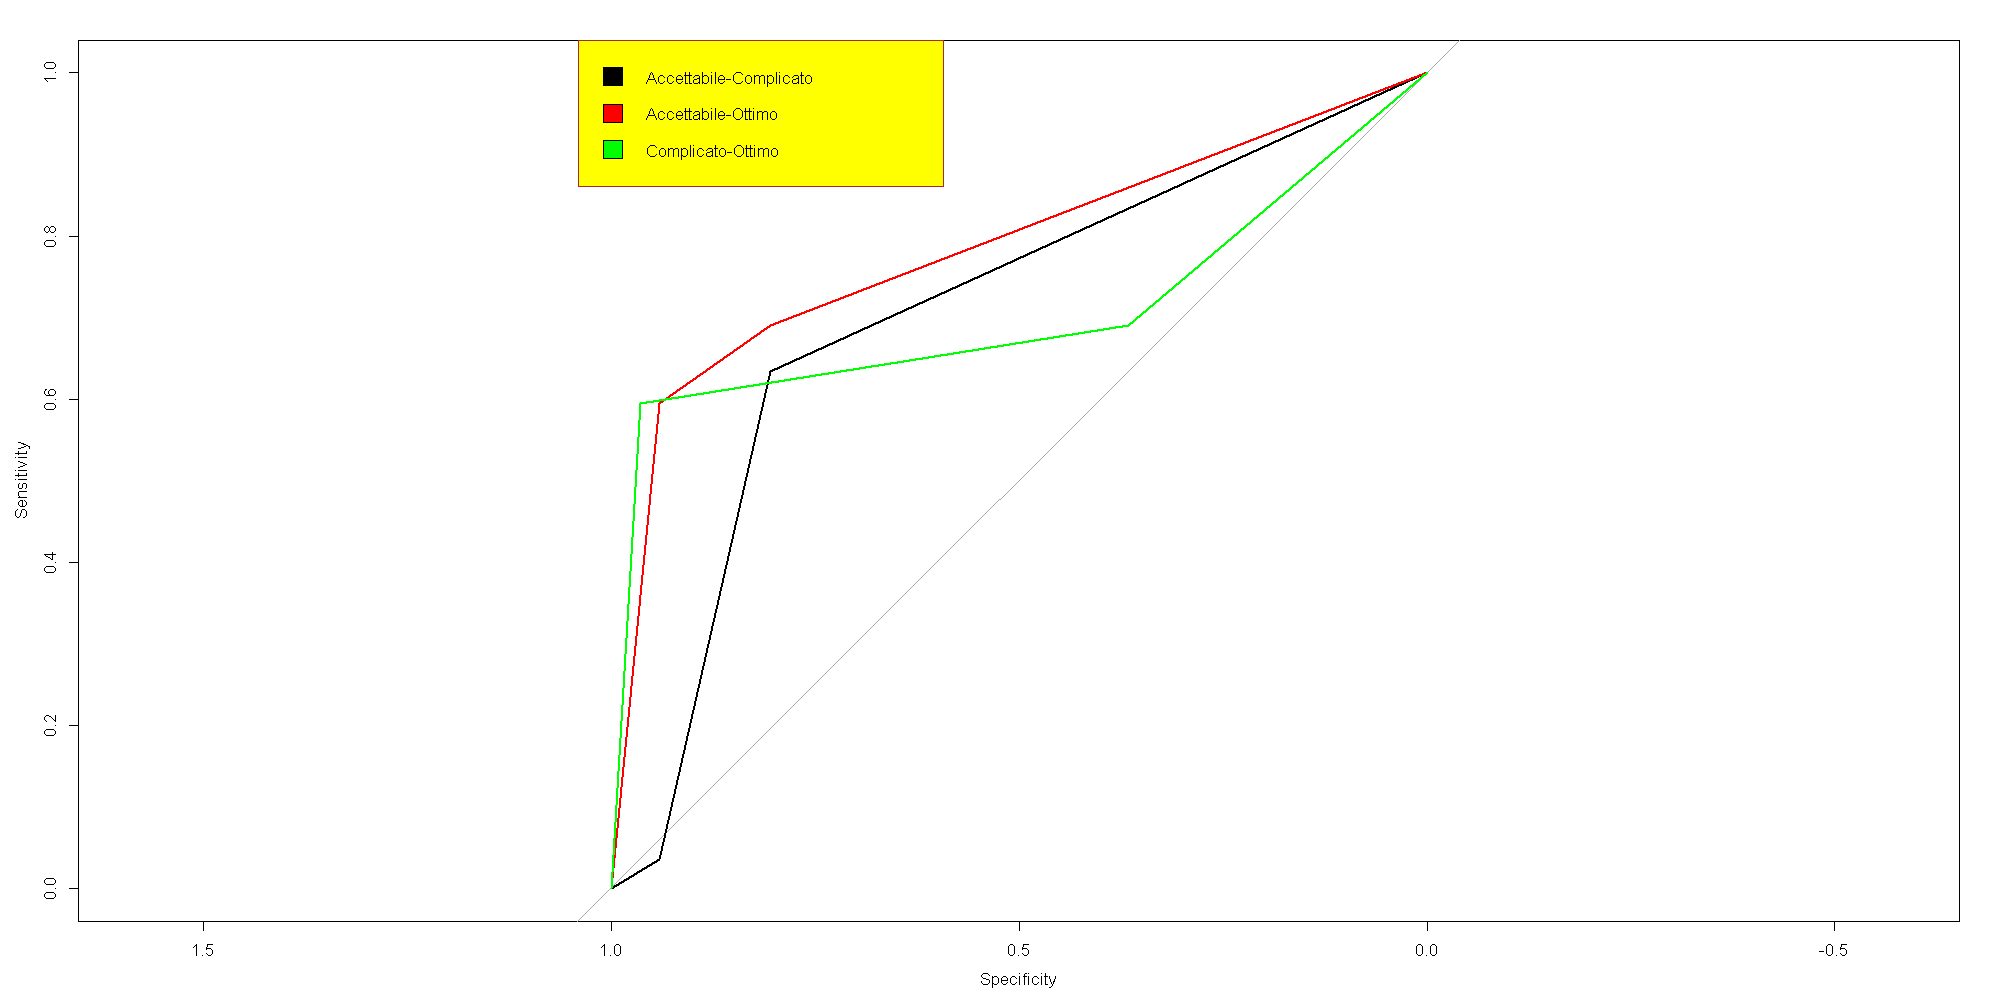

In [390]:
rs <- roc2[['rocs']]
plot(rs[[1]])
plot(rs[[2]], add=TRUE, col='red')
plot(rs[[3]], add=TRUE, col='green')

legend(x = "topleft", box.col = "brown",
       bg ="yellow",legend=c(paste(unlist(rs[[1]]$levels),collapse="-"), paste(unlist(rs[[2]]$levels),collapse="-"),
                             paste(unlist(rs[[3]]$levels),collapse="-")), fill = c("black","red","green")
)

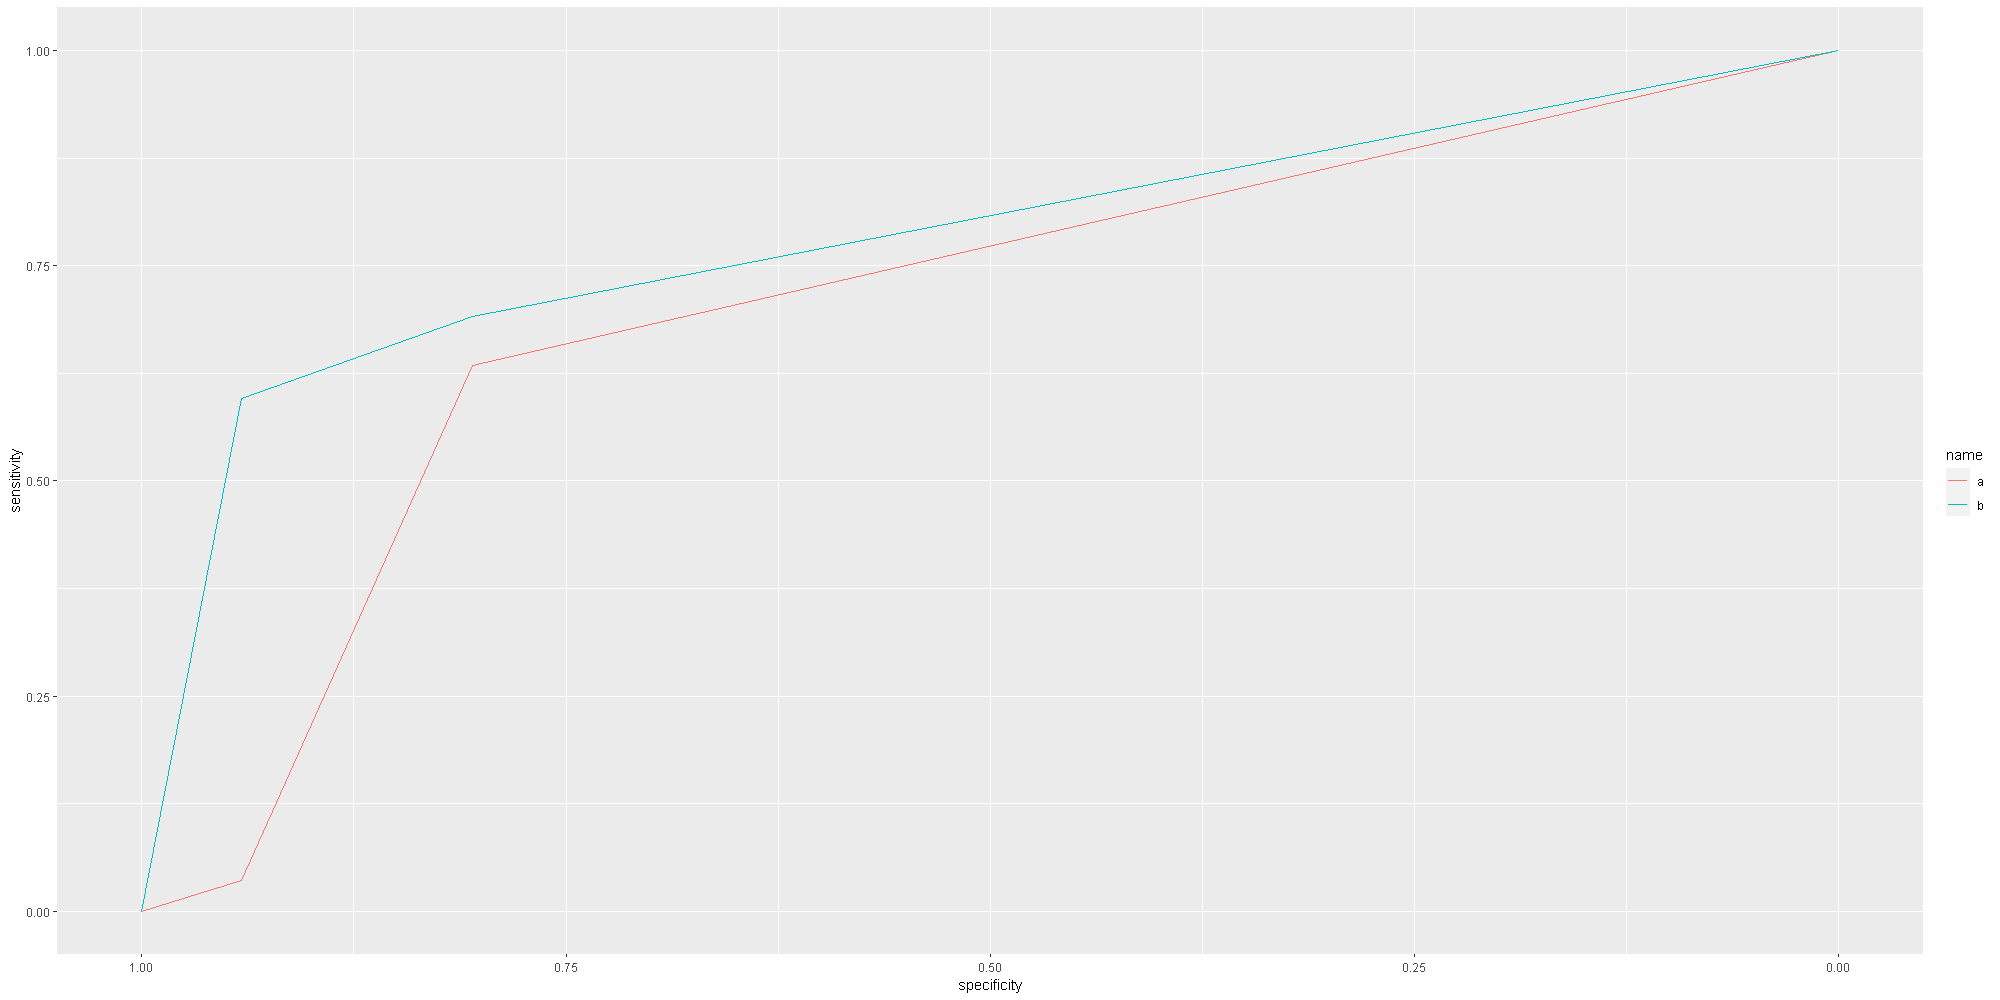

In [410]:
ggroc(list(a = rs[[1]], b = rs[[2]], c =  rs[[3]]))

In [411]:
b = paste(unlist(rs[[1]]$levels),collapse="-")

## Results

In [441]:
tmp1 <- multiclass.roc(TestClasses, predict(log, TestData, type= 'prob' ))

In [442]:
tmp2 <- multiclass.roc(TestClasses, as.numeric(predict(log, TestData)))

Setting direction: controls < cases

Setting direction: controls < cases

Setting direction: controls < cases



In [430]:
tmp1
tmp2


Call:
multiclass.roc.default(response = TestClasses, predictor = predict(log,     TestData, type = "prob"))

Data: multivariate predictor predict(log, TestData, type = "prob") with 3 levels of TestClasses: Accettabile, Complicato, Ottimo.
Multi-class area under the curve: 0.8691


Call:
multiclass.roc.default(response = TestClasses, predictor = as.numeric(predict(log,     TestData)))

Data: as.numeric(predict(log, TestData)) with 3 levels of TestClasses: Accettabile, Complicato, Ottimo.
Multi-class area under the curve: 0.7316

In [434]:
as.numeric(predict(log, TestData))[1:10]

[1] 1 2 3 1 3 1 1 1 1 1

In [437]:
predict(log, TestData, type= 'prob' )[1:10,]

,Accettabile,Complicato,Ottimo
837,0.76544979,0.058173356,1.763769e-01
838,0.46419065,0.523518469,1.229088e-02
839,0.30619745,0.016556558,6.772460e-01
840,0.64991694,0.103278486,2.468046e-01
841,0.01219674,0.000868614,9.869347e-01
842,0.77735871,0.125806341,9.683495e-02
843,0.71400584,0.285965505,2.865324e-05
844,0.76373665,0.096836307,1.394270e-01
845,0.80209151,0.071160100,1.267484e-01
846,0.93807895,0.061912389,8.662354e-06


In [443]:
library(pROC)


roc1 <- multiclass.roc(TestClasses, predict(log, TestData, type= 'prob' ))
roc2 <- multiclass.roc(TestClasses, predict(knn, TestData, type = 'prob'))

In [445]:
roc1
roc2


Call:
multiclass.roc.default(response = TestClasses, predictor = predict(log,     TestData, type = "prob"))

Data: multivariate predictor predict(log, TestData, type = "prob") with 3 levels of TestClasses: Accettabile, Complicato, Ottimo.
Multi-class area under the curve: 0.8691


Call:
multiclass.roc.default(response = TestClasses, predictor = predict(knn,     TestData, type = "prob"))

Data: multivariate predictor predict(knn, TestData, type = "prob") with 3 levels of TestClasses: Accettabile, Complicato, Ottimo.
Multi-class area under the curve: 0.8699

## Linear regression

In [667]:
trainR <- sample_frac(df_num_select, 0.7)
sample_id <- as.numeric(rownames(train)) # rownames() returns character so as.numeric
testR <- df_num_select[-sample_id,]


In [668]:
# fare con feature selection

In [669]:
train_control <- trainControl(method = "cv",
                              number = 10,
                             savePrediction="final",verboseIter=TRUE,returnResamp="all")

lm <- train(degenzaPostTraOSP ~ ., data = trainR,
               method = "lm",
               trControl = train_control)

+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


In [670]:
lm

Linear Regression 

720 samples
 19 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 648, 648, 649, 648, 648, 648, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.6182127  0.1928885  0.4643465

Tuning parameter 'intercept' was held constant at a value of TRUE

lm variable importance

                         Overall
surgeryDuration           100.00
intermedLactates           84.58
degenzaPreTra              66.89
serumCreatinine            55.87
noradrenalineEndSurger     55.36
platCountTranspl           48.24
plasmaFresco               46.55
Gelatine                   35.67
IntraoperativTransfected   35.07
organDonorAge              32.63
organDonorDrawalSodiemia   30.16
ratioPaO2FiO2              28.85
INR                        26.81
plasmaPools                25.86
concenCoagulFactors        24.77
CRIOprecipitated           24.71
albumina                   20.19
organDonorHeight           15.92
doseFibrinogen              0.00

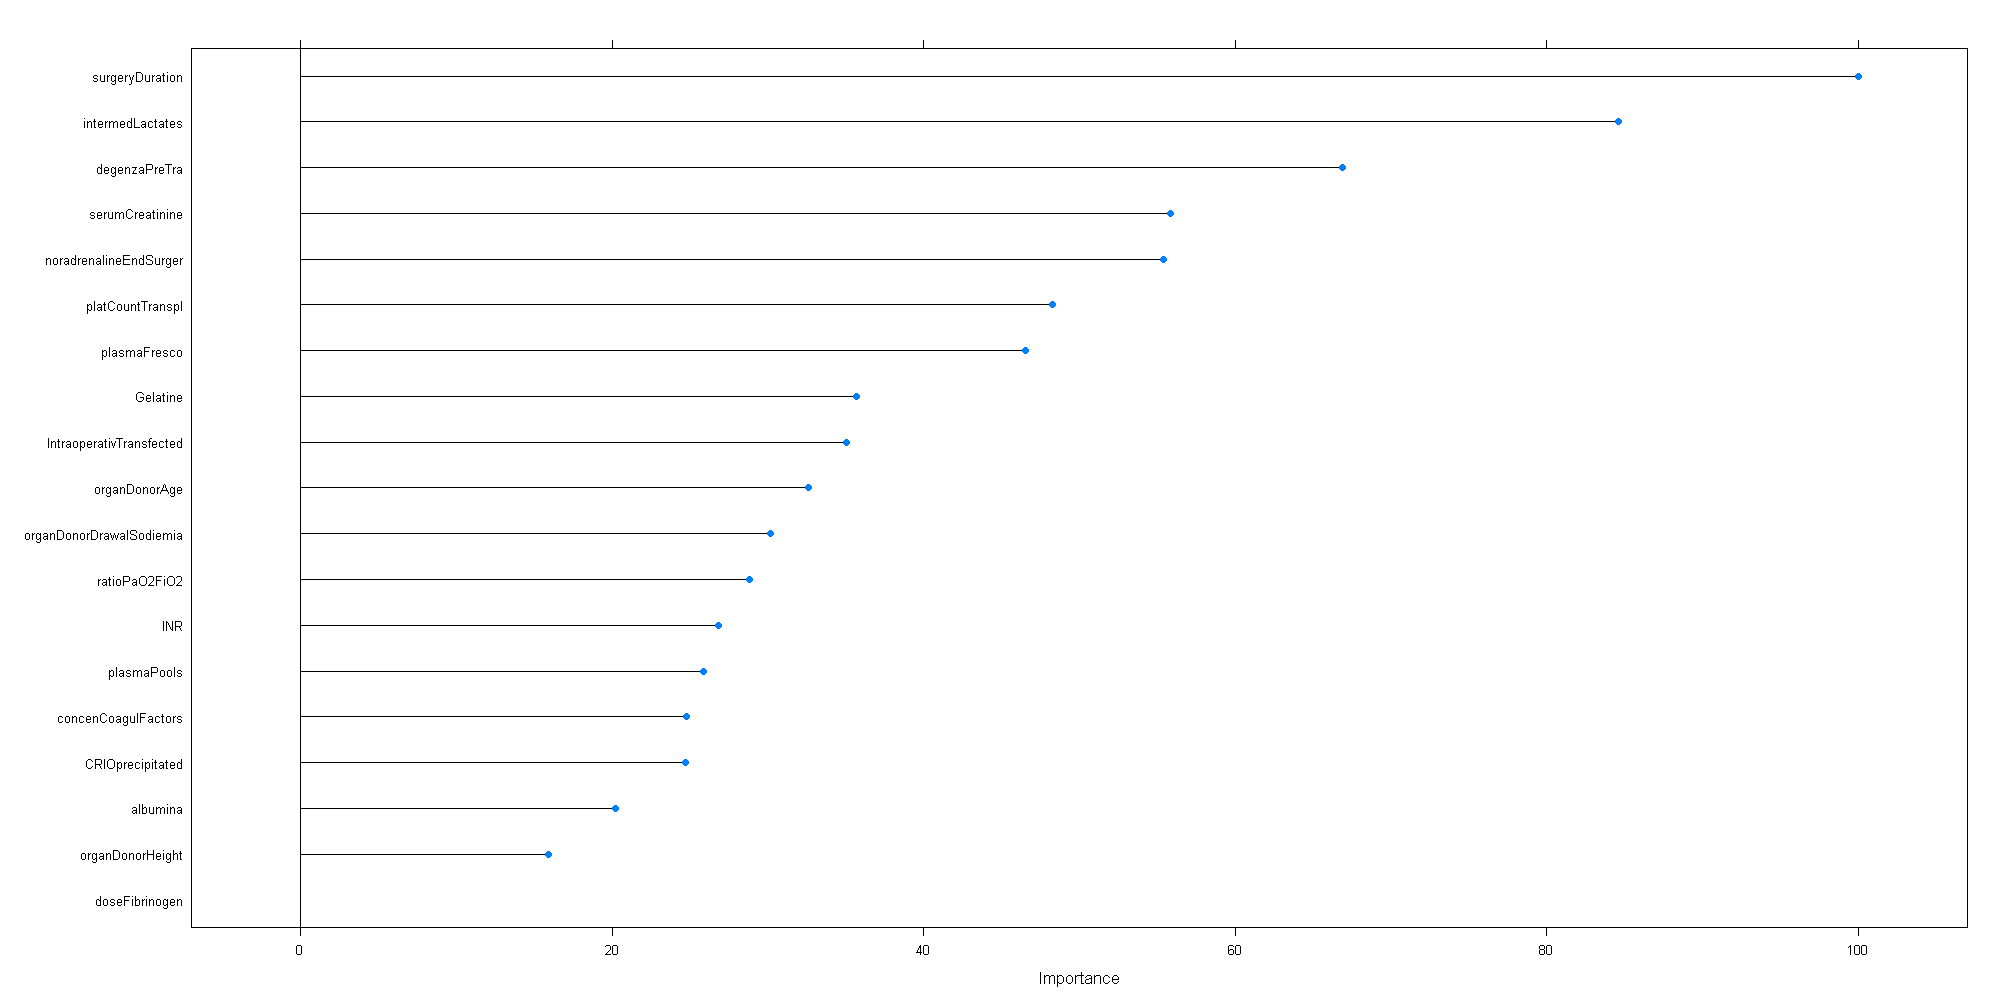

In [671]:
vimp <- varImp(lm)
vimp
plot(vimp)

In [672]:
trainR$predicted <- predict(lm, newdata = trainR)
cor(trainR$degenzaPostTraOSP, trainR$predicted)

[1] 0.4874756

In [673]:
library(Metrics)
rmse(trainR$degenzaPostTraOSP, trainR$predicted)

Warning message:
"package 'Metrics' was built under R version 3.6.3"

Attaching package: 'Metrics'


The following object is masked from 'package:pROC':

    auc


The following objects are masked from 'package:caret':

    precision, recall




[1] 0.6007262

In [674]:
library(rsq)
rsq(trainR$degenzaPostTraOSP, trainR$predicted)

Warning message in rsq(trainR$degenzaPostTraOSP, trainR$predicted):
"Unsupported object!"


function (fitObj, adj = FALSE, type = c("v", "kl", "sse", "lr", 
    "n")) 
{
    if (is(fitObj, "glm") | is(fitObj, "glmerMod")) {
        type <- type[[1]]
        rsq <- switch(type, v = rsq.v(fitObj, adj = adj), kl = rsq.kl(fitObj, 
            adj = adj), sse = rsq.sse(fitObj, adj = adj), lr = rsq.lr(fitObj, 
            adj = adj), n = rsq.n(fitObj, adj = adj))
    }
    else if (is(fitObj, "glmmPQL")) 
        warning("Unsupported object!")
    else if (is(fitObj, "lmerMod") | is(fitObj, "lme")) 
        rsq <- rsq.lmm(fitObj, adj = adj)
    else if (is(fitObj, "lm")) 
        rsq <- ifelse(adj, summary(fitObj)$adj.r.squared, summary(fitObj)$r.squared)
    else warning("Unsupported object!")
    rsq
}
<bytecode: 0x000000004afe2170>
<environment: namespace:rsq>

In [675]:
testR$predicted <- predict(lm, newdata = testR)
cor(testR$degenzaPostTraOSP ,testR$predicted)

[1] 0.4657083

In [676]:
rmse(testR$degenzaPostTraOSP, testR$predicted)

[1] 0.6439496

In [677]:
rsq(testR$degenzaPostTraOSP, testR$predicted)

Warning message in rsq(testR$degenzaPostTraOSP, testR$predicted):
"Unsupported object!"


function (fitObj, adj = FALSE, type = c("v", "kl", "sse", "lr", 
    "n")) 
{
    if (is(fitObj, "glm") | is(fitObj, "glmerMod")) {
        type <- type[[1]]
        rsq <- switch(type, v = rsq.v(fitObj, adj = adj), kl = rsq.kl(fitObj, 
            adj = adj), sse = rsq.sse(fitObj, adj = adj), lr = rsq.lr(fitObj, 
            adj = adj), n = rsq.n(fitObj, adj = adj))
    }
    else if (is(fitObj, "glmmPQL")) 
        warning("Unsupported object!")
    else if (is(fitObj, "lmerMod") | is(fitObj, "lme")) 
        rsq <- rsq.lmm(fitObj, adj = adj)
    else if (is(fitObj, "lm")) 
        rsq <- ifelse(adj, summary(fitObj)$adj.r.squared, summary(fitObj)$r.squared)
    else warning("Unsupported object!")
    rsq
}
<bytecode: 0x000000004afe2170>
<environment: namespace:rsq>

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



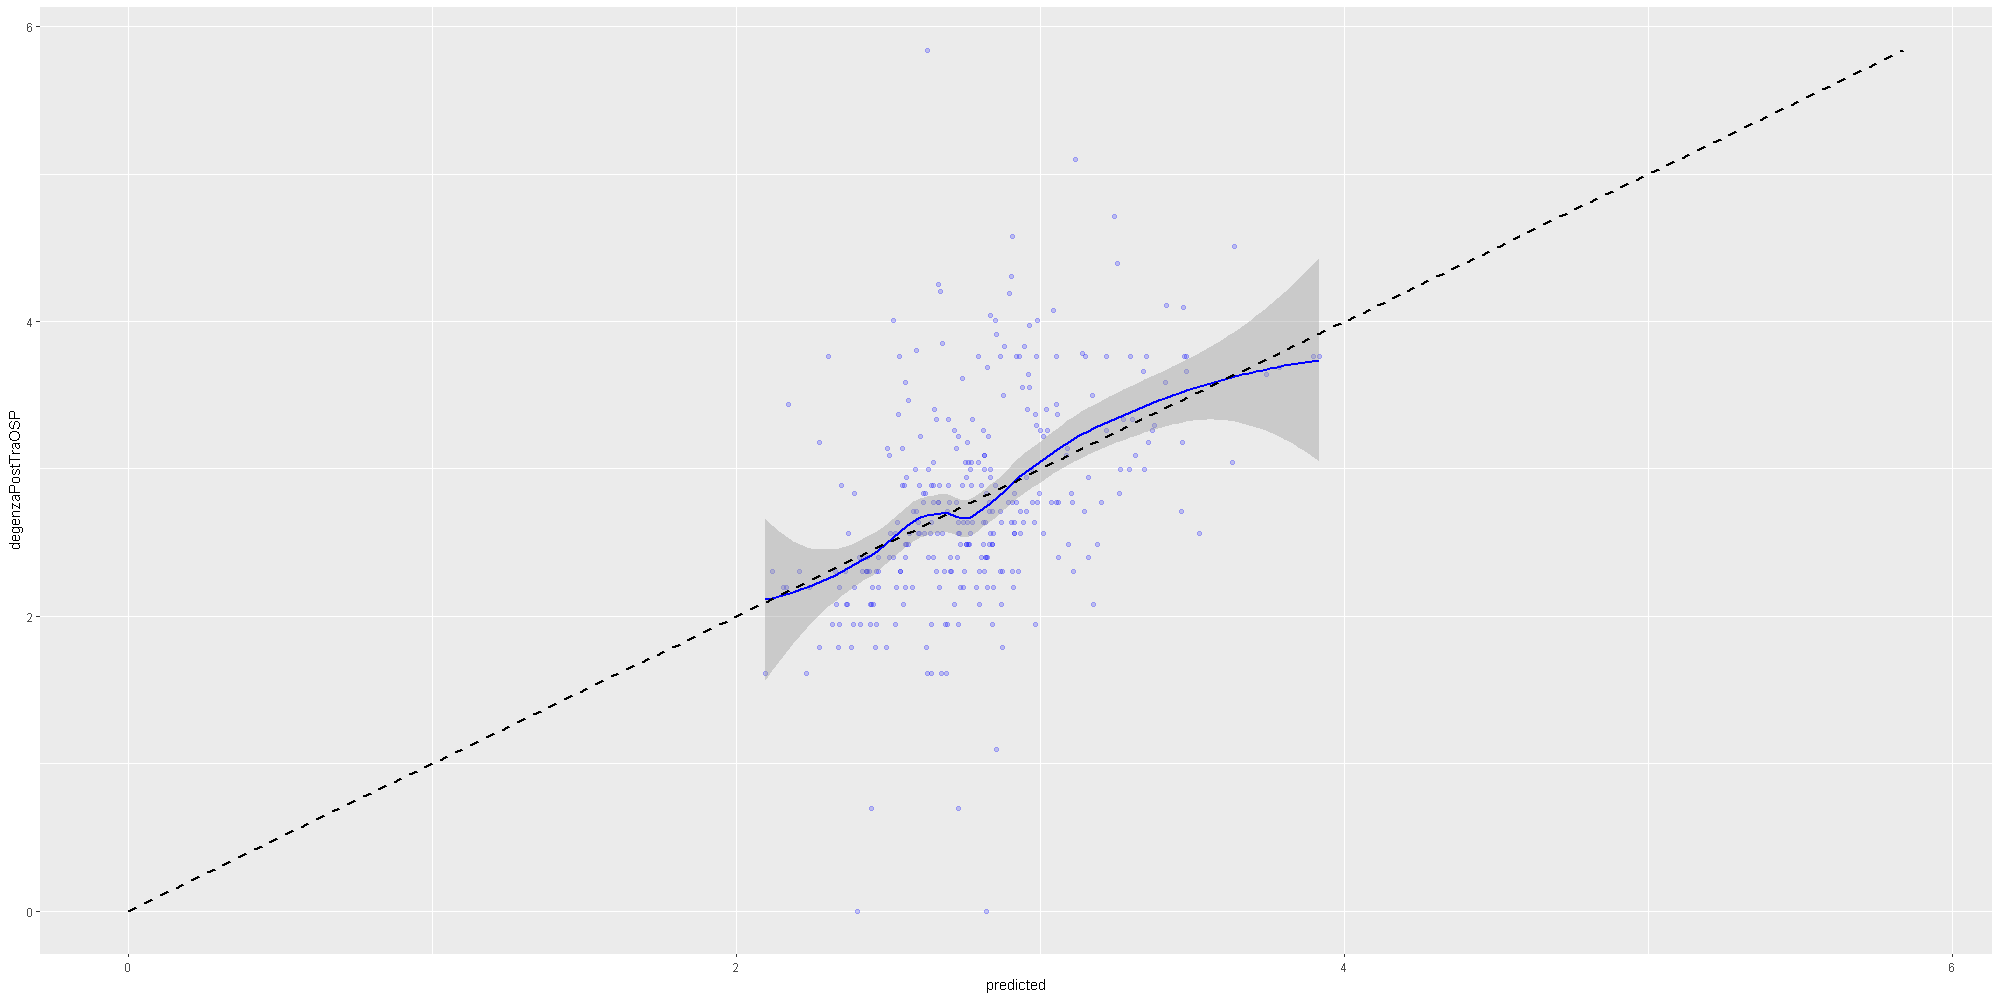

In [678]:
#predicted vs actual

ggplot(data = testR, aes(x = predicted, y = degenzaPostTraOSP)) +
  geom_point(alpha = 0.2, color = "blue") +
  geom_smooth(aes(x = predicted,
                  y = degenzaPostTraOSP), color="blue") +
  geom_line(aes(x = degenzaPostTraOSP,
                y = degenzaPostTraOSP), color = "black", 
            linetype = 2, size = 1)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



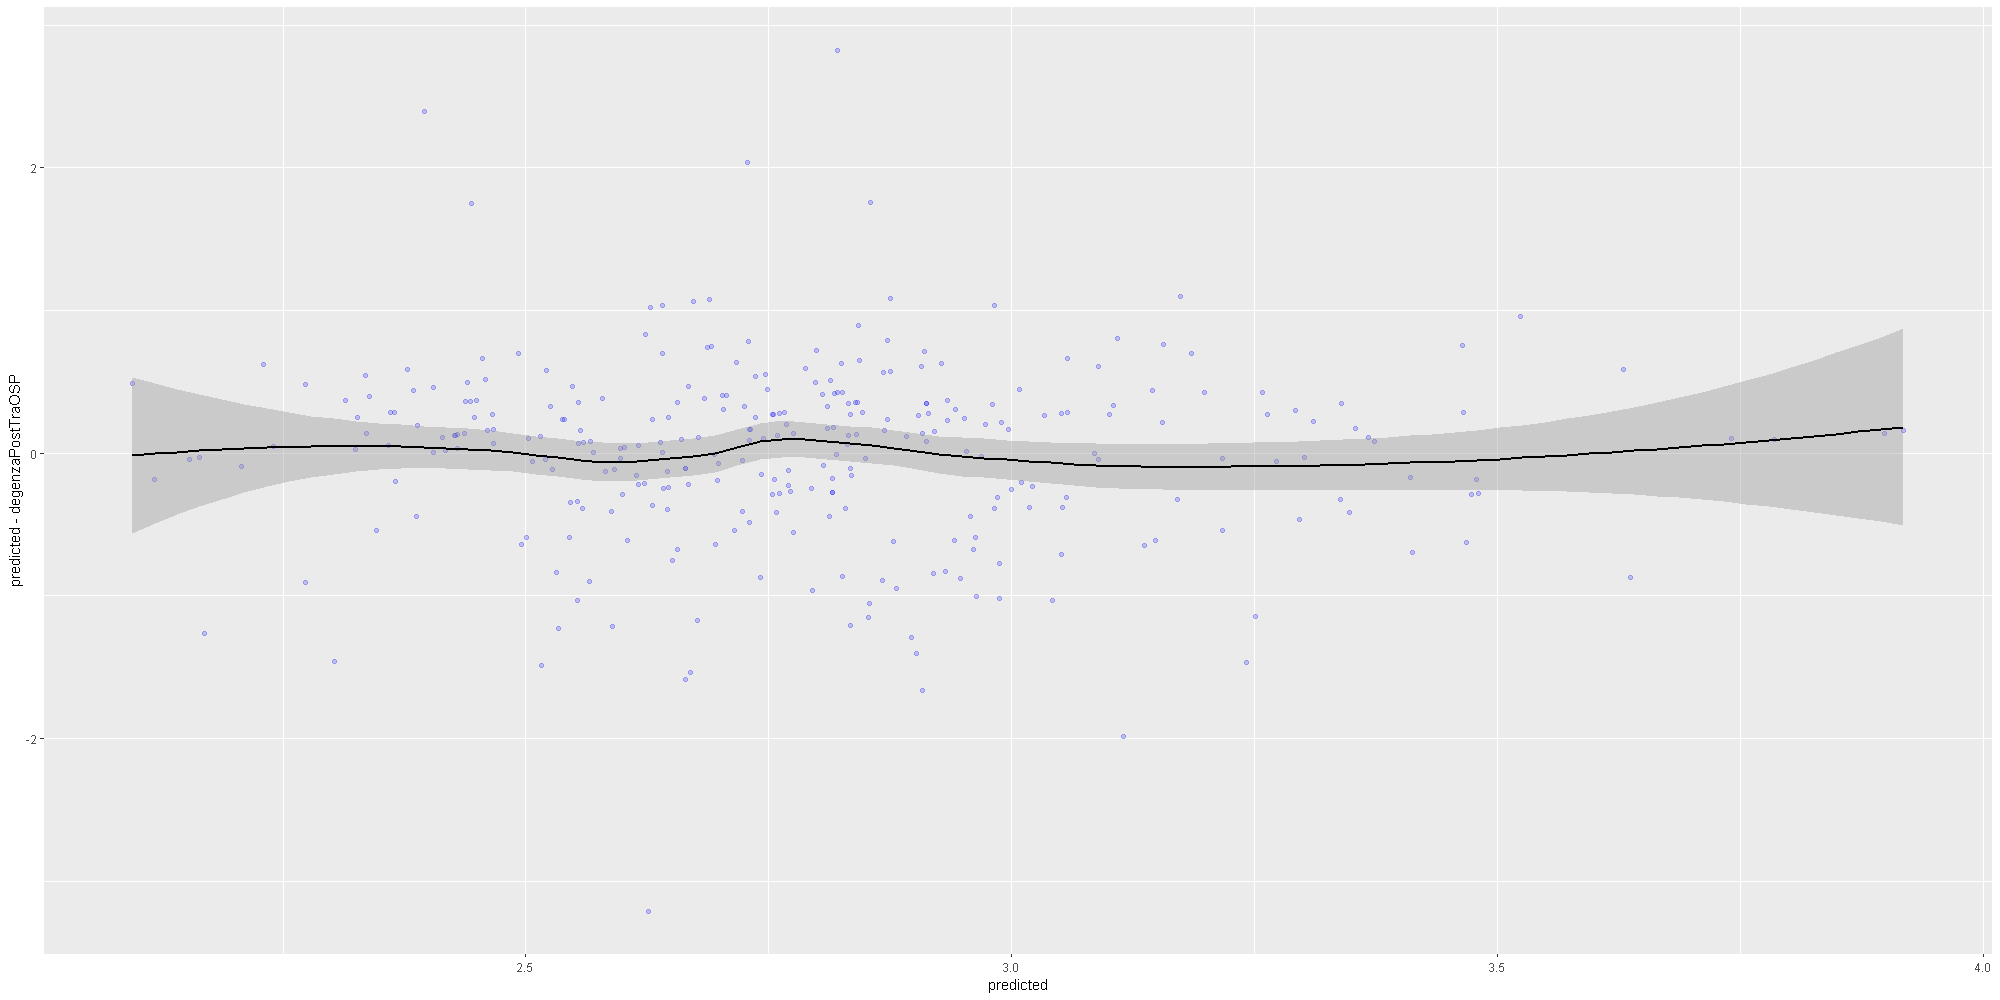

In [679]:
# residuals

ggplot(data = testR, aes(x = predicted,
                      y = predicted - degenzaPostTraOSP)) +
  geom_point(alpha = 0.2, color = "blue") +
  geom_smooth(aes(x = predicted,
                  y = predicted - degenzaPostTraOSP),
              color="black")